### TABLE OF CONTENTS
#### Project display
#### 1. Preprocessing and Modeling
* 1-1. Importing Python Libraries and dependencies
* 1-2. Get the Data
* 1-3. 

#### 2. Modeling


#### 3. Conclusion

### 1.1. Importing Python Libraries and dependencies

In [4]:
from stackoverflow_modeling_function import *

%pylab inline
%matplotlib inline
# Full display of DataFrames.
pd.set_option("expand_frame_repr", True)

C:\Users\zahri\Documents\Projets_OpenCl\4-Categorisez_automatiquement_des_questions\Dev\stackoverflow_modeling_function.py:24: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  import sklearn.metrics as metrics


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\zahri\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1 - Get the Data

In [5]:
# Load pickle from disk
df = pd.read_pickle('pickle_df_ML.pkl')

In [6]:
# Display the first lines 
df.head()

,Id,Body,Title,Tags,Score
0,3631531,"[calendar, company, exchange, public, folder, ...","[extract, exchange, public, calendar, appointm...","[c#, asp.net]",25
1,3631536,"[jquery, extension, method, child, element]","[jquery, finding, child, parent]","[javascript, jquery]",3
3,37826361,"[snippet, example, mark, lutz, book, python, n...","[example, getattr, metaclass, method]",[python],3
4,4443878,"[class, class, system, print, call, applicatio...",[systemout],[java],11
5,4691968,"[process, com, server, eye, thing, server, ser...","[process, com, reference, process, boundary]","[c#, c++]",6


In [7]:
# reset of index.
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

,Id,Body,Title,Tags,Score
0,3631531,"[calendar, company, exchange, public, folder, ...","[extract, exchange, public, calendar, appointm...","[c#, asp.net]",25
1,3631536,"[jquery, extension, method, child, element]","[jquery, finding, child, parent]","[javascript, jquery]",3
2,37826361,"[snippet, example, mark, lutz, book, python, n...","[example, getattr, metaclass, method]",[python],3
3,4443878,"[class, class, system, print, call, applicatio...",[systemout],[java],11
4,4691968,"[process, com, server, eye, thing, server, ser...","[process, com, reference, process, boundary]","[c#, c++]",6


In [8]:
df.shape

(41647, 5)

In [9]:
# Select only the lienes with score >=15 (in order to reduce the machine time)
df_ml = df[df.Score>=15]

In [10]:
# Display the first lines 
df_ml.head()

,Id,Body,Title,Tags,Score
0,3631531,"[calendar, company, exchange, public, folder, ...","[extract, exchange, public, calendar, appointm...","[c#, asp.net]",25
9,11532,"[function, php, project, feature, apis, php, c...","[function, php, project]",[php],66
10,11635,"[way, case, string, comparison, string, upperc...","[case, string, comparison]","[c++, string]",372
13,44408624,"[code, react, component, type, component, jsx]","[code, react, component, type]",[reactjs],34
14,11915,"[r, feed, aspnet, mvc, party, library, r, stuf...","[r, aspnet, mvc]",[asp.net-mvc],114


In [11]:
# reset of index.
df_ml.reset_index(inplace=True)
df_ml.drop('index', axis=1, inplace=True)
df_ml.head()

c:\temp\ipykernel_13220\1464756013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.drop('index', axis=1, inplace=True)


,Id,Body,Title,Tags,Score
0,3631531,"[calendar, company, exchange, public, folder, ...","[extract, exchange, public, calendar, appointm...","[c#, asp.net]",25
1,11532,"[function, php, project, feature, apis, php, c...","[function, php, project]",[php],66
2,11635,"[way, case, string, comparison, string, upperc...","[case, string, comparison]","[c++, string]",372
3,44408624,"[code, react, component, type, component, jsx]","[code, react, component, type]",[reactjs],34
4,11915,"[r, feed, aspnet, mvc, party, library, r, stuf...","[r, aspnet, mvc]",[asp.net-mvc],114


### 2- Vectorizing : Bag-of-Words / N-Grams / TF-ID/ BERT/ 

**Vectorizing is the process of encoding text as integers i.e. numeric form to create feature vectors so that machine learning algorithms can understand our data.**

In [12]:
# create the dependant and the independat variables.
X = df_ml["Body"]
y = df_ml["Tags"]

### 2.1 Vectorizing Data: Bag-of-Words (Count Vectorizer)

**Bag of Words (BoW) or CountVectorizer describes the presence of words within the text data. It gives a result of 1 if present in the sentence and 0 if not present. It, therefore, creates a bag of words with a document-matrix count in each text document.**

In [13]:
# Initialization
bow_vect = CountVectorizer(max_df=0.5, min_df=0.005, analyzer="word", preprocessor=' '.join)
#bow_vect = CountVectorizer(analyzer="word")
bow_vect.fit(X)
X_BoW = bow_vect.transform(X)
print(X_BoW.shape)

(10742, 509)


### 2.2 Vectorizing Raw Data: N-Grams

**N-grams are simply all combinations of adjacent words or letters of length n that we can find in our source text. Ngrams with n=1 are called unigrams. Similarly, bigrams (n=2), trigrams (n=3) and so on can also be used.**

In [14]:
# Initialization
ngrams_vect = CountVectorizer(max_df=0.5, min_df=0.005,ngram_range=(2,2),analyzer="word", preprocessor=' '.join) # It applies only bigram vectorizer
ngrams_vect.fit(X)
X_NG = bow_vect.transform(X)
print(X_NG.shape)

(10742, 509)


*Unigrams usually don’t contain much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the letter or word is likely to follow the given word. The longer the n-gram (higher n), the more context you have to work with.*

### 2.3 Vectorizing Raw Data: TF-IDF

**It computes “relative frequency” that a word appears in a document compared to its frequency across all documents. It is more useful than “term frequency” for identifying “important” words in each document (high frequency in that document, low frequency in other documents).**

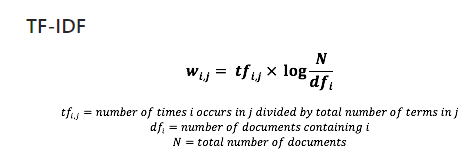

In [15]:
# Initialization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.005,analyzer="word", preprocessor=' '.join)

vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

In [16]:
# Multilabel binarizer for targets
mlb = MultiLabelBinarizer()
mlb.fit(y)
y_binarized = mlb.transform(y)

In [17]:
mlb.classes_

array(['.net', 'ajax', 'algorithm', 'android', 'angular', 'arrays',
       'asp.net', 'asp.net-mvc', 'bash', 'c', 'c#', 'c++', 'c++11', 'css',
       'database', 'delphi', 'django', 'eclipse', 'git', 'html', 'ios',
       'iphone', 'java', 'javascript', 'jquery', 'json', 'linux',
       'multithreading', 'mysql', 'node.js', 'objective-c', 'performance',
       'perl', 'php', 'python', 'python-3.x', 'r', 'reactjs', 'regex',
       'ruby', 'ruby-on-rails', 'spring', 'sql', 'sql-server', 'string',
       'swift', 'visual-studio', 'windows', 'wpf', 'xcode'], dtype=object)

In [18]:
y_inversed = mlb.inverse_transform(y_binarized)

In [19]:
y_inversed[0:5]

[('asp.net', 'c#'),
 ('php',),
 ('c++', 'string'),
 ('reactjs',),
 ('asp.net-mvc',)]

In [20]:
print(y_inversed[0:5])
print("=========")
print(y[0:5])

[('asp.net', 'c#'), ('php',), ('c++', 'string'), ('reactjs',), ('asp.net-mvc',)]
0    [c#, asp.net]
1            [php]
2    [c++, string]
3        [reactjs]
4    [asp.net-mvc]
Name: Tags, dtype: object


**TF-IDF is applied on the body_text, so the relative count of each word in the sentences is stored in the document matrix.**

**Note: Vectorizers outputs sparse matrices. Sparse Matrix is a matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.**

In [21]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

In [22]:
X_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,499,500,501,502,503,504,505,506,507,508
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370649,0.0


In [23]:
y_binarized_df = pd.DataFrame(y_binarized)
y_binarized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**TF-IDF is applied on the body_text, so the relative count of each word in the sentences is stored in the document matrix.**

### 2.4 Vectorizing Raw Data: Word2Vec

In [24]:
#Loading the word vectors from Google trained word2Vec model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('../Data/GoogleNews-vectors-negative300.bin', binary=True,)

In [38]:
def FunctionText2Vec(inpTextData):
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(inpTextData.shape[0]):
        print(10*"=",i,10*"=")
        # initiating a sentence with all zeros
        Sentence = np.zeros(300)
 
        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in inpTextData[i]:
           # print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        Sentence = Sentence/len(inpTextData[i])
        #print(len(inpTextData[i]))
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

In [39]:
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(df_ml['Body'])

# Checking the new representation for sentences
W2Vec_Data.shape

========== 0 ==========
========== 1 ==========
========== 2 ==========
========== 3 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4 ==========
========== 5 ==========
========== 6 ==========
========== 7 ==========
========== 8 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9 ==========
========== 10 ==========
========== 11 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 12 ==========
========== 13 ==========
========== 14 ==========
========== 15 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 16 ==========
========== 17 ==========
========== 18 ==========
========== 19 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 20 ==========
========== 21 ==========
========== 22 ==========
========== 23 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 24 ==========
========== 25 ==========
========== 26 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 27 ==========
========== 28 ==========
========== 29 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 30 ==========
========== 31 ==========
========== 32 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 33 ==========
========== 34 ==========
========== 35 ==========
========== 36 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 37 ==========
========== 38 ==========
========== 39 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 40 ==========
========== 41 ==========
========== 42 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 43 ==========
========== 44 ==========
========== 45 ==========
========== 46 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 47 ==========
========== 48 ==========
========== 49 ==========
========== 50 ==========
========== 51 ==========
========== 52 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 53 ==========
========== 54 ==========
========== 55 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 56 ==========
========== 57 ==========
========== 58 ==========
========== 59 ==========
========== 60 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 61 ==========
========== 62 ==========
========== 63 ==========
========== 64 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 65 ==========
========== 66 ==========
========== 67 ==========
========== 68 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 69 ==========
========== 70 ==========
========== 71 ==========
========== 72 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 73 ==========
========== 74 ==========
========== 75 ==========
========== 76 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 77 ==========
========== 78 ==========
========== 79 ==========
========== 80 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 81 ==========
========== 82 ==========
========== 83 ==========
========== 84 ==========
========== 85 ==========
========== 86 ==========
========== 87 ==========
========== 88 ==========
========== 89 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 90 ==========
========== 91 ==========
========== 92 ==========
========== 93 ==========
========== 94 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 95 ==========
========== 96 ==========
========== 97 ==========
========== 98 ==========
========== 99 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 100 ==========
========== 101 ==========
========== 102 ==========
========== 103 ==========
========== 104 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 105 ==========
========== 106 ==========
========== 107 ==========
========== 108 ==========
========== 109 ==========
========== 110 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 111 ==========
========== 112 ==========
========== 113 ==========
========== 114 ==========
========== 115 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 116 ==========
========== 117 ==========
========== 118 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 119 ==========
========== 120 ==========
========== 121 ==========
========== 122 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 123 ==========
========== 124 ==========
========== 125 ==========
========== 126 ==========
========== 127 ==========
========== 128 ==========
========== 129 ==========
========== 130 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 131 ==========
========== 132 ==========
========== 133 ==========
========== 134 ==========
========== 135 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 136 ==========
========== 137 ==========
========== 138 ==========
========== 139 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 140 ==========
========== 141 ==========
========== 142 ==========
========== 143 ==========
========== 144 ==========
========== 145 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 146 ==========
========== 147 ==========
========== 148 ==========
========== 149 ==========
========== 150 ==========
========== 151 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 152 ==========
========== 153 ==========
========== 154 ==========
========== 155 ==========
========== 156 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 157 ==========
========== 158 ==========
========== 159 ==========
========== 160 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 161 ==========
========== 162 ==========
========== 163 ==========
========== 164 ==========
========== 165 ==========
========== 166 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 167 ==========
========== 168 ==========
========== 169 ==========
========== 170 ==========
========== 171 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 172 ==========
========== 173 ==========
========== 174 ==========
========== 175 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 176 ==========
========== 177 ==========
========== 178 ==========
========== 179 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 180 ==========
========== 181 ==========
========== 182 ==========
========== 183 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 184 ==========
========== 185 ==========
========== 186 ==========
========== 187 ==========
========== 188 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 189 ==========
========== 190 ==========
========== 191 ==========
========== 192 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 193 ==========
========== 194 ==========
========== 195 ==========
========== 196 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 197 ==========
========== 198 ==========
========== 199 ==========
========== 200 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 201 ==========
========== 202 ==========
========== 203 ==========
========== 204 ==========
========== 205 ==========
========== 206 ==========
========== 207 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 208 ==========
========== 209 ==========
========== 210 ==========
========== 211 ==========
========== 212 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 213 ==========
========== 214 ==========
========== 215 ==========
========== 216 ==========
========== 217 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 218 ==========
========== 219 ==========
========== 220 ==========
========== 221 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 222 ==========
========== 223 ==========
========== 224 ==========
========== 225 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 226 ==========
========== 227 ==========
========== 228 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 229 ==========
========== 230 ==========
========== 231 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 232 ==========
========== 233 ==========
========== 234 ==========
========== 235 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 236 ==========
========== 237 ==========
========== 238 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 239 ==========
========== 240 ==========
========== 241 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 242 ==========
========== 243 ==========
========== 244 ==========
========== 245 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 246 ==========
========== 247 ==========
========== 248 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 249 ==========
========== 250 ==========
========== 251 ==========
========== 252 ==========
========== 253 ==========
========== 254 ==========
========== 255 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 256 ==========
========== 257 ==========
========== 258 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 259 ==========
========== 260 ==========
========== 261 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 262 ==========
========== 263 ==========
========== 264 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 265 ==========
========== 266 ==========
========== 267 ==========
========== 268 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 269 ==========
========== 270 ==========
========== 271 ==========
========== 272 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 273 ==========
========== 274 ==========
========== 275 ==========
========== 276 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 277 ==========
========== 278 ==========
========== 279 ==========
========== 280 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 281 ==========
========== 282 ==========
========== 283 ==========
========== 284 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 285 ==========
========== 286 ==========
========== 287 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 288 ==========
========== 289 ==========
========== 290 ==========
========== 291 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 292 ==========
========== 293 ==========
========== 294 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 295 ==========
========== 296 ==========
========== 297 ==========
========== 298 ==========
========== 299 ==========
========== 300 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 301 ==========
========== 302 ==========
========== 303 ==========
========== 304 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 305 ==========
========== 306 ==========
========== 307 ==========
========== 308 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 309 ==========
========== 310 ==========
========== 311 ==========
========== 312 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 313 ==========
========== 314 ==========
========== 315 ==========
========== 316 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 317 ==========
========== 318 ==========
========== 319 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 320 ==========
========== 321 ==========
========== 322 ==========
========== 323 ==========
========== 324 ==========
========== 325 ==========
========== 326 ==========
========== 327 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 328 ==========
========== 329 ==========
========== 330 ==========
========== 331 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 332 ==========
========== 333 ==========
========== 334 ==========
========== 335 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 336 ==========
========== 337 ==========
========== 338 ==========
========== 339 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 340 ==========
========== 341 ==========
========== 342 ==========
========== 343 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 344 ==========
========== 345 ==========
========== 346 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 347 ==========
========== 348 ==========
========== 349 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 350 ==========
========== 351 ==========
========== 352 ==========
========== 353 ==========
========== 354 ==========
========== 355 ==========
========== 356 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 357 ==========
========== 358 ==========
========== 359 ==========
========== 360 ==========
========== 361 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 362 ==========
========== 363 ==========
========== 364 ==========
========== 365 ==========
========== 366 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 367 ==========
========== 368 ==========
========== 369 ==========
========== 370 ==========
========== 371 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 372 ==========
========== 373 ==========
========== 374 ==========
========== 375 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 376 ==========
========== 377 ==========
========== 378 ==========
========== 379 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 380 ==========
========== 381 ==========
========== 382 ==========
========== 383 ==========
========== 384 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 385 ==========
========== 386 ==========
========== 387 ==========
========== 388 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 389 ==========
========== 390 ==========
========== 391 ==========
========== 392 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 393 ==========
========== 394 ==========
========== 395 ==========
========== 396 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 397 ==========
========== 398 ==========
========== 399 ==========
========== 400 ==========
========== 401 ==========
========== 402 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 403 ==========
========== 404 ==========
========== 405 ==========
========== 406 ==========
========== 407 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 408 ==========
========== 409 ==========
========== 410 ==========
========== 411 ==========
========== 412 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 413 ==========
========== 414 ==========
========== 415 ==========
========== 416 ==========
========== 417 ==========
========== 418 ==========
========== 419 ==========
========== 420 ==========
========== 421 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 422 ==========
========== 423 ==========
========== 424 ==========
========== 425 ==========
========== 426 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 427 ==========
========== 428 ==========
========== 429 ==========
========== 430 ==========
========== 431 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 432 ==========
========== 433 ==========
========== 434 ==========
========== 435 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 436 ==========
========== 437 ==========
========== 438 ==========
========== 439 ==========
========== 440 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 441 ==========
========== 442 ==========
========== 443 ==========
========== 444 ==========
========== 445 ==========
========== 446 ==========
========== 447 ==========
========== 448 ==========
========== 449 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 450 ==========
========== 451 ==========
========== 452 ==========
========== 453 ==========
========== 454 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 455 ==========
========== 456 ==========
========== 457 ==========
========== 458 ==========
========== 459 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 460 ==========
========== 461 ==========
========== 462 ==========
========== 463 ==========
========== 464 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 465 ==========
========== 466 ==========
========== 467 ==========
========== 468 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 469 ==========
========== 470 ==========
========== 471 ==========
========== 472 ==========
========== 473 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 474 ==========
========== 475 ==========
========== 476 ==========
========== 477 ==========
========== 478 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 479 ==========
========== 480 ==========
========== 481 ==========
========== 482 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 483 ==========
========== 484 ==========
========== 485 ==========
========== 486 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 487 ==========
========== 488 ==========
========== 489 ==========
========== 490 ==========
========== 491 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 492 ==========
========== 493 ==========
========== 494 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 495 ==========
========== 496 ==========
========== 497 ==========
========== 498 ==========
========== 499 ==========
========== 500 ==========
========== 501 ==========
========== 502 ==========
========== 503 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 504 ==========
========== 505 ==========
========== 506 ==========
========== 507 ==========
========== 508 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 509 ==========
========== 510 ==========
========== 511 ==========
========== 512 ==========
========== 513 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 514 ==========
========== 515 ==========
========== 516 ==========
========== 517 ==========
========== 518 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 519 ==========
========== 520 ==========
========== 521 ==========
========== 522 ==========
========== 523 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 524 ==========
========== 525 ==========
========== 526 ==========
========== 527 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 528 ==========
========== 529 ==========
========== 530 ==========
========== 531 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 532 ==========
========== 533 ==========
========== 534 ==========
========== 535 ==========
========== 536 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 537 ==========
========== 538 ==========
========== 539 ==========
========== 540 ==========
========== 541 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 542 ==========
========== 543 ==========
========== 544 ==========
========== 545 ==========
========== 546 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 547 ==========
========== 548 ==========
========== 549 ==========
========== 550 ==========
========== 551 ==========
========== 552 ==========
========== 553 ==========
========== 554 ==========
========== 555 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 556 ==========
========== 557 ==========
========== 558 ==========
========== 559 ==========
========== 560 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 561 ==========
========== 562 ==========
========== 563 ==========
========== 564 ==========
========== 565 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 566 ==========
========== 567 ==========
========== 568 ==========
========== 569 ==========
========== 570 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 571 ==========
========== 572 ==========
========== 573 ==========
========== 574 ==========
========== 575 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 576 ==========
========== 577 ==========
========== 578 ==========
========== 579 ==========
========== 580 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 581 ==========
========== 582 ==========
========== 583 ==========
========== 584 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 585 ==========
========== 586 ==========
========== 587 ==========
========== 588 ==========
========== 589 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 590 ==========
========== 591 ==========
========== 592 ==========
========== 593 ==========
========== 594 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 595 ==========
========== 596 ==========
========== 597 ==========
========== 598 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 599 ==========
========== 600 ==========
========== 601 ==========
========== 602 ==========
========== 603 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 604 ==========
========== 605 ==========
========== 606 ==========
========== 607 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 608 ==========
========== 609 ==========
========== 610 ==========
========== 611 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 612 ==========
========== 613 ==========
========== 614 ==========
========== 615 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 616 ==========
========== 617 ==========
========== 618 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 619 ==========
========== 620 ==========
========== 621 ==========
========== 622 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 623 ==========
========== 624 ==========
========== 625 ==========
========== 626 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 627 ==========
========== 628 ==========
========== 629 ==========
========== 630 ==========
========== 631 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 632 ==========
========== 633 ==========
========== 634 ==========
========== 635 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 636 ==========
========== 637 ==========
========== 638 ==========
========== 639 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 640 ==========
========== 641 ==========
========== 642 ==========
========== 643 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 644 ==========
========== 645 ==========
========== 646 ==========
========== 647 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 648 ==========
========== 649 ==========
========== 650 ==========
========== 651 ==========
========== 652 ==========
========== 653 ==========
========== 654 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 655 ==========
========== 656 ==========
========== 657 ==========
========== 658 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 659 ==========
========== 660 ==========
========== 661 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 662 ==========
========== 663 ==========
========== 664 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 665 ==========
========== 666 ==========
========== 667 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 668 ==========
========== 669 ==========
========== 670 ==========
========== 671 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 672 ==========
========== 673 ==========
========== 674 ==========
========== 675 ==========
========== 676 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 677 ==========
========== 678 ==========
========== 679 ==========
========== 680 ==========
========== 681 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 682 ==========
========== 683 ==========
========== 684 ==========
========== 685 ==========
========== 686 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 687 ==========
========== 688 ==========
========== 689 ==========
========== 690 ==========
========== 691 ==========
========== 692 ==========
========== 693 ==========
========== 694 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 695 ==========
========== 696 ==========
========== 697 ==========
========== 698 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 699 ==========
========== 700 ==========
========== 701 ==========
========== 702 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 703 ==========
========== 704 ==========
========== 705 ==========
========== 706 ==========
========== 707 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 708 ==========
========== 709 ==========
========== 710 ==========
========== 711 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 712 ==========
========== 713 ==========
========== 714 ==========
========== 715 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 716 ==========
========== 717 ==========
========== 718 ==========
========== 719 ==========
========== 720 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 721 ==========
========== 722 ==========
========== 723 ==========
========== 724 ==========
========== 725 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 726 ==========
========== 727 ==========
========== 728 ==========
========== 729 ==========
========== 730 ==========
========== 731 ==========
========== 732 ==========
========== 733 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 734 ==========
========== 735 ==========
========== 736 ==========
========== 737 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 738 ==========
========== 739 ==========
========== 740 ==========
========== 741 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 742 ==========
========== 743 ==========
========== 744 ==========
========== 745 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 746 ==========
========== 747 ==========
========== 748 ==========
========== 749 ==========
========== 750 ==========
========== 751 ==========
========== 752 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 753 ==========
========== 754 ==========
========== 755 ==========
========== 756 ==========
========== 757 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 758 ==========
========== 759 ==========
========== 760 ==========
========== 761 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 762 ==========
========== 763 ==========
========== 764 ==========
========== 765 ==========
========== 766 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 767 ==========
========== 768 ==========
========== 769 ==========
========== 770 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

771 ==========
========== 772 ==========
========== 773 ==========
========== 774 ==========
========== 775 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 776 ==========
========== 777 ==========
========== 778 ==========
========== 779 ==========
========== 780 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 781 ==========
========== 782 ==========
========== 783 ==========
========== 784 ==========
========== 785 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 786 ==========
========== 787 ==========
========== 788 ==========
========== 789 ==========
========== 790 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 791 ==========
========== 792 ==========
========== 793 ==========
========== 794 ==========
========== 795 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 796 ==========
========== 797 ==========
========== 798 ==========
========== 799 ==========
========== 800 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 801 ==========
========== 802 ==========
========== 803 ==========
========== 804 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 805 ==========
========== 806 ==========
========== 807 ==========
========== 808 ==========
========== 809 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 810 ==========
========== 811 ==========
========== 812 ==========
========== 813 ==========
========== 814 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 815 ==========
========== 816 ==========
========== 817 ==========
========== 818 ==========
========== 819 ==========
========== 820 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 821 ==========
========== 822 ==========
========== 823 ==========
========== 824 ==========
========== 825 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 826 ==========
========== 827 ==========
========== 828 ==========
========== 829 ==========
========== 830 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 831 ==========
========== 832 ==========
========== 833 ==========
========== 834 ==========
========== 835 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 836 ==========
========== 837 ==========
========== 838 ==========
========== 839 ==========
========== 840 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 841 ==========
========== 842 ==========
========== 843 ==========
========== 844 ==========
========== 845 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 846 ==========
========== 847 ==========
========== 848 ==========
========== 849 ==========
========== 850 ==========
========== 851 ==========
========== 852 ==========
========== 853 ==========
========== 854 ==========
========== 855 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 856 ==========
========== 857 ==========
========== 858 ==========
========== 859 ==========
========== 860 ==========
========== 861 ==========
========== 862 ==========
========== 863 ==========
========== 864 ==========
========== 865 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 866 ==========
========== 867 ==========
========== 868 ==========
========== 869 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 870 ==========
========== 871 ==========
========== 872 ==========
========== 873 ==========
========== 874 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 875 ==========
========== 876 ==========
========== 877 ==========
========== 878 ==========
========== 879 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 880 ==========
========== 881 ==========
========== 882 ==========
========== 883 ==========
========== 884 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 885 ==========
========== 886 ==========
========== 887 ==========
========== 888 ==========
========== 889 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 890 ==========
========== 891 ==========
========== 892 ==========
========== 893 ==========
========== 894 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 895 ==========
========== 896 ==========
========== 897 ==========
========== 898 ==========
========== 899 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 900 ==========
========== 901 ==========
========== 902 ==========
========== 903 ==========
========== 904 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 905 ==========
========== 906 ==========
========== 907 ==========
========== 908 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 909 ==========
========== 910 ==========
========== 911 ==========
========== 912 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 913 ==========
========== 914 ==========
========== 915 ==========
========== 916 ==========
========== 917 ==========
========== 918 ==========
========== 919 ==========
========== 920 ==========
========== 921 ==========
========== 922 ==========
========== 923 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 924 ==========
========== 925 ==========
========== 926 ==========
========== 927 ==========
========== 928 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 929 ==========
========== 930 ==========
========== 931 ==========
========== 932 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 933 ==========
========== 934 ==========
========== 935 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 936 ==========
========== 937 ==========
========== 938 ==========
========== 939 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 940 ==========
========== 941 ==========
========== 942 ==========
========== 943 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 944 ==========
========== 945 ==========
========== 946 ==========
========== 947 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 948 ==========
========== 949 ==========
========== 950 ==========
========== 951 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 952 ==========
========== 953 ==========
========== 954 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 955 ==========
========== 956 ==========
========== 957 ==========
========== 958 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 959 ==========
========== 960 ==========
========== 961 ==========
========== 962 ==========
========== 963 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 964 ==========
========== 965 ==========
========== 966 ==========
========== 967 ==========
========== 968 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 969 ==========
========== 970 ==========
========== 971 ==========
========== 972 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 973 ==========
========== 974 ==========
========== 975 ==========
========== 976 ==========
========== 977 ==========
========== 978 ==========
========== 979 ==========
========== 980 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 981 ==========
========== 982 ==========
========== 983 ==========
========== 984 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 985 ==========
========== 986 ==========
========== 987 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 988 ==========
========== 989 ==========
========== 990 ==========
========== 991 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 992 ==========
========== 993 ==========
========== 994 ==========
========== 995 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 996 ==========
========== 997 ==========
========== 998 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 999 ==========
========== 1000 ==========
========== 1001 ==========
========== 1002 ==========
========== 1003 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1004 ==========
========== 1005 ==========
========== 1006 ==========
========== 1007 ==========
========== 1008 ==========
========== 1009 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1010 ==========
========== 1011 ==========
========== 1012 ==========
========== 1013 ==========
========== 1014 ==========
========== 1015 ==========
========== 1016 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1017 ==========
========== 1018 ==========
========== 1019 ==========
========== 1020 ==========
========== 1021 ==========
========== 1022 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1023 ==========
========== 1024 ==========
========== 1025 ==========
========== 1026 ==========
========== 1027 ==========
========== 1028 ==========
========== 1029 ==========
========== 1030 ==========
========== 1031 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1032 ==========
========== 1033 ==========
========== 1034 ==========
========== 1035 ==========
========== 1036 ==========
========== 1037 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1038 ==========
========== 1039 ==========
========== 1040 ==========
========== 1041 ==========
========== 1042 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1043 ==========
========== 1044 ==========
========== 1045 ==========
========== 1046 ==========
========== 1047 ==========
========== 1048 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1049 ==========
========== 1050 ==========
========== 1051 ==========
========== 1052 ==========
========== 1053 ==========
========== 1054 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1055 ==========
========== 1056 ==========
========== 1057 ==========
========== 1058 ==========
========== 1059 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1060 ==========
========== 1061 ==========
========== 1062 ==========
========== 1063 ==========
========== 1064 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1065 ==========
========== 1066 ==========
========== 1067 ==========
========== 1068 ==========
========== 1069 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1070 ==========
========== 1071 ==========
========== 1072 ==========
========== 1073 ==========
========== 1074 ==========
========== 1075 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1076 ==========
========== 1077 ==========
========== 1078 ==========
========== 1079 ==========
========== 1080 ==========
========== 1081 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1082 ==========
========== 1083 ==========
========== 1084 ==========
========== 1085 ==========
========== 1086 ==========
========== 1087 ==========
========== 1088 ==========
========== 1089 ==========
========== 1090 ==========
========== 1091 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1092 ==========
========== 1093 ==========
========== 1094 ==========
========== 1095 ==========
========== 1096 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1097 ==========
========== 1098 ==========
========== 1099 ==========
========== 1100 ==========
========== 1101 ==========
========== 1102 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1103 ==========
========== 1104 ==========
========== 1105 ==========
========== 1106 ==========
========== 1107 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1108 ==========
========== 1109 ==========
========== 1110 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1111 ==========
========== 1112 ==========
========== 1113 ==========
========== 1114 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1115 ==========
========== 1116 ==========
========== 1117 ==========
========== 1118 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1119 ==========
========== 1120 ==========
========== 1121 ==========
========== 1122 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1123 ==========
========== 1124 ==========
========== 1125 ==========
========== 1126 ==========
========== 1127 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1128 ==========
========== 1129 ==========
========== 1130 ==========
========== 1131 ==========
========== 1132 ==========
========== 1133 ==========
========== 1134 ==========
========== 1135 ==========
========== 1136 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1137 ==========
========== 1138 ==========
========== 1139 ==========
========== 1140 ==========
========== 1141 ==========
========== 1142 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1143 ==========
========== 1144 ==========
========== 1145 ==========
========== 1146 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1147 ==========
========== 1148 ==========
========== 1149 ==========
========== 1150 ==========
========== 1151 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1152 ==========
========== 1153 ==========
========== 1154 ==========
========== 1155 ==========
========== 1156 ==========
========== 1157 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1158 ==========
========== 1159 ==========
========== 1160 ==========
========== 1161 ==========
========== 1162 ==========
========== 1163 ==========
========== 1164 ==========
========== 1165 ==========
========== 1166 ==========
========== 1167 ==========
========== 1168 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1169 ==========
========== 1170 ==========
========== 1171 ==========
========== 1172 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1173 ==========
========== 1174 ==========
========== 1175 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1176 ==========
========== 1177 ==========
========== 1178 ==========
========== 1179 ==========
========== 1180 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1181 ==========
========== 1182 ==========
========== 1183 ==========
========== 1184 ==========
========== 1185 ==========
========== 1186 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1187 ==========
========== 1188 ==========
========== 1189 ==========
========== 1190 ==========
========== 1191 ==========
========== 1192 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1193 ==========
========== 1194 ==========
========== 1195 ==========
========== 1196 ==========
========== 1197 ==========
========== 1198 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1199 ==========
========== 1200 ==========
========== 1201 ==========
========== 1202 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1203 ==========
========== 1204 ==========
========== 1205 ==========
========== 1206 ==========
========== 1207 ==========
========== 1208 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1209 ==========
========== 1210 ==========
========== 1211 ==========
========== 1212 ==========
========== 1213 ==========
========== 1214 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1215 ==========
========== 1216 ==========
========== 1217 ==========
========== 1218 ==========
========== 1219 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1220 ==========
========== 1221 ==========
========== 1222 ==========
========== 1223 ==========
========== 1224 ==========
========== 1225 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1226 ==========
========== 1227 ==========
========== 1228 ==========
========== 1229 ==========
========== 1230 ==========
========== 1231 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1232 ==========
========== 1233 ==========
========== 1234 ==========
========== 1235 ==========
========== 1236 ==========
========== 1237 ==========
========== 1238 ==========
========== 1239 ==========
========== 1240 ==========
========== 1241 ==========
========== 1242 ==========
========== 1243 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1244 ==========
========== 1245 ==========
========== 1246 ==========
========== 1247 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1248 ==========
========== 1249 ==========
========== 1250 ==========
========== 1251 ==========
========== 1252 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1253 ==========
========== 1254 ==========
========== 1255 ==========
========== 1256 ==========
========== 1257 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1258 ==========
========== 1259 ==========
========== 1260 ==========
========== 1261 ==========
========== 1262 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1263 ==========
========== 1264 ==========
========== 1265 ==========
========== 1266 ==========
========== 1267 ==========
========== 1268 ==========
========== 1269 ==========
========== 1270 ==========
========== 1271 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1272 ==========
========== 1273 ==========
========== 1274 ==========
========== 1275 ==========
========== 1276 ==========
========== 1277 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1278 ==========
========== 1279 ==========
========== 1280 ==========
========== 1281 ==========
========== 1282 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1283 ==========
========== 1284 ==========
========== 1285 ==========
========== 1286 ==========
========== 1287 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1288 ==========
========== 1289 ==========
========== 1290 ==========
========== 1291 ==========
========== 1292 ==========
========== 1293 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1294 ==========
========== 1295 ==========
========== 1296 ==========
========== 1297 ==========
========== 1298 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1299 ==========
========== 1300 ==========
========== 1301 ==========
========== 1302 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1303 ==========
========== 1304 ==========
========== 1305 ==========
========== 1306 ==========
========== 1307 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1308 ==========
========== 1309 ==========
========== 1310 ==========
========== 1311 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1312 ==========
========== 1313 ==========
========== 1314 ==========
========== 1315 ==========
========== 1316 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1317 ==========
========== 1318 ==========
========== 1319 ==========
========== 1320 ==========
========== 1321 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1322 ==========
========== 1323 ==========
========== 1324 ==========
========== 1325 ==========
========== 1326 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1327 ==========
========== 1328 ==========
========== 1329 ==========
========== 1330 ==========
========== 1331 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1332 ==========
========== 1333 ==========
========== 1334 ==========
========== 1335 ==========
========== 1336 ==========
========== 1337 ==========
========== 1338 ==========
========== 1339 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1340 ==========
========== 1341 ==========
========== 1342 ==========
========== 1343 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1344 ==========
========== 1345 ==========
========== 1346 ==========
========== 1347 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1348 ==========
========== 1349 ==========
========== 1350 ==========
========== 1351 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1352 ==========
========== 1353 ==========
========== 1354 ==========
========== 1355 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1356 ==========
========== 1357 ==========
========== 1358 ==========
========== 1359 ==========
========== 1360 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1361 ==========
========== 1362 ==========
========== 1363 ==========
========== 1364 ==========
========== 1365 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1366 ==========
========== 1367 ==========
========== 1368 ==========
========== 1369 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1370 ==========
========== 1371 ==========
========== 1372 ==========
========== 1373 ==========
========== 1374 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1375 ==========
========== 1376 ==========
========== 1377 ==========
========== 1378 ==========
========== 1379 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1380 ==========
========== 1381 ==========
========== 1382 ==========
========== 1383 ==========
========== 1384 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1385 ==========
========== 1386 ==========
========== 1387 ==========
========== 1388 ==========
========== 1389 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen


========== 1390 ==========
========== 1391 ==========
========== 1392 ==========
========== 1393 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1394 ==========
========== 1395 ==========
========== 1396 ==========
========== 1397 ==========
========== 1398 ==========
========== 1399 ==========
========== 1400 ==========
========== 1401 ==========
========== 1402 ==========
========== 1403 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1404 ==========
========== 1405 ==========
========== 1406 ==========
========== 1407 ==========
========== 1408 ==========
========== 1409 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1410 ==========
========== 1411 ==========
========== 1412 ==========
========== 1413 ==========
========== 1414 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1415 ==========
========== 1416 ==========
========== 1417 ==========
========== 1418 ==========
========== 1419 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1420 ==========
========== 1421 ==========
========== 1422 ==========
========== 1423 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1424 ==========
========== 1425 ==========
========== 1426 ==========
========== 1427 ==========
========== 1428 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1429 ==========
========== 1430 ==========
========== 1431 ==========
========== 1432 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1433 ==========
========== 1434 ==========
========== 1435 ==========
========== 1436 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1437 ==========
========== 1438 ==========
========== 1439 ==========
========== 1440 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1441 ==========
========== 1442 ==========
========== 1443 ==========
========== 1444 ==========
========== 1445 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1446 ==========
========== 1447 ==========
========== 1448 ==========
========== 1449 ==========
========== 1450 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1451 ==========
========== 1452 ==========
========== 1453 ==========
========== 1454 ==========
========== 1455 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1456 ==========
========== 1457 ==========
========== 1458 ==========
========== 1459 ==========
========== 1460 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1461 ==========
========== 1462 ==========
========== 1463 ==========
========== 1464 ==========
========== 1465 ==========
========== 1466 ==========
========== 1467 ==========
========== 1468 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1469 ==========
========== 1470 ==========
========== 1471 ==========
========== 1472 ==========
========== 1473 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1474 ==========
========== 1475 ==========
========== 1476 ==========
========== 1477 ==========
========== 1478 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1479 ==========
========== 1480 ==========
========== 1481 ==========
========== 1482 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1483 ==========
========== 1484 ==========
========== 1485 ==========
========== 1486 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1487 ==========
========== 1488 ==========
========== 1489 ==========
========== 1490 ==========
========== 1491 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1492 ==========
========== 1493 ==========
========== 1494 ==========
========== 1495 ==========
========== 1496 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1497 ==========
========== 1498 ==========
========== 1499 ==========
========== 1500 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1501 ==========
========== 1502 ==========
========== 1503 ==========
========== 1504 ==========
========== 1505 ==========
========== 1506 ==========
========== 1507 ==========
========== 1508 ==========
========== 1509 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1510 ==========
========== 1511 ==========
========== 1512 ==========
========== 1513 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1514 ==========
========== 1515 ==========
========== 1516 ==========
========== 1517 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1518 ==========
========== 1519 ==========
========== 1520 ==========
========== 1521 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1522 ==========
========== 1523 ==========
========== 1524 ==========
========== 1525 ==========
========== 1526 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1527 ==========
========== 1528 ==========
========== 1529 ==========
========== 1530 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1531 ==========
========== 1532 ==========
========== 1533 ==========
========== 1534 ==========
========== 1535 ==========
========== 1536 ==========
========== 1537 ==========
========== 1538 ==========
========== 1539 ==========
========== 1540 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1541 ==========
========== 1542 ==========
========== 1543 ==========
========== 1544 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1545 ==========
========== 1546 ==========
========== 1547 ==========
========== 1548 ==========
========== 1549 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1550 ==========
========== 1551 ==========
========== 1552 ==========
========== 1553 ==========
========== 1554 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1555 ==========
========== 1556 ==========
========== 1557 ==========
========== 1558 ==========
========== 1559 ==========
========== 1560 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1561 ==========
========== 1562 ==========
========== 1563 ==========
========== 1564 ==========
========== 1565 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1566 ==========
========== 1567 ==========
========== 1568 ==========
========== 1569 ==========
========== 1570 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1571 ==========
========== 1572 ==========
========== 1573 ==========
========== 1574 ==========
========== 1575 ==========
========== 1576 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1577 ==========
========== 1578 ==========
========== 1579 ==========
========== 1580 ==========
========== 1581 ==========
========== 1582 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1583 ==========
========== 1584 ==========
========== 1585 ==========
========== 1586 ==========
========== 1587 ==========
========== 1588 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1589 ==========
========== 1590 ==========
========== 1591 ==========
========== 1592 ==========
========== 1593 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1594 ==========
========== 1595 ==========
========== 1596 ==========
========== 1597 ==========
========== 1598 ==========
========== 1599 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1600 ==========
========== 1601 ==========
========== 1602 ==========
========== 1603 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1604 ==========
========== 1605 ==========
========== 1606 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1607 ==========
========== 1608 ==========
========== 1609 ==========
========== 1610 ==========
========== 1611 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1612 ==========
========== 1613 ==========
========== 1614 ==========
========== 1615 ==========
========== 1616 ==========
========== 1617 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1618 ==========
========== 1619 ==========
========== 1620 ==========
========== 1621 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1622 ==========
========== 1623 ==========
========== 1624 ==========
========== 1625 ==========
========== 1626 ==========
========== 1627 ==========
========== 1628 ==========
========== 1629 ==========
========== 1630 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1631 ==========
========== 1632 ==========
========== 1633 ==========
========== 1634 ==========
========== 1635 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1636 ==========
========== 1637 ==========
========== 1638 ==========
========== 1639 ==========
========== 1640 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

1641 ==========
========== 1642 ==========
========== 1643 ==========
========== 1644 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1645 ==========
========== 1646 ==========
========== 1647 ==========
========== 1648 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1649 ==========
========== 1650 ==========
========== 1651 ==========
========== 1652 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1653 ==========
========== 1654 ==========
========== 1655 ==========
========== 1656 ==========
========== 1657 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1658 ==========
========== 1659 ==========
========== 1660 ==========
========== 1661 ==========
========== 1662 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1663 ==========
========== 1664 ==========
========== 1665 ==========
========== 1666 ==========
========== 1667 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1668 ==========
========== 1669 ==========
========== 1670 ==========
========== 1671 ==========
========== 1672 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1673 ==========
========== 1674 ==========
========== 1675 ==========
========== 1676 ==========
========== 1677 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1678 ==========
========== 1679 ==========
========== 1680 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1681 ==========
========== 1682 ==========
========== 1683 ==========
========== 1684 ==========
========== 1685 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1686 ==========
========== 1687 ==========
========== 1688 ==========
========== 1689 ==========
========== 1690 ==========
========== 1691 ==========
========== 1692 ==========
========== 1693 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1694 ==========
========== 1695 ==========
========== 1696 ==========
========== 1697 ==========
========== 1698 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1699 ==========
========== 1700 ==========
========== 1701 ==========
========== 1702 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1703 ==========
========== 1704 ==========
========== 1705 ==========
========== 1706 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1707 ==========
========== 1708 ==========
========== 1709 ==========
========== 1710 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1711 ==========
========== 1712 ==========
========== 1713 ==========
========== 1714 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1715 ==========
========== 1716 ==========
========== 1717 ==========
========== 1718 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1719 ==========
========== 1720 ==========
========== 1721 ==========
========== 1722 ==========
========== 1723 ==========
========== 1724 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1725 ==========
========== 1726 ==========
========== 1727 ==========
========== 1728 ==========
========== 1729 ==========
========== 1730 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1731 ==========
========== 1732 ==========
========== 1733 ==========
========== 1734 ==========
========== 1735 ==========
========== 1736 ==========
========== 1737 ==========
========== 1738 ==========
========== 1739 ==========
========== 1740 ==========
========== 1741 ==========
========== 1742 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1743 ==========
========== 1744 ==========
========== 1745 ==========
========== 1746 ==========
========== 1747 ==========
========== 1748 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1749 ==========
========== 1750 ==========
========== 1751 ==========
========== 1752 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1753 ==========
========== 1754 ==========
========== 1755 ==========
========== 1756 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1757 ==========
========== 1758 ==========
========== 1759 ==========
========== 1760 ==========
========== 1761 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1762 ==========
========== 1763 ==========
========== 1764 ==========
========== 1765 ==========
========== 1766 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1767 ==========
========== 1768 ==========
========== 1769 ==========
========== 1770 ==========
========== 1771 ==========
========== 1772 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1773 ==========
========== 1774 ==========
========== 1775 ==========
========== 1776 ==========
========== 1777 ==========
========== 1778 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1779 ==========
========== 1780 ==========
========== 1781 ==========
========== 1782 ==========
========== 1783 ==========
========== 1784 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1785 ==========
========== 1786 ==========
========== 1787 ==========
========== 1788 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1789 ==========
========== 1790 ==========
========== 1791 ==========
========== 1792 ==========
========== 1793 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1794 ==========
========== 1795 ==========
========== 1796 ==========
========== 1797 ==========
========== 1798 ==========
========== 1799 ==========
========== 1800 ==========
========== 1801 ==========
========== 1802 ==========
========== 1803 ==========
========== 1804 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1805 ==========
========== 1806 ==========
========== 1807 ==========
========== 1808 ==========
========== 1809 ==========
========== 1810 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1811 ==========
========== 1812 ==========
========== 1813 ==========
========== 1814 ==========
========== 1815 ==========
========== 1816 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1817 ==========
========== 1818 ==========
========== 1819 ==========
========== 1820 ==========
========== 1821 ==========
========== 1822 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1823 ==========
========== 1824 ==========
========== 1825 ==========
========== 1826 ==========
========== 1827 ==========
========== 1828 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1829 ==========
========== 1830 ==========
========== 1831 ==========
========== 1832 ==========
========== 1833 ==========
========== 1834 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1835 ==========
========== 1836 ==========
========== 1837 ==========
========== 1838 ==========
========== 1839 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1840 ==========
========== 1841 ==========
========== 1842 ==========
========== 1843 ==========
========== 1844 ==========
========== 1845 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1846 ==========
========== 1847 ==========
========== 1848 ==========
========== 1849 ==========
========== 1850 ==========
========== 1851 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1852 ==========
========== 1853 ==========
========== 1854 ==========
========== 1855 ==========
========== 1856 ==========
========== 1857 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1858 ==========
========== 1859 ==========
========== 1860 ==========
========== 1861 ==========
========== 1862 ==========
========== 1863 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1864 ==========
========== 1865 ==========
========== 1866 ==========
========== 1867 ==========
========== 1868 ==========
========== 1869 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1870 ==========
========== 1871 ==========
========== 1872 ==========
========== 1873 ==========
========== 1874 ==========
========== 1875 ==========
========== 1876 ==========
========== 1877 ==========
========== 1878 ==========
========== 1879 ==========
========== 1880 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1881 ==========
========== 1882 ==========
========== 1883 ==========
========== 1884 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1885 ==========
========== 1886 ==========
========== 1887 ==========
========== 1888 ==========
========== 1889 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1890 ==========
========== 1891 ==========
========== 1892 ==========
========== 1893 ==========
========== 1894 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 1895 ==========
========== 1896 ==========
========== 1897 ==========
========== 1898 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1899 ==========
========== 1900 ==========
========== 1901 ==========
========== 1902 ==========
========== 1903 ==========
========== 1904 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1905 ==========
========== 1906 ==========
========== 1907 ==========
========== 1908 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1909 ==========
========== 1910 ==========
========== 1911 ==========
========== 1912 ==========
========== 1913 ==========
========== 1914 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1915 ==========
========== 1916 ==========
========== 1917 ==========
========== 1918 ==========
========== 1919 ==========
========== 1920 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1921 ==========
========== 1922 ==========
========== 1923 ==========
========== 1924 ==========
========== 1925 ==========
========== 1926 ==========
========== 1927 ==========
========== 1928 ==========
========== 1929 ==========
========== 1930 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1931 ==========
========== 1932 ==========
========== 1933 ==========
========== 1934 ==========
========== 1935 ==========
========== 1936 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1937 ==========
========== 1938 ==========
========== 1939 ==========
========== 1940 ==========
========== 1941 ==========
========== 1942 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1943 ==========
========== 1944 ==========
========== 1945 ==========
========== 1946 ==========
========== 1947 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1948 ==========
========== 1949 ==========
========== 1950 ==========
========== 1951 ==========
========== 1952 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1953 ==========
========== 1954 ==========
========== 1955 ==========
========== 1956 ==========
========== 1957 ==========
========== 1958 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1959 ==========
========== 1960 ==========
========== 1961 ==========
========== 1962 ==========
========== 1963 ==========
========== 1964 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1965 ==========
========== 1966 ==========
========== 1967 ==========
========== 1968 ==========
========== 1969 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1970 ==========
========== 1971 ==========
========== 1972 ==========
========== 1973 ==========
========== 1974 ==========
========== 1975 ==========
========== 1976 ==========
========== 1977 ==========
========== 1978 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1979 ==========
========== 1980 ==========
========== 1981 ==========
========== 1982 ==========
========== 1983 ==========
========== 1984 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1985 ==========
========== 1986 ==========
========== 1987 ==========
========== 1988 ==========
========== 1989 ==========
========== 1990 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1991 ==========
========== 1992 ==========
========== 1993 ==========
========== 1994 ==========
========== 1995 ==========
========== 1996 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 1997 ==========
========== 1998 ==========
========== 1999 ==========
========== 2000 ==========
========== 2001 ==========
========== 2002 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2003 ==========
========== 2004 ==========
========== 2005 ==========
========== 2006 ==========
========== 2007 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2008 ==========
========== 2009 ==========
========== 2010 ==========
========== 2011 ==========
========== 2012 ==========
========== 2013 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2014 ==========
========== 2015 ==========
========== 2016 ==========
========== 2017 ==========
========== 2018 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2019 ==========
========== 2020 ==========
========== 2021 ==========
========== 2022 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2023 ==========
========== 2024 ==========
========== 2025 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2026 ==========
========== 2027 ==========
========== 2028 ==========
========== 2029 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2030 ==========
========== 2031 ==========
========== 2032 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2033 ==========
========== 2034 ==========
========== 2035 ==========
========== 2036 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2037 ==========
========== 2038 ==========
========== 2039 ==========
========== 2040 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2041 ==========
========== 2042 ==========
========== 2043 ==========
========== 2044 ==========
========== 2045 ==========
========== 2046 ==========
========== 2047 ==========
========== 2048 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2049 ==========
========== 2050 ==========
========== 2051 ==========
========== 2052 ==========
========== 2053 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2054 ==========
========== 2055 ==========
========== 2056 ==========
========== 2057 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2058 ==========
========== 2059 ==========
========== 2060 ==========
========== 2061 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2062 ==========
========== 2063 ==========
========== 2064 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2065 ==========
========== 2066 ==========
========== 2067 ==========
========== 2068 

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2069 ==========
========== 2070 ==========
========== 2071 ==========
========== 2072 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2073 ==========
========== 2074 ==========
========== 2075 ==========
========== 2076 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2077 ==========
========== 2078 ==========
========== 2079 ==========
========== 2080 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2081 ==========
========== 2082 ==========
========== 2083 ==========
========== 2084 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2085 ==========
========== 2086 ==========
========== 2087 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2088 ==========
========== 2089 ==========
========== 2090 ==========
========== 2091 ==========
========== 2092 ==========
========== 2093 ==========
========== 2094 ==========
========== 2095 ==========
========== 2096 ==========
========== 2097 ==========
========== 2098 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2099 ==========
========== 2100 ==========
========== 2101 ==========
========== 2102 ==========
========== 2103 ==========
========== 2104 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2105 ==========
========== 2106 ==========
========== 2107 ==========
========== 2108 ==========
========== 2109 ==========
========== 2110 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2111 ==========
========== 2112 ==========
========== 2113 ==========
========== 2114 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2115 ==========
========== 2116 ==========
========== 2117 ==========
========== 2118 ==========
========== 2119 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2120 ==========
========== 2121 ==========
========== 2122 ==========
========== 2123 ==========
========== 2124 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2125 ==========
========== 2126 ==========
========== 2127 ==========
========== 2128 ==========
========== 2129 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2130 ==========
========== 2131 ==========
========== 2132 ==========
========== 2133 ==========
========== 2134 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2135 ==========
========== 2136 ==========
========== 2137 ==========
========== 2138 ==========
========== 2139 ==========
========== 2140 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2141 ==========
========== 2142 ==========
========== 2143 ==========
========== 2144 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2145 ==========
========== 2146 ==========
========== 2147 ==========
========== 2148 ==========
========== 2149 ==========
========== 2150 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2151 ==========
========== 2152 ==========
========== 2153 ==========
========== 2154 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2155 ==========
========== 2156 ==========
========== 2157 ==========
========== 2158 ==========
========== 2159 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2160 ==========
========== 2161 ==========
========== 2162 ==========
========== 2163 ==========
========== 2164 ==========
========== 2165 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2166 ==========
========== 2167 ==========
========== 2168 ==========
========== 2169 ==========
========== 2170 ==========
========== 2171 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2172 ==========
========== 2173 ==========
========== 2174 ==========
========== 2175 ==========
========== 2176 ==========
========== 2177 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2178 ==========
========== 2179 ==========
========== 2180 ==========
========== 2181 ==========
========== 2182 ==========
========== 2183 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2184 ==========
========== 2185 ==========
========== 2186 ==========
========== 2187 ==========
========== 2188 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2189 ==========
========== 2190 ==========
========== 2191 ==========
========== 2192 ==========
========== 2193 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2194 ==========
========== 2195 ==========
========== 2196 ==========
========== 2197 ==========
========== 2198 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2199 ==========
========== 2200 ==========
========== 2201 ==========
========== 2202 ==========
========== 2203 ==========
========== 2204 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2205 ==========
========== 2206 ==========
========== 2207 ==========
========== 2208 ==========
========== 2209 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2210 ==========
========== 2211 ==========
========== 2212 ==========
========== 2213 ==========
========== 2214 ==========
========== 2215 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2216 ==========
========== 2217 ==========
========== 2218 ==========
========== 2219 ==========
========== 2220 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2221 ==========
========== 2222 ==========
========== 2223 ==========
========== 2224 ==========
========== 2225 ==========
========== 2226 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2227 ==========
========== 2228 ==========
========== 2229 ==========
========== 2230 ==========
========== 2231 ==========
========== 2232 ==========
========== 2233 ==========
========== 2234 ==========
========== 2235 ==========
========== 2236 ==========
========== 2237 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2238 ==========
========== 2239 ==========
========== 2240 ==========
========== 2241 ==========
========== 2242 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2243 ==========
========== 2244 ==========
========== 2245 ==========
========== 2246 ==========
========== 2247 ==========
========== 2248 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2249 ==========
========== 2250 ==========
========== 2251 ==========
========== 2252 ==========
========== 2253 ==========
========== 2254 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2255 ==========
========== 2256 ==========
========== 2257 ==========
========== 2258 ==========
========== 2259 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2260 ==========
========== 2261 ==========
========== 2262 ==========
========== 2263 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2264 ==========
========== 2265 ==========
========== 2266 ==========
========== 2267 ==========
========== 2268 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2269 ==========
========== 2270 ==========
========== 2271 ==========
========== 2272 ==========
========== 2273 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2274 ==========
========== 2275 ==========
========== 2276 ==========
========== 2277 ==========
========== 2278 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2279 ==========
========== 2280 ==========
========== 2281 ==========
========== 2282 ==========
========== 2283 ==========
========== 2284 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2285 ==========
========== 2286 ==========
========== 2287 ==========
========== 2288 ==========
========== 2289 ==========
========== 2290 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2291 ==========
========== 2292 ==========
========== 2293 ==========
========== 2294 ==========
========== 2295 ==========
========== 2296 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2297 ==========
========== 2298 ==========
========== 2299 ==========
========== 2300 ==========
========== 2301 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2302 ==========
========== 2303 ==========
========== 2304 ==========
========== 2305 ==========
========== 2306 ==========
========== 2307 ==========
========== 2308 ==========
========== 2309 ==========
========== 2310 ==========
========== 2311 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2312 ==========
========== 2313 ==========
========== 2314 ==========
========== 2315 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2316 ==========
========== 2317 ==========
========== 2318 ==========
========== 2319 ==========
========== 2320 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2321 ==========
========== 2322 ==========
========== 2323 ==========
========== 2324 ==========
========== 2325 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2326 ==========
========== 2327 ==========
========== 2328 ==========
========== 2329 ==========
========== 2330 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2331 ==========
========== 2332 ==========
========== 2333 ==========
========== 2334 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2335 ==========
========== 2336 ==========
========== 2337 ==========
========== 2338 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2339 ==========
========== 2340 ==========
========== 2341 ==========
========== 2342 ==========
========== 2343 ==========
========== 2344 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2345 ==========
========== 2346 ==========
========== 2347 ==========
========== 2348 ==========
========== 2349 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2350 ==========
========== 2351 ==========
========== 2352 ==========
========== 2353 ==========
========== 2354 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2355 ==========
========== 2356 ==========
========== 2357 ==========
========== 2358 ==========
========== 2359 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2360 ==========
========== 2361 ==========
========== 2362 ==========
========== 2363 ==========
========== 2364 ==========
========== 2365 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2366 ==========
========== 2367 ==========
========== 2368 ==========
========== 2369 ==========
========== 2370 ==========
========== 2371 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2372 ==========
========== 2373 ==========
========== 2374 ==========
========== 2375 ==========
========== 2376 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2377 ==========
========== 2378 ==========
========== 2379 ==========
========== 2380 ==========
========== 2381 ==========
========== 2382 ==========
========== 2383 ==========
========== 2384 ==========
========== 2385 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2386 ==========
========== 2387 ==========
========== 2388 ==========
========== 2389 ==========
========== 2390 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2391 ==========
========== 2392 ==========
========== 2393 ==========
========== 2394 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2395 ==========
========== 2396 ==========
========== 2397 ==========
========== 2398 ==========
========== 2399 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2400 ==========
========== 2401 ==========
========== 2402 ==========
========== 2403 ==========
========== 2404 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2405 ==========
========== 2406 ==========
========== 2407 ==========
========== 2408 ==========
========== 2409 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2410 ==========
========== 2411 ==========
========== 2412 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2413 ==========
========== 2414 ==========
========== 2415 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2416 ==========
========== 2417 ==========
========== 2418 ==========
========== 2419 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2420 ==========
========== 2421 ==========
========== 2422 ==========
========== 2423 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2424 ==========
========== 2425 ==========
========== 2426 ==========
========== 2427 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2428 ==========
========== 2429 ==========
========== 2430 ==========
========== 2431 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2432 ==========
========== 2433 ==========
========== 2434 ==========
========== 2435 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2436 ==========
========== 2437 ==========
========== 2438 ==========
========== 2439 ==========
========== 2440 ==========
========== 2441 ==========
========== 2442 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2443 ==========
========== 2444 ==========
========== 2445 ==========
========== 2446 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2447 ==========
========== 2448 ==========
========== 2449 ==========
========== 2450 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2451 ==========
========== 2452 ==========
========== 2453 ==========
========== 2454 ==========
========== 2455 ==========
========== 2456 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2457 ==========
========== 2458 ==========
========== 2459 ==========
========== 2460 ==========
========== 2461 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2462 ==========
========== 2463 ==========
========== 2464 ==========
========== 2465 ==========
========== 2466 ==========
========== 2467 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2468 ==========
========== 2469 ==========
========== 2470 ==========
========== 2471 ==========
========== 2472 ==========
========== 2473 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2474 ==========
========== 2475 ==========
========== 2476 ==========
========== 2477 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2478 ==========
========== 2479 ==========
========== 2480 ==========
========== 2481 ==========
========== 2482 ==========
========== 2483 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2484 ==========
========== 2485 ==========
========== 2486 ==========
========== 2487 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2488 ==========
========== 2489 ==========
========== 2490 ==========
========== 2491 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2492 ==========
========== 2493 ==========
========== 2494 ==========
========== 2495 ==========
========== 2496 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2497 ==========
========== 2498 ==========
========== 2499 ==========
========== 2500 ==========
========== 2501 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2502 ==========
========== 2503 ==========
========== 2504 ==========
========== 2505 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2506 ==========
========== 2507 ==========
========== 2508 ==========
========== 2509 ==========
========== 2510 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2511 ==========
========== 2512 ==========
========== 2513 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2514 ==========
========== 2515 ==========
========== 2516 ==========
========== 2517 ==========
========== 2518 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2519 ==========
========== 2520 ==========
========== 2521 ==========
========== 2522 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2523 ==========
========== 2524 ==========
========== 2525 ==========
========== 2526 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2527 ==========
========== 2528 ==========
========== 2529 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2530 ==========
========== 2531 ==========
========== 2532 ==========
========== 2533 ==========
========== 2534 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2535 ==========
========== 2536 ==========
========== 2537 ==========
========== 2538 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2539 ==========
========== 2540 ==========
========== 2541 ==========
========== 2542 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2543 ==========
========== 2544 ==========
========== 2545 ==========
========== 2546 ==========
========== 2547 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2548 ==========
========== 2549 ==========
========== 2550 ==========
========== 2551 ==========
========== 2552 ==========
========== 2553 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2554 ==========
========== 2555 ==========
========== 2556 ==========
========== 2557 ==========
========== 2558 ==========
========== 2559 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2560 ==========
========== 2561 ==========
========== 2562 ==========
========== 2563 ==========
========== 2564 ==========
========== 2565 ==========
========== 2566 ==========
========== 2567 ==========
========== 2568 ==========
========== 2569 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2570 ==========
========== 2571 ==========
========== 2572 ==========
========== 2573 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2574 ==========
========== 2575 ==========
========== 2576 ==========
========== 2577 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2578 ==========
========== 2579 ==========
========== 2580 ==========
========== 2581 ==========
========== 2582 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2583 ==========
========== 2584 ==========
========== 2585 ==========
========== 2586 ==========
========== 2587 ==========
========== 2588 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2589 ==========
========== 2590 ==========
========== 2591 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2592 ==========
========== 2593 ==========
========== 2594 ==========
========== 2595 ==========
========== 2596 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2597 ==========
========== 2598 ==========
========== 2599 ==========
========== 2600 ==========
========== 2601 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2602 ==========
========== 2603 ==========
========== 2604 ==========
========== 2605 ==========
========== 2606 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2607 ==========
========== 2608 ==========
========== 2609 ==========
========== 2610 ==========
========== 2611 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2612 ==========
========== 2613 ==========
========== 2614 ==========
========== 2615 ==========
========== 2616 ==========
========== 2617 ==========
========== 2618 ==========
========== 2619 ==========
========== 2620 ==========
========== 2621 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2622 ==========
========== 2623 ==========
========== 2624 ==========
========== 2625 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2626 ==========
========== 2627 ==========
========== 2628 ==========
========== 2629 ==========
========== 2630 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2631 ==========
========== 2632 ==========
========== 2633 ==========
========== 2634 ==========
========== 2635 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2636 ==========
========== 2637 ==========
========== 2638 ==========
========== 2639 ==========
========== 2640 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2641 ==========
========== 2642 ==========
========== 2643 ==========
========== 2644 ==========
========== 2645 ==========
========== 2646 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2647 ==========
========== 2648 ==========
========== 2649 ==========
========== 2650 ==========
========== 2651 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2652 ==========
========== 2653 ==========
========== 2654 ==========
========== 2655 ==========
========== 2656 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2657 ==========
========== 2658 ==========
========== 2659 ==========
========== 2660 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2661 ==========
========== 2662 ==========
========== 2663 ==========
========== 2664 ==========
========== 2665 ==========
========== 2666 ==========
========== 2667 ==========
========== 2668 ==========
========== 2669 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2670 ==========
========== 2671 ==========
========== 2672 ==========
========== 2673 ==========
========== 2674 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2675 ==========
========== 2676 ==========
========== 2677 ==========
========== 2678 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2679 ==========
========== 2680 ==========
========== 2681 ==========
========== 2682 ==========
========== 2683 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2684 ==========
========== 2685 ==========
========== 2686 ==========
========== 2687 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2688 ==========
========== 2689 ==========
========== 2690 ==========
========== 2691 ==========
========== 2692 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2693 ==========
========== 2694 ==========
========== 2695 ==========
========== 2696 ==========
========== 2697 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2698 ==========
========== 2699 ==========
========== 2700 ==========
========== 2701 ==========
========== 2702 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2703 ==========
========== 2704 ==========
========== 2705 ==========
========== 2706 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2707 ==========
========== 2708 ==========
========== 2709 ==========
========== 2710 ==========
========== 2711 ==========
========== 2712 ==========
========== 2713 ==========
========== 2714 ==========
========== 2715 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2716 ==========
========== 2717 ==========
========== 2718 ==========
========== 2719 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2720 ==========
========== 2721 ==========
========== 2722 ==========
========== 2723 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2724 ==========
========== 2725 ==========
========== 2726 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2727 ==========
========== 2728 ==========
========== 2729 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2730 ==========
========== 2731 ==========
========== 2732 ==========
========== 2733 ==========
========== 2734 ==========
========== 2735 ==========
========== 2736 ==========
========== 2737 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2738 ==========
========== 2739 ==========
========== 2740 ==========
========== 2741 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2742 ==========
========== 2743 ==========
========== 2744 ==========
========== 2745 ==========
========== 2746 ==========
========== 2747 ==========
========== 2748 ==========
========== 2749 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2750 ==========
========== 2751 ==========
========== 2752 ==========
========== 2753 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2754 ==========
========== 2755 ==========
========== 2756 ==========
========== 2757 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2758 ==========
========== 2759 ==========
========== 2760 ==========
========== 2761 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2762 ==========
========== 2763 ==========
========== 2764 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2765 ==========
========== 2766 ==========
========== 2767 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2768 ==========
========== 2769 ==========
========== 2770 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2771 ==========
========== 2772 ==========
========== 2773 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2774 ==========
========== 2775 ==========
========== 2776 ==========
========== 2777 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2778 ==========
========== 2779 ==========
========== 2780 ==========
========== 2781 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2782 ==========
========== 2783 ==========
========== 2784 ==========
========== 2785 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2786 ==========
========== 2787 ==========
========== 2788 ==========
========== 2789 ==========
========== 2790 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2791 ==========
========== 2792 ==========
========== 2793 ==========
========== 2794 ==========
========== 2795 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2796 ==========
========== 2797 ==========
========== 2798 ==========
========== 2799 ==========
========== 2800 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2801 ==========
========== 2802 ==========
========== 2803 ==========
========== 2804 ==========
========== 2805 ==========
========== 2806 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2807 ==========
========== 2808 ==========
========== 2809 ==========
========== 2810 ==========
========== 2811 ==========
========== 2812 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2813 ==========
========== 2814 ==========
========== 2815 ==========
========== 2816 ==========
========== 2817 ==========
========== 2818 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2819 ==========
========== 2820 ==========
========== 2821 ==========
========== 2822 ==========
========== 2823 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2824 ==========
========== 2825 ==========
========== 2826 ==========
========== 2827 ==========
========== 2828 ==========
========== 2829 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2830 ==========
========== 2831 ==========
========== 2832 ==========
========== 2833 ==========
========== 2834 ==========
========== 2835 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2836 ==========
========== 2837 ==========
========== 2838 ==========
========== 2839 ==========
========== 2840 ==========
========== 2841 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2842 ==========
========== 2843 ==========
========== 2844 ==========
========== 2845 ==========
========== 2846 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2847 ==========
========== 2848 ==========
========== 2849 ==========
========== 2850 ==========
========== 2851 ==========
========== 2852 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2853 ==========
========== 2854 ==========
========== 2855 ==========
========== 2856 ==========
========== 2857 ==========
========== 2858 ==========
========== 2859 ==========
========== 2860 ==========
========== 2861 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2862 ==========
========== 2863 ==========
========== 2864 ==========
========== 2865 ==========
========== 2866 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2867 ==========
========== 2868 ==========
========== 2869 ==========
========== 2870 ==========
========== 2871 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2872 ==========
========== 2873 ==========
========== 2874 ==========
========== 2875 ==========
========== 2876 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2877 ==========
========== 2878 ==========
========== 2879 ==========
========== 2880 ==========
========== 2881 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2882 ==========
========== 2883 ==========
========== 2884 ==========
========== 2885 ==========
========== 2886 ==========
========== 2887 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2888 ==========
========== 2889 ==========
========== 2890 ==========
========== 2891 ==========
========== 2892 ==========
========== 2893 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2894 ==========
========== 2895 ==========
========== 2896 ==========
========== 2897 ==========
========== 2898 ==========
========== 2899 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2900 ==========
========== 2901 ==========
========== 2902 ==========
========== 2903 ==========
========== 2904 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2905 ==========
========== 2906 ==========
========== 2907 ==========
========== 2908 ==========
========== 2909 ==========
========== 2910 ==========
========== 2911 ==========
========== 2912 ==========
========== 2913 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2914 ==========
========== 2915 ==========
========== 2916 ==========
========== 2917 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2918 ==========
========== 2919 ==========
========== 2920 ==========
========== 2921 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2922 ==========
========== 2923 ==========
========== 2924 ==========
========== 2925 ==========
========== 2926 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2927 ==========
========== 2928 ==========
========== 2929 ==========
========== 2930 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2931 ==========
========== 2932 ==========
========== 2933 ==========
========== 2934 ==========
========== 2935 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2936 ==========
========== 2937 ==========
========== 2938 ==========
========== 2939 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2940 ==========
========== 2941 ==========
========== 2942 ==========
========== 2943 ==========
========== 2944 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2945 ==========
========== 2946 ==========
========== 2947 ==========
========== 2948 ==========
========== 2949 ==========
========== 2950 ==========
========== 2951 ==========
========== 2952 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2953 ==========
========== 2954 ==========
========== 2955 ==========
========== 2956 ==========
========== 2957 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2958 ==========
========== 2959 ==========
========== 2960 ==========
========== 2961 ==========
========== 2962 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 2963 ==========
========== 2964 ==========
========== 2965 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2966 ==========
========== 2967 ==========
========== 2968 ==========
========== 2969 ==========
========== 2970 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2971 ==========
========== 2972 ==========
========== 2973 ==========
========== 2974 ==========
========== 2975 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2976 ==========
========== 2977 ==========
========== 2978 ==========
========== 2979 ==========
========== 2980 ==========
========== 2981 ==========
========== 2982 ==========
========== 2983 ==========
========== 2984 ==========
========== 2985 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2986 ==========
========== 2987 ==========
========== 2988 ==========
========== 2989 ==========
========== 2990 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2991 ==========
========== 2992 ==========
========== 2993 ==========
========== 2994 ==========
========== 2995 ==========
========== 2996 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 2997 ==========
========== 2998 ==========
========== 2999 ==========
========== 3000 ==========
========== 3001 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3002 ==========
========== 3003 ==========
========== 3004 ==========
========== 3005 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3006 ==========
========== 3007 ==========
========== 3008 ==========
========== 3009 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3010 ==========
========== 3011 ==========
========== 3012 ==========
========== 3013 ==========
========== 3014 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3015 ==========
========== 3016 ==========
========== 3017 ==========
========== 3018 ==========
========== 3019 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3020 ==========
========== 3021 ==========
========== 3022 ==========
========== 3023 ==========
========== 3024 ==========
========== 3025 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3026 ==========
========== 3027 ==========
========== 3028 ==========
========== 3029 ==========
========== 3030 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3031 ==========
========== 3032 ==========
========== 3033 ==========
========== 3034 ==========
========== 3035 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3036 ==========
========== 3037 ==========
========== 3038 ==========
========== 3039 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3040 ==========
========== 3041 ==========
========== 3042 ==========
========== 3043 ==========
========== 3044 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3045 ==========
========== 3046 ==========
========== 3047 ==========
========== 3048 ==========
========== 3049 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3050 ==========
========== 3051 ==========
========== 3052 ==========
========== 3053 ==========
========== 3054 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3055 ==========
========== 3056 ==========
========== 3057 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3058 ==========
========== 3059 ==========
========== 3060 ==========
========== 3061 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3062 ==========
========== 3063 ==========
========== 3064 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3065 ==========
========== 3066 ==========
========== 3067 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3068 ==========
========== 3069 ==========
========== 3070 ==========
========== 3071 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3072 ==========
========== 3073 ==========
========== 3074 ==========
========== 3075 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3076 ==========
========== 3077 ==========
========== 3078 ==========
========== 3079 ==========
========== 3080 ==========
========== 3081 ==========
========== 3082 ==========
========== 3083 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3084 ==========
========== 3085 ==========
========== 3086 ==========
========== 3087 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3088 ==========
========== 3089 ==========
========== 3090 ==========
========== 3091 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3092 ==========
========== 3093 ==========
========== 3094 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3095 ==========
========== 3096 ==========
========== 3097 ==========
========== 3098 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3099 ==========
========== 3100 ==========
========== 3101 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3102 ==========
========== 3103 ==========
========== 3104 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3105 ==========
========== 3106 ==========
========== 3107 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3108 ==========
========== 3109 ==========
========== 3110 ==========
========== 3111 ==========
========== 3112 ==========
========== 3113 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3114 ==========
========== 3115 ==========
========== 3116 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3117 ==========
========== 3118 ==========
========== 3119 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


 3120 ==========
========== 3121 ==========
========== 3122 ==========
========== 3123 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3124 ==========
========== 3125 ==========
========== 3126 ==========
========== 3127 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3128 ==========
========== 3129 ==========
========== 3130 ==========
========== 3131 ==========
========== 3132 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3133 ==========
========== 3134 ==========
========== 3135 ==========
========== 3136 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3137 ==========
========== 3138 ==========
========== 3139 ==========
========== 3140 ==========
========== 3141 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3142 ==========
========== 3143 ==========
========== 3144 ==========
========== 3145 ==========
========== 3146 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3147 ==========
========== 3148 ==========
========== 3149 ==========
========== 3150 ==========
========== 3151 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3152 ==========
========== 3153 ==========
========== 3154 ==========
========== 3155 ==========
========== 3156 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3157 ==========
========== 3158 ==========
========== 3159 ==========
========== 3160 ==========
========== 3161 ==========
========== 3162 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3163 ==========
========== 3164 ==========
========== 3165 ==========
========== 3166 ==========
========== 3167 ==========
========== 3168 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3169 ==========
========== 3170 ==========
========== 3171 ==========
========== 3172 ==========
========== 3173 ==========
========== 3174 ==========
========== 3175 ==========
========== 3176 ==========
========== 3177 ==========
========== 3178 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3179 ==========
========== 3180 ==========
========== 3181 ==========
========== 3182 ==========
========== 3183 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3184 ==========
========== 3185 ==========
========== 3186 ==========
========== 3187 ==========
========== 3188 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3189 ==========
========== 3190 ==========
========== 3191 ==========
========== 3192 ==========
========== 3193 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3194 ==========
========== 3195 ==========
========== 3196 ==========
========== 3197 ==========
========== 3198 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3199 ==========
========== 3200 ==========
========== 3201 ==========
========== 3202 ==========
========== 3203 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3204 ==========
========== 3205 ==========
========== 3206 ==========
========== 3207 ==========
========== 3208 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3209 ==========
========== 3210 ==========
========== 3211 ==========
========== 3212 ==========
========== 3213 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3214 ==========
========== 3215 ==========
========== 3216 ==========
========== 3217 ==========
========== 3218 ==========
========== 3219 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3220 ==========
========== 3221 ==========
========== 3222 ==========
========== 3223 ==========
========== 3224 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3225 ==========
========== 3226 ==========
========== 3227 ==========
========== 3228 ==========
========== 3229 ==========
========== 3230 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3231 ==========
========== 3232 ==========
========== 3233 ==========
========== 3234 ==========
========== 3235 ==========
========== 3236 ==========
========== 3237 ==========
========== 3238 ==========
========== 3239 ==========
========== 3240 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3241 ==========
========== 3242 ==========
========== 3243 ==========
========== 3244 ==========
========== 3245 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3246 ==========
========== 3247 ==========
========== 3248 ==========
========== 3249 ==========
========== 3250 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3251 ==========
========== 3252 ==========
========== 3253 ==========
========== 3254 ==========
========== 3255 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3256 ==========
========== 3257 ==========
========== 3258 ==========
========== 3259 ==========
========== 3260 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3261 ==========
========== 3262 ==========
========== 3263 ==========
========== 3264 ==========
========== 3265 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3266 ==========
========== 3267 ==========
========== 3268 ==========
========== 3269 ==========
========== 3270 ==========
========== 3271 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3272 ==========
========== 3273 ==========
========== 3274 ==========
========== 3275 ==========
========== 3276 ==========
========== 3277 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3278 ==========
========== 3279 ==========
========== 3280 ==========
========== 3281 ==========
========== 3282 ==========
========== 3283 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3284 ==========
========== 3285 ==========
========== 3286 ==========
========== 3287 ==========
========== 3288 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3289 ==========
========== 3290 ==========
========== 3291 ==========
========== 3292 ==========
========== 3293 ==========
========== 3294 ==========
========== 3295 ==========
========== 3296 ==========
========== 3297 ==========
========== 3298 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3299 ==========
========== 3300 ==========
========== 3301 ==========
========== 3302 ==========
========== 3303 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3304 ==========
========== 3305 ==========
========== 3306 ==========
========== 3307 ==========
========== 3308 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3309 ==========
========== 3310 ==========
========== 3311 ==========
========== 3312 ==========
========== 3313 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3314 ==========
========== 3315 ==========
========== 3316 ==========
========== 3317 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3318 ==========
========== 3319 ==========
========== 3320 ==========
========== 3321 ==========
========== 3322 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3323 ==========
========== 3324 ==========
========== 3325 ==========
========== 3326 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3327 ==========
========== 3328 ==========
========== 3329 ==========
========== 3330 ==========
========== 3331 ==========
========== 3332 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3333 ==========
========== 3334 ==========
========== 3335 ==========
========== 3336 ==========
========== 3337 ==========
========== 3338 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3339 ==========
========== 3340 ==========
========== 3341 ==========
========== 3342 ==========
========== 3343 ==========
========== 3344 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3345 ==========
========== 3346 ==========
========== 3347 ==========
========== 3348 ==========
========== 3349 ==========
========== 3350 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3351 ==========
========== 3352 ==========
========== 3353 ==========
========== 3354 ==========
========== 3355 ==========
========== 3356 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3357 ==========
========== 3358 ==========
========== 3359 ==========
========== 3360 ==========
========== 3361 ==========
========== 3362 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3363 ==========
========== 3364 ==========
========== 3365 ==========
========== 3366 ==========
========== 3367 ==========
========== 3368 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3369 ==========
========== 3370 ==========
========== 3371 ==========
========== 3372 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3373 ==========
========== 3374 ==========
========== 3375 ==========
========== 3376 ==========
========== 3377 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3378 ==========
========== 3379 ==========
========== 3380 ==========
========== 3381 ==========
========== 3382 ==========
========== 3383 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3384 ==========
========== 3385 ==========
========== 3386 ==========
========== 3387 ==========
========== 3388 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3389 ==========
========== 3390 ==========
========== 3391 ==========
========== 3392 ==========
========== 3393 ==========
========== 3394 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3395 ==========
========== 3396 ==========
========== 3397 ==========
========== 3398 ==========
========== 3399 ==========
========== 3400 ==========
========== 3401 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3402 ==========
========== 3403 ==========
========== 3404 ==========
========== 3405 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3406 ==========
========== 3407 ==========
========== 3408 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3409 ==========
========== 3410 ==========
========== 3411 ==========
========== 3412 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3413 ==========
========== 3414 ==========
========== 3415 ==========
========== 3416 

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3417 ==========
========== 3418 ==========
========== 3419 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3420 ==========
========== 3421 ==========
========== 3422 ==========
========== 3423 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3424 ==========
========== 3425 ==========
========== 3426 ==========
========== 3427 ==========
========== 3428 ==========
========== 3429 ==========
========== 3430 ==========
========== 3431 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3432 ==========
========== 3433 ==========
========== 3434 ==========
========== 3435 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3436 ==========
========== 3437 ==========
========== 3438 ==========
========== 3439 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3440 ==========
========== 3441 ==========
========== 3442 ==========
========== 3443 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3444 ==========
========== 3445 ==========
========== 3446 ==========
========== 3447 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3448 ==========
========== 3449 ==========
========== 3450 ==========
========== 3451 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3452 ==========
========== 3453 ==========
========== 3454 ==========
========== 3455 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3456 ==========
========== 3457 ==========
========== 3458 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3459 ==========
========== 3460 ==========
========== 3461 ==========
========== 3462 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3463 ==========
========== 3464 ==========
========== 3465 ==========
========== 3466 ==========
========== 3467 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3468 ==========
========== 3469 ==========
========== 3470 ==========
========== 3471 ==========
========== 3472 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3473 ==========
========== 3474 ==========
========== 3475 ==========
========== 3476 ==========
========== 3477 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3478 ==========
========== 3479 ==========
========== 3480 ==========
========== 3481 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3482 ==========
========== 3483 ==========
========== 3484 ==========
========== 3485 ==========
========== 3486 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3487 ==========
========== 3488 ==========
========== 3489 ==========
========== 3490 ==========
========== 3491 ==========
========== 3492 ==========
========== 3493 ==========
========== 3494 ==========
========== 3495 ==========
========== 3496 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3497 ==========
========== 3498 ==========
========== 3499 ==========
========== 3500 ==========
========== 3501 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3502 ==========
========== 3503 ==========
========== 3504 ==========
========== 3505 ==========
========== 3506 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3507 ==========
========== 3508 ==========
========== 3509 ==========
========== 3510 ==========
========== 3511 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3512 ==========
========== 3513 ==========
========== 3514 ==========
========== 3515 ==========
========== 3516 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3517 ==========
========== 3518 ==========
========== 3519 ==========
========== 3520 ==========
========== 3521 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3522 ==========
========== 3523 ==========
========== 3524 ==========
========== 3525 ==========
========== 3526 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3527 ==========
========== 3528 ==========
========== 3529 ==========
========== 3530 ==========
========== 3531 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3532 ==========
========== 3533 ==========
========== 3534 ==========
========== 3535 ==========
========== 3536 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3537 ==========
========== 3538 ==========
========== 3539 ==========
========== 3540 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3541 ==========
========== 3542 ==========
========== 3543 ==========
========== 3544 ==========
========== 3545 ==========
========== 3546 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3547 ==========
========== 3548 ==========
========== 3549 ==========
========== 3550 ==========
========== 3551 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3552 ==========
========== 3553 ==========
========== 3554 ==========
========== 3555 ==========
========== 3556 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3557 ==========
========== 3558 ==========
========== 3559 ==========
========== 3560 ==========
========== 3561 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3562 ==========
========== 3563 ==========
========== 3564 ==========
========== 3565 ==========
========== 3566 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3567 ==========
========== 3568 ==========
========== 3569 ==========
========== 3570 ==========
========== 3571 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3572 ==========
========== 3573 ==========
========== 3574 ==========
========== 3575 ==========
========== 3576 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3577 ==========
========== 3578 ==========
========== 3579 ==========
========== 3580 ==========
========== 3581 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3582 ==========
========== 3583 ==========
========== 3584 ==========
========== 3585 ==========
========== 3586 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3587 ==========
========== 3588 ==========
========== 3589 ==========
========== 3590 ==========
========== 3591 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3592 ==========
========== 3593 ==========
========== 3594 ==========
========== 3595 ==========
========== 3596 ==========
========== 3597 ==========
========== 3598 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3599 ==========
========== 3600 ==========
========== 3601 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3602 ==========
========== 3603 ==========
========== 3604 ==========
========== 3605 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3606 ==========
========== 3607 ==========
========== 3608 ==========
========== 3609 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3610 ==========
========== 3611 ==========
========== 3612 ==========
========== 3613 ==========
========== 3614 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3615 ==========
========== 3616 ==========
========== 3617 ==========
========== 3618 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3619 ==========
========== 3620 ==========
========== 3621 ==========
========== 3622 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3623 ==========
========== 3624 ==========
========== 3625 ==========
========== 3626 ==========
========== 3627 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3628 ==========
========== 3629 ==========
========== 3630 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3631 ==========
========== 3632 ==========
========== 3633 ==========
========== 3634 ==========
========== 3635 ==========
========== 3636 ==========
========== 3637 ==========
========== 3638 ==========
========== 3639 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3640 ==========
========== 3641 ==========
========== 3642 ==========
========== 3643 ==========
========== 3644 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3645 ==========
========== 3646 ==========
========== 3647 ==========
========== 3648 ==========
========== 3649 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3650 ==========
========== 3651 ==========
========== 3652 ==========
========== 3653 ==========
========== 3654 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3655 ==========
========== 3656 ==========
========== 3657 ==========
========== 3658 ==========
========== 3659 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3660 ==========
========== 3661 ==========
========== 3662 ==========
========== 3663 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3664 ==========
========== 3665 ==========
========== 3666 ==========
========== 3667 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3668 ==========
========== 3669 ==========
========== 3670 ==========
========== 3671 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3672 ==========
========== 3673 ==========
========== 3674 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3675 ==========
========== 3676 ==========
========== 3677 ==========
========== 3678 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3679 ==========
========== 3680 ==========
========== 3681 ==========
========== 3682 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3683 ==========
========== 3684 ==========
========== 3685 ==========
========== 3686 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3687 ==========
========== 3688 ==========
========== 3689 ==========
========== 3690 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3691 ==========
========== 3692 ==========
========== 3693 ==========
========== 3694 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3695 ==========
========== 3696 ==========
========== 3697 ==========
========== 3698 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3699 ==========
========== 3700 ==========
========== 3701 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3702 ==========
========== 3703 ==========
========== 3704 ==========
========== 3705 ==========
========== 3706 ==========
========== 3707 ==========
========== 3708 ==========
========== 3709 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3710 ==========
========== 3711 ==========
========== 3712 ==========
========== 3713 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3714 ==========
========== 3715 ==========
========== 3716 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3717 ==========
========== 3718 ==========
========== 3719 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3720 ==========
========== 3721 ==========
========== 3722 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3723 ==========
========== 3724 ==========
========== 3725 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3726 ==========
========== 3727 ==========
========== 3728 ==========
========== 3729 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3730 ==========
========== 3731 ==========
========== 3732 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3733 ==========
========== 3734 ==========
========== 3735 ==========
========== 3736 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3737 ==========
========== 3738 ==========
========== 3739 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3740 ==========
========== 3741 ==========
========== 3742 ==========
========== 3743 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3744 ==========
========== 3745 ==========
========== 3746 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3747 ==========
========== 3748 ==========
========== 3749 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3750 ==========
========== 3751 ==========
========== 3752 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3753 ==========
========== 3754 ==========
========== 3755 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3756 ==========
========== 3757 ==========
========== 3758 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3759 ==========
========== 3760 ==========
========== 3761 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3762 ==========
========== 3763 ==========
========== 3764 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3765 ==========
========== 3766 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3767 ==========
========== 3768 ==========
========== 3769 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3770 ==========
========== 3771 ==========
========== 3772 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3773 ==========
========== 3774 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3775 ==========
========== 3776 ==========
========== 3777 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3778 ==========
========== 3779 ==========
========== 3780 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3781 ==========
========== 3782 ==========
========== 3783 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3784 ==========
========== 3785 ==========
========== 3786 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3787 ==========
========== 3788 ==========
========== 3789 ==========
========== 3790 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3791 ==========
========== 3792 ==========
========== 3793 ==========
========== 3794 ==========
========== 3795 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3796 ==========
========== 3797 ==========
========== 3798 ==========
========== 3799 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3800 ==========
========== 3801 ==========
========== 3802 ==========
========== 3803 ==========
========== 3804 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3805 ==========
========== 3806 ==========
========== 3807 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3808 ==========
========== 3809 ==========
========== 3810 ==========
========== 3811 ==========
========== 3812 ==========
========== 3813 ==========
========== 3814 ==========
========== 3815 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3816 ==========
========== 3817 ==========
========== 3818 ==========
========== 3819 ==========
========== 3820 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3821 ==========
========== 3822 ==========
========== 3823 ==========
========== 3824 ==========
========== 3825 ==========
========== 3826 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3827 ==========
========== 3828 ==========
========== 3829 ==========
========== 3830 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3831 ==========
========== 3832 ==========
========== 3833 ==========
========== 3834 ==========
========== 3835 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3836 ==========
========== 3837 ==========
========== 3838 ==========
========== 3839 ==========
========== 3840 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3841 ==========
========== 3842 ==========
========== 3843 ==========
========== 3844 ==========
========== 3845 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3846 ==========
========== 3847 ==========
========== 3848 ==========
========== 3849 ==========
========== 3850 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3851 ==========
========== 3852 ==========
========== 3853 ==========
========== 3854 ==========
========== 3855 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3856 ==========
========== 3857 ==========
========== 3858 ==========
========== 3859 ==========
========== 3860 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3861 ==========
========== 3862 ==========
========== 3863 ==========
========== 3864 ==========
========== 3865 ==========
========== 3866 ==========
========== 3867 ==========
========== 3868 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3869 ==========
========== 3870 ==========
========== 3871 ==========
========== 3872 ==========
========== 3873 ==========
========== 3874 ==========
========== 3875 ==========
========== 3876 ==========
========== 3877 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3878 ==========
========== 3879 ==========
========== 3880 ==========
========== 3881 ==========
========== 3882 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3883 ==========
========== 3884 ==========
========== 3885 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3886 ==========
========== 3887 ==========
========== 3888 ==========
========== 3889 ==========
========== 3890 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3891 ==========
========== 3892 ==========
========== 3893 ==========
========== 3894 ==========
========== 3895 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3896 ==========
========== 3897 ==========
========== 3898 ==========
========== 3899 ==========
========== 3900 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3901 ==========
========== 3902 ==========
========== 3903 ==========
========== 3904 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3905 ==========
========== 3906 ==========
========== 3907 ==========
========== 3908 ==========
========== 3909 ==========
========== 3910 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3911 ==========
========== 3912 ==========
========== 3913 ==========
========== 3914 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3915 ==========
========== 3916 ==========
========== 3917 ==========
========== 3918 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3919 ==========
========== 3920 ==========
========== 3921 ==========
========== 3922 ==========
========== 3923 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3924 ==========
========== 3925 ==========
========== 3926 ==========
========== 3927 ==========
========== 3928 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3929 ==========
========== 3930 ==========
========== 3931 ==========
========== 3932 ==========
========== 3933 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3934 ==========
========== 3935 ==========
========== 3936 ==========
========== 3937 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3938 ==========
========== 3939 ==========
========== 3940 ==========
========== 3941 ==========
========== 3942 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3943 ==========
========== 3944 ==========
========== 3945 ==========
========== 3946 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3947 ==========
========== 3948 ==========
========== 3949 ==========
========== 3950 ==========
========== 3951 ==========
========== 3952 ==========
========== 3953 ==========
========== 3954 ==========
========== 3955 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3956 ==========
========== 3957 ==========
========== 3958 ==========
========== 3959 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3960 ==========
========== 3961 ==========
========== 3962 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3963 ==========
========== 3964 ==========
========== 3965 ==========
========== 3966 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3967 ==========
========== 3968 ==========
========== 3969 ==========
========== 3970 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3971 ==========
========== 3972 ==========
========== 3973 ==========
========== 3974 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3975 ==========
========== 3976 ==========
========== 3977 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3978 ==========
========== 3979 ==========
========== 3980 ==========
========== 3981 ==========
========== 3982 ==========
========== 3983 ==========
========== 3984 ==========
========== 3985 ==========
========== 3986 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3987 ==========
========== 3988 ==========
========== 3989 ==========
========== 3990 ==========
========== 3991 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 3992 ==========
========== 3993 ==========
========== 3994 ==========
========== 3995 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 3996 ==========
========== 3997 ==========
========== 3998 ==========
========== 3999 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4000 ==========
========== 4001 ==========
========== 4002 ==========
========== 4003 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4004 ==========
========== 4005 ==========
========== 4006 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4007 ==========
========== 4008 ==========
========== 4009 ==========
========== 4010 ==========
========== 4011 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4012 ==========
========== 4013 ==========
========== 4014 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4015 ==========
========== 4016 ==========
========== 4017 ==========
========== 4018 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4019 ==========
========== 4020 ==========
========== 4021 ==========
========== 4022 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4023 ==========
========== 4024 ==========
========== 4025 ==========
========== 4026 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4027 ==========
========== 4028 ==========
========== 4029 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4030 ==========
========== 4031 ==========
========== 4032 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4033 ==========
========== 4034 ==========
========== 4035 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4036 ==========
========== 4037 ==========
========== 4038 ==========
========== 4039 ==========
========== 4040 ==========
========== 4041 ==========
========== 4042 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4043 ==========
========== 4044 ==========
========== 4045 ==========
========== 4046 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4047 ==========
========== 4048 ==========
========== 4049 ==========
========== 4050 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4051 ==========
========== 4052 ==========
========== 4053 ==========
========== 4054 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4055 ==========
========== 4056 ==========
========== 4057 ==========
========== 4058 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4059 ==========
========== 4060 ==========
========== 4061 ==========
========== 4062 ==========
========== 4063 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4064 ==========
========== 4065 ==========
========== 4066 ==========
========== 4067 ==========
========== 4068 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4069 ==========
========== 4070 ==========
========== 4071 ==========
========== 4072 ==========
========== 4073 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4074 ==========
========== 4075 ==========
========== 4076 ==========
========== 4077 ==========
========== 4078 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4079 ==========
========== 4080 ==========
========== 4081 ==========
========== 4082 ==========
========== 4083 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4084 ==========
========== 4085 ==========
========== 4086 ==========
========== 4087 ==========
========== 4088 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4089 ==========
========== 4090 ==========
========== 4091 ==========
========== 4092 ==========
========== 4093 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4094 ==========
========== 4095 ==========
========== 4096 ==========
========== 4097 ==========
========== 4098 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4099 ==========
========== 4100 ==========
========== 4101 ==========
========== 4102 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4103 ==========
========== 4104 ==========
========== 4105 ==========
========== 4106 ==========
========== 4107 ==========
========== 4108 ==========
========== 4109 ==========
========== 4110 ==========
========== 4111 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4112 ==========
========== 4113 ==========
========== 4114 ==========
========== 4115 ==========
========== 4116 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4117 ==========
========== 4118 ==========
========== 4119 ==========
========== 4120 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4121 ==========
========== 4122 ==========
========== 4123 ==========
========== 4124 ==========
========== 4125 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4126 ==========
========== 4127 ==========
========== 4128 ==========
========== 4129 ==========
========== 4130 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4131 ==========
========== 4132 ==========
========== 4133 ==========
========== 4134 ==========
========== 4135 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4136 ==========
========== 4137 ==========
========== 4138 ==========
========== 4139 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

4140 ==========
========== 4141 ==========
========== 4142 ==========
========== 4143 ==========
========== 4144 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4145 ==========
========== 4146 ==========
========== 4147 ==========
========== 4148 ==========
========== 4149 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4150 ==========
========== 4151 ==========
========== 4152 ==========
========== 4153 ==========
========== 4154 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4155 ==========
========== 4156 ==========
========== 4157 ==========
========== 4158 ==========
========== 4159 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4160 ==========
========== 4161 ==========
========== 4162 ==========
========== 4163 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4164 ==========
========== 4165 ==========
========== 4166 ==========
========== 4167 ==========
========== 4168 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4169 ==========
========== 4170 ==========
========== 4171 ==========
========== 4172 ==========
========== 4173 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4174 ==========
========== 4175 ==========
========== 4176 ==========
========== 4177 ==========
========== 4178 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4179 ==========
========== 4180 ==========
========== 4181 ==========
========== 4182 ==========
========== 4183 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4184 ==========
========== 4185 ==========
========== 4186 ==========
========== 4187 ==========
========== 4188 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4189 ==========
========== 4190 ==========
========== 4191 ==========
========== 4192 ==========
========== 4193 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4194 ==========
========== 4195 ==========
========== 4196 ==========
========== 4197 ==========
========== 4198 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4199 ==========
========== 4200 ==========
========== 4201 ==========
========== 4202 ==========
========== 4203 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4204 ==========
========== 4205 ==========
========== 4206 ==========
========== 4207 ==========
========== 4208 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4209 ==========
========== 4210 ==========
========== 4211 ==========
========== 4212 ==========
========== 4213 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4214 ==========
========== 4215 ==========
========== 4216 ==========
========== 4217 ==========
========== 4218 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4219 ==========
========== 4220 ==========
========== 4221 ==========
========== 4222 ==========
========== 4223 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4224 ==========
========== 4225 ==========
========== 4226 ==========
========== 4227 ==========
========== 4228 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4229 ==========
========== 4230 ==========
========== 4231 ==========
========== 4232 ==========
========== 4233 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4234 ==========
========== 4235 ==========
========== 4236 ==========
========== 4237 ==========
========== 4238 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4239 ==========
========== 4240 ==========
========== 4241 ==========
========== 4242 ==========
========== 4243 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4244 ==========
========== 4245 ==========
========== 4246 ==========
========== 4247 ==========
========== 4248 ==========
========== 4249 ==========
========== 4250 ==========
========== 4251 ==========
========== 4252 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen


========== 4253 ==========
========== 4254 ==========
========== 4255 ==========
========== 4256 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4257 ==========
========== 4258 ==========
========== 4259 ==========
========== 4260 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4261 ==========
========== 4262 ==========
========== 4263 ==========
========== 4264 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4265 ==========
========== 4266 ==========
========== 4267 ==========
========== 4268 ==========
========== 4269 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4270 ==========
========== 4271 ==========
========== 4272 ==========
========== 4273 ==========
========== 4274 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4275 ==========
========== 4276 ==========
========== 4277 ==========
========== 4278 ==========
========== 4279 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4280 ==========
========== 4281 ==========
========== 4282 ==========
========== 4283 ==========
========== 4284 ==========
========== 4285 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4286 ==========
========== 4287 ==========
========== 4288 ==========
========== 4289 ==========
========== 4290 ==========
========== 4291 ==========
========== 4292 ==========
========== 4293 ==========
========== 4294 ==========
========== 4295 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4296 ==========
========== 4297 ==========
========== 4298 ==========
========== 4299 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4300 ==========
========== 4301 ==========
========== 4302 ==========
========== 4303 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


4304 ==========
========== 4305 ==========
========== 4306 ==========
========== 4307 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4308 ==========
========== 4309 ==========
========== 4310 ==========
========== 4311 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4312 ==========
========== 4313 ==========
========== 4314 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4315 ==========
========== 4316 ==========
========== 4317 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4318 ==========
========== 4319 ==========
========== 4320 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4321 ==========
========== 4322 ==========
========== 4323 ==========
========== 4324 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4325 ==========
========== 4326 ==========
========== 4327 ==========
========== 4328 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4329 ==========
========== 4330 ==========
========== 4331 ==========
========== 4332 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4333 ==========
========== 4334 ==========
========== 4335 ==========
========== 4336 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4337 ==========
========== 4338 ==========
========== 4339 ==========
========== 4340 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4341 ==========
========== 4342 ==========
========== 4343 ==========
========== 4344 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4345 ==========
========== 4346 ==========
========== 4347 ==========
========== 4348

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4349 ==========
========== 4350 ==========
========== 4351 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4352 ==========
========== 4353 ==========
========== 4354 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4355 ==========
========== 4356 ==========
========== 4357 ==========
========== 4358 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4359 ==========
========== 4360 ==========
========== 4361 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4362 ==========
========== 4363 ==========
========== 4364 ==========
========== 4365 ==========
========== 4366 ==========
========== 4367 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4368 ==========
========== 4369 ==========
========== 4370 ==========
========== 4371 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4372 ==========
========== 4373 ==========
========== 4374 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4375 ==========
========== 4376 ==========
========== 4377 ==========
========== 4378 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4379 ==========
========== 4380 ==========
========== 4381 ==========
========== 4382 ==========
========== 4383 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4384 ==========
========== 4385 ==========
========== 4386 ==========
========== 4387 ==========
========== 4388 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4389 ==========
========== 4390 ==========
========== 4391 ==========
========== 4392 ==========
========== 4393 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4394 ==========
========== 4395 ==========
========== 4396 ==========
========== 4397 ==========
========== 4398 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4399 ==========
========== 4400 ==========
========== 4401 ==========
========== 4402 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4403 ==========
========== 4404 ==========
========== 4405 ==========
========== 4406 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4407 ==========
========== 4408 ==========
========== 4409 ==========
========== 4410 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4411 ==========
========== 4412 ==========
========== 4413 ==========
========== 4414 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4415 ==========
========== 4416 ==========
========== 4417 ==========
========== 4418 ==========
========== 4419 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4420 ==========
========== 4421 ==========
========== 4422 ==========
========== 4423 ==========
========== 4424 ==========
========== 4425 ==========
========== 4426 ==========
========== 4427 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4428 ==========
========== 4429 ==========
========== 4430 ==========
========== 4431 ==========
========== 4432 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4433 ==========
========== 4434 ==========
========== 4435 ==========
========== 4436 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4437 ==========
========== 4438 ==========
========== 4439 ==========
========== 4440 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4441 ==========
========== 4442 ==========
========== 4443 ==========
========== 4444 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4445 ==========
========== 4446 ==========
========== 4447 ==========
========== 4448 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4449 ==========
========== 4450 ==========
========== 4451 ==========
========== 4452 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4453 ==========
========== 4454 ==========
========== 4455 ==========
========== 4456 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4457 ==========
========== 4458 ==========
========== 4459 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4460 ==========
========== 4461 ==========
========== 4462 ==========
========== 4463 ==========
========== 4464 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4465 ==========
========== 4466 ==========
========== 4467 ==========
========== 4468 ==========
========== 4469 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4470 ==========
========== 4471 ==========
========== 4472 ==========
========== 4473 ==========
========== 4474 ==========
========== 4475 ==========
========== 4476 ==========
========== 4477 ==========
========== 4478 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4479 ==========
========== 4480 ==========
========== 4481 ==========
========== 4482 ==========
========== 4483 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4484 ==========
========== 4485 ==========
========== 4486 ==========
========== 4487 ==========
========== 4488 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4489 ==========
========== 4490 ==========
========== 4491 ==========
========== 4492 ==========
========== 4493 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4494 ==========
========== 4495 ==========
========== 4496 ==========
========== 4497 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4498 ==========
========== 4499 ==========
========== 4500 ==========
========== 4501 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4502 ==========
========== 4503 ==========
========== 4504 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4505 ==========
========== 4506 ==========
========== 4507 ==========
========== 4508 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4509 ==========
========== 4510 ==========
========== 4511 ==========
========== 4512 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4513 ==========
========== 4514 ==========
========== 4515 ==========
========== 4516 ==========
========== 4517 ==========
========== 4518 ==========
========== 4519 ==========
========== 4520 ==========
========== 4521 ==========
========== 4522 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4523 ==========
========== 4524 ==========
========== 4525 ==========
========== 4526 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4527 ==========
========== 4528 ==========
========== 4529 ==========
========== 4530 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4531 ==========
========== 4532 ==========
========== 4533 ==========
========== 4534 ==========
========== 4535 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4536 ==========
========== 4537 ==========
========== 4538 ==========
========== 4539 ==========
========== 4540 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4541 ==========
========== 4542 ==========
========== 4543 ==========
========== 4544 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4545 ==========
========== 4546 ==========
========== 4547 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4548 ==========
========== 4549 ==========
========== 4550 ==========
========== 4551 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4552 ==========
========== 4553 ==========
========== 4554 ==========
========== 4555 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4556 ==========
========== 4557 ==========
========== 4558 ==========
========== 4559 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4560 ==========
========== 4561 ==========
========== 4562 ==========
========== 4563 ==========
========== 4564 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4565 ==========
========== 4566 ==========
========== 4567 ==========
========== 4568 ==========
========== 4569 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4570 ==========
========== 4571 ==========
========== 4572 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4573 ==========
========== 4574 ==========
========== 4575 ==========
========== 4576 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4577 ==========
========== 4578 ==========
========== 4579 ==========
========== 4580 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4581 ==========
========== 4582 ==========
========== 4583 ==========
========== 4584 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4585 ==========
========== 4586 ==========
========== 4587 ==========
========== 4588 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4589 ==========
========== 4590 ==========
========== 4591 ==========
========== 4592 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4593 ==========
========== 4594 ==========
========== 4595 ==========
========== 4596 ==========
========== 4597 ==========
========== 4598 ==========
========== 4599 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4600 ==========
========== 4601 ==========
========== 4602 ==========
========== 4603 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4604 ==========
========== 4605 ==========
========== 4606 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4607 ==========
========== 4608 ==========
========== 4609 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4610 ==========
========== 4611 ==========
========== 4612 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4613 ==========
========== 4614 ==========
========== 4615 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4616 ==========
========== 4617 ==========
========== 4618 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4619 ==========
========== 4620 ==========
========== 4621 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4622 ==========
========== 4623 ==========
========== 4624 ==========
========== 4625 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4626 ==========
========== 4627 ==========
========== 4628 ==========
========== 4629 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4630 ==========
========== 4631 ==========
========== 4632 ==========
========== 4633 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4634 ==========
========== 4635 ==========
========== 4636 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4637 ==========
========== 4638 ==========
========== 4639 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4640 ==========
========== 4641 ==========
========== 4642 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4643 ==========
========== 4644 ==========
========== 4645 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4646 ==========
========== 4647 ==========
========== 4648 ==========
========== 4649 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4650 ==========
========== 4651 ==========
========== 4652 ==========
========== 4653 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4654 ==========
========== 4655 ==========
========== 4656 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4657 ==========
========== 4658 ==========
========== 4659 ==========
========== 4660 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4661 ==========
========== 4662 ==========
========== 4663 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4664 ==========
========== 4665 ==========
========== 4666 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4667 ==========
========== 4668 ==========
========== 4669 ==========
========== 4670 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4671 ==========
========== 4672 ==========
========== 4673 ==========
========== 4674 ==========
========== 4675 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4676 ==========
========== 4677 ==========
========== 4678 ==========
========== 4679 ==========
========== 4680 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4681 ==========
========== 4682 ==========
========== 4683 ==========
========== 4684 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4685 ==========
========== 4686 ==========
========== 4687 ==========
========== 4688 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4689 ==========
========== 4690 ==========
========== 4691 ==========
========== 4692 ==========
========== 4693 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4694 ==========
========== 4695 ==========
========== 4696 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4697 ==========
========== 4698 ==========
========== 4699 ==========
========== 4700 ==========
========== 4701 ==========
========== 4702 ==========
========== 4703 ==========
========== 4704 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4705 ==========
========== 4706 ==========
========== 4707 ==========
========== 4708 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4709 ==========
========== 4710 ==========
========== 4711 ==========
========== 4712 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4713 ==========
========== 4714 ==========
========== 4715 ==========
========== 4716 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4717 ==========
========== 4718 ==========
========== 4719 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4720 ==========
========== 4721 ==========
========== 4722 ==========
========== 4723 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4724 ==========
========== 4725 ==========
========== 4726 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4727 ==========
========== 4728 ==========
========== 4729 ==========
========== 4730 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4731 ==========
========== 4732 ==========
========== 4733 ==========
========== 4734 ==========
========== 4735 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4736 ==========
========== 4737 ==========
========== 4738 ==========
========== 4739 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4740 ==========
========== 4741 ==========
========== 4742 ==========
========== 4743 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4744 ==========
========== 4745 ==========
========== 4746 ==========
========== 4747 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4748 ==========
========== 4749 ==========
========== 4750 ==========
========== 4751 ==========
========== 4752 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4753 ==========
========== 4754 ==========
========== 4755 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4756 ==========
========== 4757 ==========
========== 4758 ==========
========== 4759 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4760 ==========
========== 4761 ==========
========== 4762 ==========
========== 4763 ==========
========== 4764 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4765 ==========
========== 4766 ==========
========== 4767 ==========
========== 4768 ==========
========== 4769 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4770 ==========
========== 4771 ==========
========== 4772 ==========
========== 4773 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4774 ==========
========== 4775 ==========
========== 4776 ==========
========== 4777 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4778 ==========
========== 4779 ==========
========== 4780 ==========
========== 4781 ==========
========== 4782 ==========
========== 4783 ==========
========== 4784 ==========
========== 4785 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4786 ==========
========== 4787 ==========
========== 4788 ==========
========== 4789 ==========
========== 4790 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4791 ==========
========== 4792 ==========
========== 4793 ==========
========== 4794 ==========
========== 4795 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4796 ==========
========== 4797 ==========
========== 4798 ==========
========== 4799 ==========
========== 4800 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4801 ==========
========== 4802 ==========
========== 4803 ==========
========== 4804 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4805 ==========
========== 4806 ==========
========== 4807 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4808 ==========
========== 4809 ==========
========== 4810 ==========
========== 4811 ==========
========== 4812 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4813 ==========
========== 4814 ==========
========== 4815 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4816 ==========
========== 4817 ==========
========== 4818 ==========
========== 4819 ==========
========== 4820 ==========
========== 4821 ==========
========== 4822 ==========
========== 4823 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4824 ==========
========== 4825 ==========
========== 4826 ==========
========== 4827 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4828 ==========
========== 4829 ==========
========== 4830 ==========
========== 4831 ==========
========== 4832 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4833 ==========
========== 4834 ==========
========== 4835 ==========
========== 4836 ==========
========== 4837 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4838 ==========
========== 4839 ==========
========== 4840 ==========
========== 4841 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4842 ==========
========== 4843 ==========
========== 4844 ==========
========== 4845 ==========
========== 4846 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4847 ==========
========== 4848 ==========
========== 4849 ==========
========== 4850 ==========
========== 4851 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4852 ==========
========== 4853 ==========
========== 4854 ==========
========== 4855 ==========
========== 4856 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4857 ==========
========== 4858 ==========
========== 4859 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4860 ==========
========== 4861 ==========
========== 4862 ==========
========== 4863 ==========
========== 4864 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4865 ==========
========== 4866 ==========
========== 4867 ==========
========== 4868 ==========
========== 4869 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4870 ==========
========== 4871 ==========
========== 4872 ==========
========== 4873 ==========
========== 4874 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4875 ==========
========== 4876 ==========
========== 4877 ==========
========== 4878 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4879 ==========
========== 4880 ==========
========== 4881 ==========
========== 4882 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4883 ==========
========== 4884 ==========
========== 4885 ==========
========== 4886 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4887 ==========
========== 4888 ==========
========== 4889 ==========
========== 4890 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4891 ==========
========== 4892 ==========
========== 4893 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4894 ==========
========== 4895 ==========
========== 4896 ==========
========== 4897 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4898 ==========
========== 4899 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4900 ==========
========== 4901 ==========
========== 4902 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4903 ==========
========== 4904 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4905 ==========
========== 4906 ==========
========== 4907 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4908 ==========
========== 4909 ==========
========== 4910 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4911 ==========
========== 4912 ==========
========== 4913 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4914 ==========
========== 4915 ==========
========== 4916 ==========
========== 4917 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4918 ==========
========== 4919 ==========
========== 4920 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4921 ==========
========== 4922 ==========
========== 4923 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4924 ==========
========== 4925 ==========
========== 4926 ==========
========== 4927 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4928 ==========
========== 4929 ==========
========== 4930 ==========
========== 4931 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4932 ==========
========== 4933 ==========
========== 4934 ==========
========== 4935 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4936 ==========
========== 4937 ==========
========== 4938 ==========
========== 4939 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4940 ==========
========== 4941 ==========
========== 4942 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4943 ==========
========== 4944 ==========
========== 4945 ==========
========== 4946 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4947 ==========
========== 4948 ==========
========== 4949 ==========
========== 4950 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4951 ==========
========== 4952 ==========
========== 4953 ==========
========== 4954 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4955 ==========
========== 4956 ==========
========== 4957 ==========
========== 4958 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4959 ==========
========== 4960 ==========
========== 4961 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4962 ==========
========== 4963 ==========
========== 4964 ==========
========== 4965 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4966 ==========
========== 4967 ==========
========== 4968 ==========
========== 4969 ==========
========== 4970 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4971 ==========
========== 4972 ==========
========== 4973 ==========
========== 4974 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4975 ==========
========== 4976 ==========
========== 4977 ==========
========== 4978 ==========
========== 4979 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4980 ==========
========== 4981 ==========
========== 4982 ==========
========== 4983 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4984 ==========
========== 4985 ==========
========== 4986 ==========
========== 4987 ==========
========== 4988 ==========
========== 4989 ==========
========== 4990 ==========
========== 4991 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4992 ==========
========== 4993 ==========
========== 4994 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 4995 ==========
========== 4996 ==========
========== 4997 ==========
========== 4998 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 4999 ==========
========== 5000 ==========
========== 5001 ==========
========== 5002 ==========
========== 5003 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5004 ==========
========== 5005 ==========
========== 5006 ==========
========== 5007 ==========
========== 5008 ==========
========== 5009 ==========
========== 5010 ==========
========== 5011 ==========
========== 5012 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5013 ==========
========== 5014 ==========
========== 5015 ==========
========== 5016 ==========
========== 5017 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5018 ==========
========== 5019 ==========
========== 5020 ==========
========== 5021 ==========
========== 5022 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5023 ==========
========== 5024 ==========
========== 5025 ==========
========== 5026 ==========
========== 5027 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5028 ==========
========== 5029 ==========
========== 5030 ==========
========== 5031 ==========
========== 5032 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5033 ==========
========== 5034 ==========
========== 5035 ==========
========== 5036 ==========
========== 5037 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5038 ==========
========== 5039 ==========
========== 5040 ==========
========== 5041 ==========
========== 5042 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5043 ==========
========== 5044 ==========
========== 5045 ==========
========== 5046 ==========
========== 5047 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5048 ==========
========== 5049 ==========
========== 5050 ==========
========== 5051 ==========
========== 5052 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5053 ==========
========== 5054 ==========
========== 5055 ==========
========== 5056 ==========
========== 5057 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5058 ==========
========== 5059 ==========
========== 5060 ==========
========== 5061 ==========
========== 5062 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5063 ==========
========== 5064 ==========
========== 5065 ==========
========== 5066 ==========
========== 5067 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5068 ==========
========== 5069 ==========
========== 5070 ==========
========== 5071 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5072 ==========
========== 5073 ==========
========== 5074 ==========
========== 5075 ==========
========== 5076 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5077 ==========
========== 5078 ==========
========== 5079 ==========
========== 5080 ==========
========== 5081 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5082 ==========
========== 5083 ==========
========== 5084 ==========
========== 5085 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5086 ==========
========== 5087 ==========
========== 5088 ==========
========== 5089 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5090 ==========
========== 5091 ==========
========== 5092 ==========
========== 5093 ==========
========== 5094 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5095 ==========
========== 5096 ==========
========== 5097 ==========
========== 5098 ==========
========== 5099 ==========
========== 5100 ==========
========== 5101 ==========
========== 5102 ==========
========== 5103 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5104 ==========
========== 5105 ==========
========== 5106 ==========
========== 5107 ==========
========== 5108 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5109 ==========
========== 5110 ==========
========== 5111 ==========
========== 5112 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5113 ==========
========== 5114 ==========
========== 5115 ==========
========== 5116 ==========
========== 5117 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5118 ==========
========== 5119 ==========
========== 5120 ==========
========== 5121 ==========
========== 5122 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5123 ==========
========== 5124 ==========
========== 5125 ==========
========== 5126 ==========
========== 5127 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5128 ==========
========== 5129 ==========
========== 5130 ==========
========== 5131 ==========
========== 5132 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5133 ==========
========== 5134 ==========
========== 5135 ==========
========== 5136 ==========
========== 5137 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5138 ==========
========== 5139 ==========
========== 5140 ==========
========== 5141 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5142 ==========
========== 5143 ==========
========== 5144 ==========
========== 5145 ==========
========== 5146 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5147 ==========
========== 5148 ==========
========== 5149 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5150 ==========
========== 5151 ==========
========== 5152 ==========
========== 5153 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5154 ==========
========== 5155 ==========
========== 5156 ==========
========== 5157 ==========
========== 5158 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5159 ==========
========== 5160 ==========
========== 5161 ==========
========== 5162 ==========
========== 5163 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5164 ==========
========== 5165 ==========
========== 5166 ==========
========== 5167 ==========
========== 5168 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5169 ==========
========== 5170 ==========
========== 5171 ==========
========== 5172 ==========
========== 5173 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5174 ==========
========== 5175 ==========
========== 5176 ==========
========== 5177 ==========
========== 5178 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5179 ==========
========== 5180 ==========
========== 5181 ==========
========== 5182 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5183 ==========
========== 5184 ==========
========== 5185 ==========
========== 5186 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5187 ==========
========== 5188 ==========
========== 5189 ==========
========== 5190 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5191 ==========
========== 5192 ==========
========== 5193 ==========
========== 5194 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5195 ==========
========== 5196 ==========
========== 5197 ==========
========== 5198 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5199 ==========
========== 5200 ==========
========== 5201 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5202 ==========
========== 5203 ==========
========== 5204 ==========
========== 5205 ==========
========== 5206 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5207 ==========
========== 5208 ==========
========== 5209 ==========
========== 5210 ==========
========== 5211 ==========
========== 5212 ==========
========== 5213 ==========
========== 5214 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5215 ==========
========== 5216 ==========
========== 5217 ==========
========== 5218 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5219 ==========
========== 5220 ==========
========== 5221 ==========
========== 5222 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5223 ==========
========== 5224 ==========
========== 5225 ==========
========== 5226 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5227 ==========
========== 5228 ==========
========== 5229 ==========
========== 5230 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5231 ==========
========== 5232 ==========
========== 5233 ==========
========== 5234 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5235 ==========
========== 5236 ==========
========== 5237 ==========
========== 5238 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5239 ==========
========== 5240 ==========
========== 5241 ==========
========== 5242 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5243 ==========
========== 5244 ==========
========== 5245 ==========
========== 5246 ==========
========== 5247 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5248 ==========
========== 5249 ==========
========== 5250 ==========
========== 5251 ==========
========== 5252 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5253 ==========
========== 5254 ==========
========== 5255 ==========
========== 5256 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5257 ==========
========== 5258 ==========
========== 5259 ==========
========== 5260 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5261 ==========
========== 5262 ==========
========== 5263 ==========
========== 5264 ==========
========== 5265 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5266 ==========
========== 5267 ==========
========== 5268 ==========
========== 5269 ==========
========== 5270 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5271 ==========
========== 5272 ==========
========== 5273 ==========
========== 5274 ==========
========== 5275 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5276 ==========
========== 5277 ==========
========== 5278 ==========
========== 5279 ==========
========== 5280 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5281 ==========
========== 5282 ==========
========== 5283 ==========
========== 5284 ==========
========== 5285 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5286 ==========
========== 5287 ==========
========== 5288 ==========
========== 5289 ==========
========== 5290 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5291 ==========
========== 5292 ==========
========== 5293 ==========
========== 5294 ==========
========== 5295 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5296 ==========
========== 5297 ==========
========== 5298 ==========
========== 5299 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5300 ==========
========== 5301 ==========
========== 5302 ==========
========== 5303 ==========
========== 5304 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5305 ==========
========== 5306 ==========
========== 5307 ==========
========== 5308 ==========
========== 5309 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5310 ==========
========== 5311 ==========
========== 5312 ==========
========== 5313 ==========
========== 5314 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5315 ==========
========== 5316 ==========
========== 5317 ==========
========== 5318 ==========
========== 5319 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5320 ==========
========== 5321 ==========
========== 5322 ==========
========== 5323 ==========
========== 5324 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5325 ==========
========== 5326 ==========
========== 5327 ==========
========== 5328 ==========
========== 5329 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5330 ==========
========== 5331 ==========
========== 5332 ==========
========== 5333 ==========
========== 5334 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5335 ==========
========== 5336 ==========
========== 5337 ==========
========== 5338 ==========
========== 5339 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5340 ==========
========== 5341 ==========
========== 5342 ==========
========== 5343 ==========
========== 5344 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5345 ==========
========== 5346 ==========
========== 5347 ==========
========== 5348 ==========
========== 5349 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5350 ==========
========== 5351 ==========
========== 5352 ==========
========== 5353 ==========
========== 5354 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5355 ==========
========== 5356 ==========
========== 5357 ==========
========== 5358 ==========
========== 5359 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5360 ==========
========== 5361 ==========
========== 5362 ==========
========== 5363 ==========
========== 5364 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5365 ==========
========== 5366 ==========
========== 5367 ==========
========== 5368 ==========
========== 5369 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5370 ==========
========== 5371 ==========
========== 5372 ==========
========== 5373 ==========
========== 5374 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5375 ==========
========== 5376 ==========
========== 5377 ==========
========== 5378 ==========
========== 5379 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5380 ==========
========== 5381 ==========
========== 5382 ==========
========== 5383 ==========
========== 5384 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5385 ==========
========== 5386 ==========
========== 5387 ==========
========== 5388 ==========
========== 5389 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5390 ==========
========== 5391 ==========
========== 5392 ==========
========== 5393 ==========
========== 5394 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5395 ==========
========== 5396 ==========
========== 5397 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5398 ==========
========== 5399 ==========
========== 5400 ==========
========== 5401 ==========
========== 5402 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5403 ==========
========== 5404 ==========
========== 5405 ==========
========== 5406 ==========
========== 5407 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5408 ==========
========== 5409 ==========
========== 5410 ==========
========== 5411 ==========
========== 5412 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5413 ==========
========== 5414 ==========
========== 5415 ==========
========== 5416 ==========
========== 5417 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5418 ==========
========== 5419 ==========
========== 5420 ==========
========== 5421 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5422 ==========
========== 5423 ==========
========== 5424 ==========
========== 5425 ==========
========== 5426 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5427 ==========
========== 5428 ==========
========== 5429 ==========
========== 5430 ==========
========== 5431 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5432 ==========
========== 5433 ==========
========== 5434 ==========
========== 5435 ==========
========== 5436 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5437 ==========
========== 5438 ==========
========== 5439 ==========
========== 5440 ==========
========== 5441 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5442 ==========
========== 5443 ==========
========== 5444 ==========
========== 5445 ==========
========== 5446 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5447 ==========
========== 5448 ==========
========== 5449 ==========
========== 5450 ==========
========== 5451 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5452 ==========
========== 5453 ==========
========== 5454 ==========
========== 5455 ==========
========== 5456 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5457 ==========
========== 5458 ==========
========== 5459 ==========
========== 5460 ==========
========== 5461 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5462 ==========
========== 5463 ==========
========== 5464 ==========
========== 5465 ==========
========== 5466 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5467 ==========
========== 5468 ==========
========== 5469 ==========
========== 5470 ==========
========== 5471 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5472 ==========
========== 5473 ==========
========== 5474 ==========
========== 5475 ==========
========== 5476 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5477 ==========
========== 5478 ==========
========== 5479 ==========
========== 5480 ==========
========== 5481 ==========
========== 5482 ==========
========== 5483 ==========
========== 5484 ==========
========== 5485 ==========
========== 5486 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5487 ==========
========== 5488 ==========
========== 5489 ==========
========== 5490 ==========
========== 5491 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5492 ==========
========== 5493 ==========
========== 5494 ==========
========== 5495 ==========
========== 5496 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5497 ==========
========== 5498 ==========
========== 5499 ==========
========== 5500 ==========
========== 5501 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5502 ==========
========== 5503 ==========
========== 5504 ==========
========== 5505 ==========
========== 5506 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5507 ==========
========== 5508 ==========
========== 5509 ==========
========== 5510 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5511 ==========
========== 5512 ==========
========== 5513 ==========
========== 5514 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5515 ==========
========== 5516 ==========
========== 5517 ==========
========== 5518 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5519 ==========
========== 5520 ==========
========== 5521 ==========
========== 5522 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5523 ==========
========== 5524 ==========
========== 5525 ==========
========== 5526 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5527 ==========
========== 5528 ==========
========== 5529 ==========
========== 5530 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5531 ==========
========== 5532 ==========
========== 5533 ==========
========== 5534 ==========
========== 5535 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5536 ==========
========== 5537 ==========
========== 5538 ==========
========== 5539 ==========
========== 5540 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5541 ==========
========== 5542 ==========
========== 5543 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5544 ==========
========== 5545 ==========
========== 5546 ==========
========== 5547 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5548 ==========
========== 5549 ==========
========== 5550 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5551 ==========
========== 5552 ==========
========== 5553 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5554 ==========
========== 5555 ==========
========== 5556 ==========
========== 5557 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5558 ==========
========== 5559 ==========
========== 5560 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5561 ==========
========== 5562 ==========
========== 5563 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5564 ==========
========== 5565 ==========
========== 5566 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5567 ==========
========== 5568 ==========
========== 5569 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5570 ==========
========== 5571 ==========
========== 5572 ==========
========== 5573 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5574 ==========
========== 5575 ==========
========== 5576 ==========
========== 5577 ==========
========== 5578 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5579 ==========
========== 5580 ==========
========== 5581 ==========
========== 5582 ==========
========== 5583 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5584 ==========
========== 5585 ==========
========== 5586 ==========
========== 5587 ==========
========== 5588 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5589 ==========
========== 5590 ==========
========== 5591 ==========
========== 5592 ==========
========== 5593 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5594 ==========
========== 5595 ==========
========== 5596 ==========
========== 5597 ==========
========== 5598 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5599 ==========
========== 5600 ==========
========== 5601 ==========
========== 5602 ==========
========== 5603 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5604 ==========
========== 5605 ==========
========== 5606 ==========
========== 5607 ==========
========== 5608 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5609 ==========
========== 5610 ==========
========== 5611 ==========
========== 5612 ==========
========== 5613 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5614 ==========
========== 5615 ==========
========== 5616 ==========
========== 5617 ==========
========== 5618 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5619 ==========
========== 5620 ==========
========== 5621 ==========
========== 5622 ==========
========== 5623 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5624 ==========
========== 5625 ==========
========== 5626 ==========
========== 5627 ==========
========== 5628 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5629 ==========
========== 5630 ==========
========== 5631 ==========
========== 5632 ==========
========== 5633 ==========
========== 5634 ==========
========== 5635 ==========
========== 5636 ==========
========== 5637 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5638 ==========
========== 5639 ==========
========== 5640 ==========
========== 5641 ==========
========== 5642 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5643 ==========
========== 5644 ==========
========== 5645 ==========
========== 5646 ==========
========== 5647 ==========
========== 5648 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5649 ==========
========== 5650 ==========
========== 5651 ==========
========== 5652 ==========
========== 5653 ==========
========== 5654 ==========
========== 5655 ==========
========== 5656 ==========
========== 5657 ==========
========== 5658 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5659 ==========
========== 5660 ==========
========== 5661 ==========
========== 5662 ==========
========== 5663 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5664 ==========
========== 5665 ==========
========== 5666 ==========
========== 5667 ==========
========== 5668 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5669 ==========
========== 5670 ==========
========== 5671 ==========
========== 5672 ==========
========== 5673 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5674 ==========
========== 5675 ==========
========== 5676 ==========
========== 5677 ==========
========== 5678 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5679 ==========
========== 5680 ==========
========== 5681 ==========
========== 5682 ==========
========== 5683 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5684 ==========
========== 5685 ==========
========== 5686 ==========
========== 5687 ==========
========== 5688 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5689 ==========
========== 5690 ==========
========== 5691 ==========
========== 5692 ==========
========== 5693 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5694 ==========
========== 5695 ==========
========== 5696 ==========
========== 5697 ==========
========== 5698 ==========
========== 5699 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5700 ==========
========== 5701 ==========
========== 5702 ==========
========== 5703 ==========
========== 5704 ==========
========== 5705 ==========
========== 5706 ==========
========== 5707 ==========
========== 5708 ==========
========== 5709 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5710 ==========
========== 5711 ==========
========== 5712 ==========
========== 5713 ==========
========== 5714 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5715 ==========
========== 5716 ==========
========== 5717 ==========
========== 5718 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5719 ==========
========== 5720 ==========
========== 5721 ==========
========== 5722 ==========
========== 5723 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5724 ==========
========== 5725 ==========
========== 5726 ==========
========== 5727 ==========
========== 5728 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5729 ==========
========== 5730 ==========
========== 5731 ==========
========== 5732 ==========
========== 5733 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5734 ==========
========== 5735 ==========
========== 5736 ==========
========== 5737 ==========
========== 5738 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5739 ==========
========== 5740 ==========
========== 5741 ==========
========== 5742 ==========
========== 5743 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5744 ==========
========== 5745 ==========
========== 5746 ==========
========== 5747 ==========
========== 5748 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5749 ==========
========== 5750 ==========
========== 5751 ==========
========== 5752 ==========
========== 5753 ==========
========== 5754 ==========
========== 5755 ==========
========== 5756 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5757 ==========
========== 5758 ==========
========== 5759 ==========
========== 5760 ==========
========== 5761 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5762 ==========
========== 5763 ==========
========== 5764 ==========
========== 5765 ==========
========== 5766 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5767 ==========
========== 5768 ==========
========== 5769 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5770 ==========
========== 5771 ==========
========== 5772 ==========
========== 5773 ==========
========== 5774 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5775 ==========
========== 5776 ==========
========== 5777 ==========
========== 5778 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5779 ==========
========== 5780 ==========
========== 5781 ==========
========== 5782 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5783 ==========
========== 5784 ==========
========== 5785 ==========
========== 5786 ==========
========== 5787 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5788 ==========
========== 5789 ==========
========== 5790 ==========
========== 5791 ==========
========== 5792 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5793 ==========
========== 5794 ==========
========== 5795 ==========
========== 5796 ==========
========== 5797 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5798 ==========
========== 5799 ==========
========== 5800 ==========
========== 5801 ==========
========== 5802 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5803 ==========
========== 5804 ==========
========== 5805 ==========
========== 5806 ==========
========== 5807 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5808 ==========
========== 5809 ==========
========== 5810 ==========
========== 5811 ==========
========== 5812 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5813 ==========
========== 5814 ==========
========== 5815 ==========
========== 5816 ==========
========== 5817 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5818 ==========
========== 5819 ==========
========== 5820 ==========
========== 5821 ==========
========== 5822 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5823 ==========
========== 5824 ==========
========== 5825 ==========
========== 5826 ==========
========== 5827 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5828 ==========
========== 5829 ==========
========== 5830 ==========
========== 5831 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5832 ==========
========== 5833 ==========
========== 5834 ==========
========== 5835 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5836 ==========
========== 5837 ==========
========== 5838 ==========
========== 5839 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5840 ==========
========== 5841 ==========
========== 5842 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5843 ==========
========== 5844 ==========
========== 5845 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5846 ==========
========== 5847 ==========
========== 5848 ==========
========== 5849 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5850 ==========
========== 5851 ==========
========== 5852 ==========
========== 5853 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5854 ==========
========== 5855 ==========
========== 5856 ==========
========== 5857 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5858 ==========
========== 5859 ==========
========== 5860 ==========
========== 5861 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5862 ==========
========== 5863 ==========
========== 5864 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5865 ==========
========== 5866 ==========
========== 5867 ==========
========== 5868 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5869 ==========
========== 5870 ==========
========== 5871 ==========
========== 5872 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5873 ==========
========== 5874 ==========
========== 5875 ==========
========== 5876 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5877 ==========
========== 5878 ==========
========== 5879 ==========
========== 5880 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5881 ==========
========== 5882 ==========
========== 5883 ==========
========== 5884 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5885 ==========
========== 5886 ==========
========== 5887 ==========
========== 5888 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5889 ==========
========== 5890 ==========
========== 5891 ==========
========== 5892 ==========
========== 5893 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5894 ==========
========== 5895 ==========
========== 5896 ==========
========== 5897 ==========
========== 5898 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5899 ==========
========== 5900 ==========
========== 5901 ==========
========== 5902 ==========
========== 5903 ==========
========== 5904 ==========
========== 5905 ==========
========== 5906 ==========
========== 5907 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5908 ==========
========== 5909 ==========
========== 5910 ==========
========== 5911 ==========
========== 5912 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5913 ==========
========== 5914 ==========
========== 5915 ==========
========== 5916 ==========
========== 5917 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5918 ==========
========== 5919 ==========
========== 5920 ==========
========== 5921 ==========
========== 5922 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5923 ==========
========== 5924 ==========
========== 5925 ==========
========== 5926 ==========
========== 5927 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5928 ==========
========== 5929 ==========
========== 5930 ==========
========== 5931 ==========
========== 5932 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5933 ==========
========== 5934 ==========
========== 5935 ==========
========== 5936 ==========
========== 5937 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5938 ==========
========== 5939 ==========
========== 5940 ==========
========== 5941 ==========
========== 5942 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5943 ==========
========== 5944 ==========
========== 5945 ==========
========== 5946 ==========
========== 5947 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5948 ==========
========== 5949 ==========
========== 5950 ==========
========== 5951 ==========
========== 5952 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5953 ==========
========== 5954 ==========
========== 5955 ==========
========== 5956 ==========
========== 5957 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 5958 ==========
========== 5959 ==========
========== 5960 ==========
========== 5961 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5962 ==========
========== 5963 ==========
========== 5964 ==========
========== 5965 ==========
========== 5966 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5967 ==========
========== 5968 ==========
========== 5969 ==========
========== 5970 ==========
========== 5971 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5972 ==========
========== 5973 ==========
========== 5974 ==========
========== 5975 ==========
========== 5976 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5977 ==========
========== 5978 ==========
========== 5979 ==========
========== 5980 ==========
========== 5981 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5982 ==========
========== 5983 ==========
========== 5984 ==========
========== 5985 ==========
========== 5986 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5987 ==========
========== 5988 ==========
========== 5989 ==========
========== 5990 ==========
========== 5991 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5992 ==========
========== 5993 ==========
========== 5994 ==========
========== 5995 ==========
========== 5996 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 5997 ==========
========== 5998 ==========
========== 5999 ==========
========== 6000 ==========
========== 6001 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6002 ==========
========== 6003 ==========
========== 6004 ==========
========== 6005 ==========
========== 6006 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6007 ==========
========== 6008 ==========
========== 6009 ==========
========== 6010 ==========
========== 6011 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6012 ==========
========== 6013 ==========
========== 6014 ==========
========== 6015 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6016 ==========
========== 6017 ==========
========== 6018 ==========
========== 6019 ==========
========== 6020 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6021 ==========
========== 6022 ==========
========== 6023 ==========
========== 6024 ==========
========== 6025 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6026 ==========
========== 6027 ==========
========== 6028 ==========
========== 6029 ==========
========== 6030 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6031 ==========
========== 6032 ==========
========== 6033 ==========
========== 6034 ==========
========== 6035 ==========
========== 6036 ==========
========== 6037 ==========
========== 6038 ==========
========== 6039 ==========
========== 6040 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6041 ==========
========== 6042 ==========
========== 6043 ==========
========== 6044 ==========
========== 6045 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6046 ==========
========== 6047 ==========
========== 6048 ==========
========== 6049 ==========
========== 6050 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6051 ==========
========== 6052 ==========
========== 6053 ==========
========== 6054 ==========
========== 6055 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6056 ==========
========== 6057 ==========
========== 6058 ==========
========== 6059 ==========
========== 6060 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6061 ==========
========== 6062 ==========
========== 6063 ==========
========== 6064 ==========
========== 6065 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6066 ==========
========== 6067 ==========
========== 6068 ==========
========== 6069 ==========
========== 6070 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6071 ==========
========== 6072 ==========
========== 6073 ==========
========== 6074 ==========
========== 6075 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6076 ==========
========== 6077 ==========
========== 6078 ==========
========== 6079 ==========
========== 6080 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6081 ==========
========== 6082 ==========
========== 6083 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6084 ==========
========== 6085 ==========
========== 6086 ==========
========== 6087 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6088 ==========
========== 6089 ==========
========== 6090 ==========
========== 6091 ==========
========== 6092 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6093 ==========
========== 6094 ==========
========== 6095 ==========
========== 6096 ==========
========== 6097 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6098 ==========
========== 6099 ==========
========== 6100 ==========
========== 6101 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6102 ==========
========== 6103 ==========
========== 6104 ==========
========== 6105 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6106 ==========
========== 6107 ==========
========== 6108 ==========
========== 6109 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6110 ==========
========== 6111 ==========
========== 6112 ==========
========== 6113 ==========
========== 6114 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6115 ==========
========== 6116 ==========
========== 6117 ==========
========== 6118 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6119 ==========
========== 6120 ==========
========== 6121 ==========
========== 6122 ==========
========== 6123 ==========
========== 6124 ==========
========== 6125 ==========
========== 6126 ==========
========== 6127 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6128 ==========
========== 6129 ==========
========== 6130 ==========
========== 6131 ==========
========== 6132 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6133 ==========
========== 6134 ==========
========== 6135 ==========
========== 6136 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6137 ==========
========== 6138 ==========
========== 6139 ==========
========== 6140 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6141 ==========
========== 6142 ==========
========== 6143 ==========
========== 6144 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6145 ==========
========== 6146 ==========
========== 6147 ==========
========== 6148 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6149 ==========
========== 6150 ==========
========== 6151 ==========
========== 6152 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6153 ==========
========== 6154 ==========
========== 6155 ==========
========== 6156 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6157 ==========
========== 6158 ==========
========== 6159 ==========
========== 6160 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6161 ==========
========== 6162 ==========
========== 6163 ==========
========== 6164 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6165 ==========
========== 6166 ==========
========== 6167 ==========
========== 6168 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6169 ==========
========== 6170 ==========
========== 6171 ==========
========== 6172 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6173 ==========
========== 6174 ==========
========== 6175 ==========
========== 6176 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6177 ==========
========== 6178 ==========
========== 6179 ==========
========== 6180 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6181 ==========
========== 6182 ==========
========== 6183 ==========
========== 6184 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6185 ==========
========== 6186 ==========
========== 6187 ==========
========== 6188 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6189 ==========
========== 6190 ==========
========== 6191 ==========
========== 6192 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6193 ==========
========== 6194 ==========
========== 6195 ==========
========== 6196 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6197 ==========
========== 6198 ==========
========== 6199 ==========
========== 6200 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6201 ==========
========== 6202 ==========
========== 6203 ==========
========== 6204 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6205 ==========
========== 6206 ==========
========== 6207 ==========
========== 6208 ==========
========== 6209 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6210 ==========
========== 6211 ==========
========== 6212 ==========
========== 6213 ==========
========== 6214 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6215 ==========
========== 6216 ==========
========== 6217 ==========
========== 6218 ==========
========== 6219 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6220 ==========
========== 6221 ==========
========== 6222 ==========
========== 6223 ==========
========== 6224 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6225 ==========
========== 6226 ==========
========== 6227 ==========
========== 6228 ==========
========== 6229 ==========
========== 6230 ==========
========== 6231 ==========
========== 6232 ==========
========== 6233 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6234 ==========
========== 6235 ==========
========== 6236 ==========
========== 6237 ==========
========== 6238 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6239 ==========
========== 6240 ==========
========== 6241 ==========
========== 6242 ==========
========== 6243 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6244 ==========
========== 6245 ==========
========== 6246 ==========
========== 6247 ==========
========== 6248 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6249 ==========
========== 6250 ==========
========== 6251 ==========
========== 6252 ==========
========== 6253 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6254 ==========
========== 6255 ==========
========== 6256 ==========
========== 6257 ==========
========== 6258 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6259 ==========
========== 6260 ==========
========== 6261 ==========
========== 6262 ==========
========== 6263 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6264 ==========
========== 6265 ==========
========== 6266 ==========
========== 6267 ==========
========== 6268 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6269 ==========
========== 6270 ==========
========== 6271 ==========
========== 6272 ==========
========== 6273 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6274 ==========
========== 6275 ==========
========== 6276 ==========
========== 6277 ==========
========== 6278 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6279 ==========
========== 6280 ==========
========== 6281 ==========
========== 6282 ==========
========== 6283 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6284 ==========
========== 6285 ==========
========== 6286 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6287 ==========
========== 6288 ==========
========== 6289 ==========
========== 6290 ==========
========== 6291 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6292 ==========
========== 6293 ==========
========== 6294 ==========
========== 6295 ==========
========== 6296 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6297 ==========
========== 6298 ==========
========== 6299 ==========
========== 6300 ==========
========== 6301 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6302 ==========
========== 6303 ==========
========== 6304 ==========
========== 6305 ==========
========== 6306 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6307 ==========
========== 6308 ==========
========== 6309 ==========
========== 6310 ==========
========== 6311 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6312 ==========
========== 6313 ==========
========== 6314 ==========
========== 6315 ==========
========== 6316 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6317 ==========
========== 6318 ==========
========== 6319 ==========
========== 6320 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6321 ==========
========== 6322 ==========
========== 6323 ==========
========== 6324 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6325 ==========
========== 6326 ==========
========== 6327 ==========
========== 6328 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6329 ==========
========== 6330 ==========
========== 6331 ==========
========== 6332 ==========
========== 6333 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6334 ==========
========== 6335 ==========
========== 6336 ==========
========== 6337 ==========
========== 6338 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6339 ==========
========== 6340 ==========
========== 6341 ==========
========== 6342 ==========
========== 6343 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6344 ==========
========== 6345 ==========
========== 6346 ==========
========== 6347 ==========
========== 6348 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6349 ==========
========== 6350 ==========
========== 6351 ==========
========== 6352 ==========
========== 6353 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6354 ==========
========== 6355 ==========
========== 6356 ==========
========== 6357 ==========
========== 6358 ==========
========== 6359 ==========
========== 6360 ==========
========== 6361 ==========
========== 6362 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6363 ==========
========== 6364 ==========
========== 6365 ==========
========== 6366 ==========
========== 6367 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6368 ==========
========== 6369 ==========
========== 6370 ==========
========== 6371 ==========
========== 6372 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6373 ==========
========== 6374 ==========
========== 6375 ==========
========== 6376 ==========
========== 6377 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6378 ==========
========== 6379 ==========
========== 6380 ==========
========== 6381 ==========
========== 6382 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6383 ==========
========== 6384 ==========
========== 6385 ==========
========== 6386 ==========
========== 6387 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6388 ==========
========== 6389 ==========
========== 6390 ==========
========== 6391 ==========
========== 6392 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6393 ==========
========== 6394 ==========
========== 6395 ==========
========== 6396 ==========
========== 6397 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6398 ==========
========== 6399 ==========
========== 6400 ==========
========== 6401 ==========
========== 6402 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6403 ==========
========== 6404 ==========
========== 6405 ==========
========== 6406 ==========
========== 6407 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6408 ==========
========== 6409 ==========
========== 6410 ==========
========== 6411 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6412 ==========
========== 6413 ==========
========== 6414 ==========
========== 6415 ==========
========== 6416 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6417 ==========
========== 6418 ==========
========== 6419 ==========
========== 6420 ==========
========== 6421 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6422 ==========
========== 6423 ==========
========== 6424 ==========
========== 6425 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6426 ==========
========== 6427 ==========
========== 6428 ==========
========== 6429 ==========
========== 6430 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6431 ==========
========== 6432 ==========
========== 6433 ==========
========== 6434 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6435 ==========
========== 6436 ==========
========== 6437 ==========
========== 6438 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


6439 ==========
========== 6440 ==========
========== 6441 ==========
========== 6442 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6443 ==========
========== 6444 ==========
========== 6445 ==========
========== 6446 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6447 ==========
========== 6448 ==========
========== 6449 ==========
========== 6450 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6451 ==========
========== 6452 ==========
========== 6453 ==========
========== 6454 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6455 ==========
========== 6456 ==========
========== 6457 ==========
========== 6458 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6459 ==========
========== 6460 ==========
========== 6461 ==========
========== 6462 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6463 ==========
========== 6464 ==========
========== 6465 ==========
========== 6466 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6467 ==========
========== 6468 ==========
========== 6469 ==========
========== 6470 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6471 ==========
========== 6472 ==========
========== 6473 ==========
========== 6474 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


6475 ==========
========== 6476 ==========
========== 6477 ==========
========== 6478 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6479 ==========
========== 6480 ==========
========== 6481 ==========
========== 6482 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6483 ==========
========== 6484 ==========
========== 6485 ==========
========== 6486 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6487 ==========
========== 6488 ==========
========== 6489 ==========
========== 6490 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6491 ==========
========== 6492 ==========
========== 6493 ==========
========== 6494 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6495 ==========
========== 6496 ==========
========== 6497 ==========
========== 6498 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6499 ==========
========== 6500 ==========
========== 6501 ==========
========== 6502 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6503 ==========
========== 6504 ==========
========== 6505 ==========
========== 6506 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

6507 ==========
========== 6508 ==========
========== 6509 ==========
========== 6510 ==========
========== 6511 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6512 ==========
========== 6513 ==========
========== 6514 ==========
========== 6515 ==========
========== 6516 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6517 ==========
========== 6518 ==========
========== 6519 ==========
========== 6520 ==========
========== 6521 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6522 ==========
========== 6523 ==========
========== 6524 ==========
========== 6525 ==========
========== 6526 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6527 ==========
========== 6528 ==========
========== 6529 ==========
========== 6530 ==========
========== 6531 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6532 ==========
========== 6533 ==========
========== 6534 ==========
========== 6535 ==========
========== 6536 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6537 ==========
========== 6538 ==========
========== 6539 ==========
========== 6540 ==========
========== 6541 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6542 ==========
========== 6543 ==========
========== 6544 ==========
========== 6545 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6546 ==========
========== 6547 ==========
========== 6548 ==========
========== 6549 ==========
========== 6550 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6551 ==========
========== 6552 ==========
========== 6553 ==========
========== 6554 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6555 ==========
========== 6556 ==========
========== 6557 ==========
========== 6558 ==========
========== 6559 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6560 ==========
========== 6561 ==========
========== 6562 ==========
========== 6563 ==========
========== 6564 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6565 ==========
========== 6566 ==========
========== 6567 ==========
========== 6568 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6569 ==========
========== 6570 ==========
========== 6571 ==========
========== 6572 ==========
========== 6573 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6574 ==========
========== 6575 ==========
========== 6576 ==========
========== 6577 ==========
========== 6578 ==========
========== 6579 ==========
========== 6580 ==========
========== 6581 ==========
========== 6582 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6583 ==========
========== 6584 ==========
========== 6585 ==========
========== 6586 ==========
========== 6587 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6588 ==========
========== 6589 ==========
========== 6590 ==========
========== 6591 ==========
========== 6592 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6593 ==========
========== 6594 ==========
========== 6595 ==========
========== 6596 ==========
========== 6597 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6598 ==========
========== 6599 ==========
========== 6600 ==========
========== 6601 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6602 ==========
========== 6603 ==========
========== 6604 ==========
========== 6605 ==========
========== 6606 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6607 ==========
========== 6608 ==========
========== 6609 ==========
========== 6610 ==========
========== 6611 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6612 ==========
========== 6613 ==========
========== 6614 ==========
========== 6615 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6616 ==========
========== 6617 ==========
========== 6618 ==========
========== 6619 ==========
========== 6620 ==========
========== 6621 ==========
========== 6622 ==========
========== 6623 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6624 ==========
========== 6625 ==========
========== 6626 ==========
========== 6627 ==========
========== 6628 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6629 ==========
========== 6630 ==========
========== 6631 ==========
========== 6632 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6633 ==========
========== 6634 ==========
========== 6635 ==========
========== 6636 ==========
========== 6637 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6638 ==========
========== 6639 ==========
========== 6640 ==========
========== 6641 ==========
========== 6642 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6643 ==========
========== 6644 ==========
========== 6645 ==========
========== 6646 ==========
========== 6647 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6648 ==========
========== 6649 ==========
========== 6650 ==========
========== 6651 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6652 ==========
========== 6653 ==========
========== 6654 ==========
========== 6655 ==========
========== 6656 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6657 ==========
========== 6658 ==========
========== 6659 ==========
========== 6660 ==========
========== 6661 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6662 ==========
========== 6663 ==========
========== 6664 ==========
========== 6665 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6666 ==========
========== 6667 ==========
========== 6668 ==========
========== 6669 ==========
========== 6670 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6671 ==========
========== 6672 ==========
========== 6673 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6674 ==========
========== 6675 ==========
========== 6676 ==========
========== 6677 ==========
========== 6678 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6679 ==========
========== 6680 ==========
========== 6681 ==========
========== 6682 ==========
========== 6683 ==========
========== 6684 ==========
========== 6685 ==========
========== 6686 ==========
========== 6687 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6688 ==========
========== 6689 ==========
========== 6690 ==========
========== 6691 ==========
========== 6692 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6693 ==========
========== 6694 ==========
========== 6695 ==========
========== 6696 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6697 ==========
========== 6698 ==========
========== 6699 ==========
========== 6700 ==========
========== 6701 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6702 ==========
========== 6703 ==========
========== 6704 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6705 ==========
========== 6706 ==========
========== 6707 ==========
========== 6708 ==========
========== 6709 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6710 ==========
========== 6711 ==========
========== 6712 ==========
========== 6713 ==========
========== 6714 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6715 ==========
========== 6716 ==========
========== 6717 ==========
========== 6718 ==========
========== 6719 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6720 ==========
========== 6721 ==========
========== 6722 ==========
========== 6723 ==========
========== 6724 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6725 ==========
========== 6726 ==========
========== 6727 ==========
========== 6728 ==========
========== 6729 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6730 ==========
========== 6731 ==========
========== 6732 ==========
========== 6733 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6734 ==========
========== 6735 ==========
========== 6736 ==========
========== 6737 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6738 ==========
========== 6739 ==========
========== 6740 ==========
========== 6741 ==========
========== 6742 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6743 ==========
========== 6744 ==========
========== 6745 ==========
========== 6746 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6747 ==========
========== 6748 ==========
========== 6749 ==========
========== 6750 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6751 ==========
========== 6752 ==========
========== 6753 ==========
========== 6754 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6755 ==========
========== 6756 ==========
========== 6757 ==========
========== 6758 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6759 ==========
========== 6760 ==========
========== 6761 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6762 ==========
========== 6763 ==========
========== 6764 ==========
========== 6765 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6766 ==========
========== 6767 ==========
========== 6768 ==========
========== 6769 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6770 ==========
========== 6771 ==========
========== 6772 ==========
========== 6773 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6774 ==========
========== 6775 ==========
========== 6776 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6777 ==========
========== 6778 ==========
========== 6779 ==========
========== 6780 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6781 ==========
========== 6782 ==========
========== 6783 ==========
========== 6784 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6785 ==========
========== 6786 ==========
========== 6787 ==========
========== 6788 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6789 ==========
========== 6790 ==========
========== 6791 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6792 ==========
========== 6793 ==========
========== 6794 ==========
========== 6795 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6796 ==========
========== 6797 ==========
========== 6798 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6799 ==========
========== 6800 ==========
========== 6801 ==========
========== 6802 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6803 ==========
========== 6804 ==========
========== 6805 ==========
========== 6806 ==========
========== 6807 ==========
========== 6808 ==========
========== 6809 ==========
========== 6810 ==========
========== 6811 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6812 ==========
========== 6813 ==========
========== 6814 ==========
========== 6815 ==========
========== 6816 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6817 ==========
========== 6818 ==========
========== 6819 ==========
========== 6820 ==========
========== 6821 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6822 ==========
========== 6823 ==========
========== 6824 ==========
========== 6825 ==========
========== 6826 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6827 ==========
========== 6828 ==========
========== 6829 ==========
========== 6830 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6831 ==========
========== 6832 ==========
========== 6833 ==========
========== 6834 ==========
========== 6835 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6836 ==========
========== 6837 ==========
========== 6838 ==========
========== 6839 ==========
========== 6840 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6841 ==========
========== 6842 ==========
========== 6843 ==========
========== 6844 ==========
========== 6845 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6846 ==========
========== 6847 ==========
========== 6848 ==========
========== 6849 ==========
========== 6850 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6851 ==========
========== 6852 ==========
========== 6853 ==========
========== 6854 ==========
========== 6855 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6856 ==========
========== 6857 ==========
========== 6858 ==========
========== 6859 ==========
========== 6860 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6861 ==========
========== 6862 ==========
========== 6863 ==========
========== 6864 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6865 ==========
========== 6866 ==========
========== 6867 ==========
========== 6868 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6869 ==========
========== 6870 ==========
========== 6871 ==========
========== 6872 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6873 ==========
========== 6874 ==========
========== 6875 ==========
========== 6876 ==========
========== 6877 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6878 ==========
========== 6879 ==========
========== 6880 ==========
========== 6881 ==========
========== 6882 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6883 ==========
========== 6884 ==========
========== 6885 ==========
========== 6886 ==========
========== 6887 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6888 ==========
========== 6889 ==========
========== 6890 ==========
========== 6891 ==========
========== 6892 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6893 ==========
========== 6894 ==========
========== 6895 ==========
========== 6896 ==========
========== 6897 ==========
========== 6898 ==========
========== 6899 ==========
========== 6900 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6901 ==========
========== 6902 ==========
========== 6903 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6904 ==========
========== 6905 ==========
========== 6906 ==========
========== 6907 ==========
========== 6908 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6909 ==========
========== 6910 ==========
========== 6911 ==========
========== 6912 ==========
========== 6913 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6914 ==========
========== 6915 ==========
========== 6916 ==========
========== 6917 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6918 ==========
========== 6919 ==========
========== 6920 ==========
========== 6921 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6922 ==========
========== 6923 ==========
========== 6924 ==========
========== 6925 ==========
========== 6926 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6927 ==========
========== 6928 ==========
========== 6929 ==========
========== 6930 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6931 ==========
========== 6932 ==========
========== 6933 ==========
========== 6934 ==========
========== 6935 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6936 ==========
========== 6937 ==========
========== 6938 ==========
========== 6939 ==========
========== 6940 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6941 ==========
========== 6942 ==========
========== 6943 ==========
========== 6944 ==========
========== 6945 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6946 ==========
========== 6947 ==========
========== 6948 ==========
========== 6949 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6950 ==========
========== 6951 ==========
========== 6952 ==========
========== 6953 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6954 ==========
========== 6955 ==========
========== 6956 ==========
========== 6957 ==========
========== 6958 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6959 ==========
========== 6960 ==========
========== 6961 ==========
========== 6962 ==========
========== 6963 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6964 ==========
========== 6965 ==========
========== 6966 ==========
========== 6967 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6968 ==========
========== 6969 ==========
========== 6970 ==========
========== 6971 ==========
========== 6972 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 6973 ==========
========== 6974 ==========
========== 6975 ==========
========== 6976 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6977 ==========
========== 6978 ==========
========== 6979 ==========
========== 6980 ==========
========== 6981 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6982 ==========
========== 6983 ==========
========== 6984 ==========
========== 6985 ==========
========== 6986 ==========
========== 6987 ==========
========== 6988 ==========
========== 6989 ==========
========== 6990 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6991 ==========
========== 6992 ==========
========== 6993 ==========
========== 6994 ==========
========== 6995 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 6996 ==========
========== 6997 ==========
========== 6998 ==========
========== 6999 ==========
========== 7000 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7001 ==========
========== 7002 ==========
========== 7003 ==========
========== 7004 ==========
========== 7005 ==========
========== 7006 ==========
========== 7007 ==========
========== 7008 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7009 ==========
========== 7010 ==========
========== 7011 ==========
========== 7012 ==========
========== 7013 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7014 ==========
========== 7015 ==========
========== 7016 ==========
========== 7017 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

7018 ==========
========== 7019 ==========
========== 7020 ==========
========== 7021 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7022 ==========
========== 7023 ==========
========== 7024 ==========
========== 7025 ==========
========== 7026 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7027 ==========
========== 7028 ==========
========== 7029 ==========
========== 7030 ==========
========== 7031 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7032 ==========
========== 7033 ==========
========== 7034 ==========
========== 7035 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7036 ==========
========== 7037 ==========
========== 7038 ==========
========== 7039 ==========
========== 7040 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen


========== 7041 ==========
========== 7042 ==========
========== 7043 ==========
========== 7044 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7045 ==========
========== 7046 ==========
========== 7047 ==========
========== 7048 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7049 ==========
========== 7050 ==========
========== 7051 ==========
========== 7052 ==========
========== 7053 ==========
========== 7054 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


7055 ==========
========== 7056 ==========
========== 7057 ==========
========== 7058 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7059 ==========
========== 7060 ==========
========== 7061 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7062 ==========
========== 7063 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7064 ==========
========== 7065 ==========
========== 7066 ==========
========== 7067 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7068 ==========
========== 7069 ==========
========== 7070 ==========
========== 7071 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7072 ==========
========== 7073 ==========
========== 7074 ==========
========== 7075 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7076 ==========
========== 7077 ==========
========== 7078 ==========
========== 7079 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7080 ==========
========== 7081 ==========
========== 7082 ==========
========== 7083 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7084 ==========
========== 7085 ==========
========== 7086 ==========
========== 7087 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7088 ==========
========== 7089 ==========
========== 7090 ==========
========== 7091 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7092 ==========
========== 7093 ==========
========== 7094 ==========
========== 7095 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7096 ==========
========== 7097 ==========
========== 7098 ==========
========== 7099 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7100 ==========
========== 7101 ==========
========== 7102 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7103 ==========
========== 7104 ==========
========== 7105 ==========
========== 7106 ==========
========== 7107 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7108 ==========
========== 7109 ==========
========== 7110 ==========
========== 7111 ==========
========== 7112 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7113 ==========
========== 7114 ==========
========== 7115 ==========
========== 7116 ==========
========== 7117 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7118 ==========
========== 7119 ==========
========== 7120 ==========
========== 7121 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7122 ==========
========== 7123 ==========
========== 7124 ==========
========== 7125 ==========
========== 7126 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7127 ==========
========== 7128 ==========
========== 7129 ==========
========== 7130 ==========
========== 7131 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7132 ==========
========== 7133 ==========
========== 7134 ==========
========== 7135 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7136 ==========
========== 7137 ==========
========== 7138 ==========
========== 7139 ==========
========== 7140 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7141 ==========
========== 7142 ==========
========== 7143 ==========
========== 7144 ==========
========== 7145 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7146 ==========
========== 7147 ==========
========== 7148 ==========
========== 7149 ==========
========== 7150 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7151 ==========
========== 7152 ==========
========== 7153 ==========
========== 7154 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7155 ==========
========== 7156 ==========
========== 7157 ==========
========== 7158 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7159 ==========
========== 7160 ==========
========== 7161 ==========
========== 7162 ==========
========== 7163 ==========
========== 7164 ==========
========== 7165 ==========
========== 7166 ==========
========== 7167 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7168 ==========
========== 7169 ==========
========== 7170 ==========
========== 7171 ==========
========== 7172 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7173 ==========
========== 7174 ==========
========== 7175 ==========
========== 7176 ==========
========== 7177 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7178 ==========
========== 7179 ==========
========== 7180 ==========
========== 7181 ==========
========== 7182 ==========
========== 7183 ==========
========== 7184 ==========
========== 7185 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7186 ==========
========== 7187 ==========
========== 7188 ==========
========== 7189 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7190 ==========
========== 7191 ==========
========== 7192 ==========
========== 7193 ==========
========== 7194 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7195 ==========
========== 7196 ==========
========== 7197 ==========
========== 7198 ==========
========== 7199 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7200 ==========
========== 7201 ==========
========== 7202 ==========
========== 7203 ==========
========== 7204 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7205 ==========
========== 7206 ==========
========== 7207 ==========
========== 7208 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7209 ==========
========== 7210 ==========
========== 7211 ==========
========== 7212 ==========
========== 7213 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7214 ==========
========== 7215 ==========
========== 7216 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7217 ==========
========== 7218 ==========
========== 7219 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7220 ==========
========== 7221 ==========
========== 7222 ==========
========== 7223 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7224 ==========
========== 7225 ==========
========== 7226 ==========
========== 7227 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7228 ==========
========== 7229 ==========
========== 7230 ==========
========== 7231 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7232 ==========
========== 7233 ==========
========== 7234 ==========
========== 7235 ==========
========== 7236 ==========
========== 7237 ==========
========== 7238 ==========
========== 7239 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7240 ==========
========== 7241 ==========
========== 7242 ==========
========== 7243 ==========
========== 7244 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7245 ==========
========== 7246 ==========
========== 7247 ==========
========== 7248 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7249 ==========
========== 7250 ==========
========== 7251 ==========
========== 7252 ==========
========== 7253 ==========
========== 7254 ==========
========== 7255 ==========
========== 7256 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7257 ==========
========== 7258 ==========
========== 7259 ==========
========== 7260 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7261 ==========
========== 7262 ==========
========== 7263 ==========
========== 7264 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7265 ==========
========== 7266 ==========
========== 7267 ==========
========== 7268 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7269 ==========
========== 7270 ==========
========== 7271 ==========
========== 7272 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7273 ==========
========== 7274 ==========
========== 7275 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7276 ==========
========== 7277 ==========
========== 7278 ==========
========== 7279 ==========
========== 7280 ==========
========== 7281 ==========
========== 7282 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7283 ==========
========== 7284 ==========
========== 7285 ==========
========== 7286 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7287 ==========
========== 7288 ==========
========== 7289 ==========
========== 7290 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7291 ==========
========== 7292 ==========
========== 7293 ==========
========== 7294 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7295 ==========
========== 7296 ==========
========== 7297 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7298 ==========
========== 7299 ==========
========== 7300 ==========
========== 7301 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7302 ==========
========== 7303 ==========
========== 7304 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7305 ==========
========== 7306 ==========
========== 7307 ==========
========== 7308 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7309 ==========
========== 7310 ==========
========== 7311 ==========
========== 7312 ==========
========== 7313 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7314 ==========
========== 7315 ==========
========== 7316 ==========
========== 7317 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7318 ==========
========== 7319 ==========
========== 7320 ==========
========== 7321 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7322 ==========
========== 7323 ==========
========== 7324 ==========
========== 7325 ==========
========== 7326 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7327 ==========
========== 7328 ==========
========== 7329 ==========
========== 7330 ==========
========== 7331 ==========
========== 7332 ==========
========== 7333 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7334 ==========
========== 7335 ==========
========== 7336 ==========
========== 7337 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7338 ==========
========== 7339 ==========
========== 7340 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7341 ==========
========== 7342 ==========
========== 7343 ==========
========== 7344 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7345 ==========
========== 7346 ==========
========== 7347 ==========
========== 7348 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7349 ==========
========== 7350 ==========
========== 7351 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


7352 ==========
========== 7353 ==========
========== 7354 ==========
========== 7355 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7356 ==========
========== 7357 ==========
========== 7358 ==========
========== 7359 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7360 ==========
========== 7361 ==========
========== 7362 ==========
========== 7363 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7364 ==========
========== 7365 ==========
========== 7366 ==========
========== 7367 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7368 ==========
========== 7369 ==========
========== 7370 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7371 ==========
========== 7372 ==========
========== 7373 ==========
========== 7374 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7375 ==========
========== 7376 ==========
========== 7377 ==========
========== 7378 ==========
========== 7379 ==========
========== 7380 ==========
========== 7381 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7382 ==========
========== 7383 ==========
========== 7384 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7385 ==========
========== 7386 ==========
========== 7387 ==========
========== 7388 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7389 ==========
========== 7390 ==========
========== 7391 ==========
========== 7392 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7393 ==========
========== 7394 ==========
========== 7395 ==========
========== 7396 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7397 ==========
========== 7398 ==========
========== 7399 ==========
========== 7400 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7401 ==========
========== 7402 ==========
========== 7403 ==========
========== 7404 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7405 ==========
========== 7406 ==========
========== 7407 ==========
========== 7408 ==========
========== 7409 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7410 ==========
========== 7411 ==========
========== 7412 ==========
========== 7413 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7414 ==========
========== 7415 ==========
========== 7416 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7417 ==========
========== 7418 ==========
========== 7419 ==========
========== 7420 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7421 ==========
========== 7422 ==========
========== 7423 ==========
========== 7424 ==========
========== 7425 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7426 ==========
========== 7427 ==========
========== 7428 ==========
========== 7429 ==========
========== 7430 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7431 ==========
========== 7432 ==========
========== 7433 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7434 ==========
========== 7435 ==========
========== 7436 ==========
========== 7437 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7438 ==========
========== 7439 ==========
========== 7440 ==========
========== 7441 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7442 ==========
========== 7443 ==========
========== 7444 ==========
========== 7445 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7446 ==========
========== 7447 ==========
========== 7448 ==========
========== 7449 ==========
========== 7450 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7451 ==========
========== 7452 ==========
========== 7453 ==========
========== 7454 ==========
========== 7455 ==========
========== 7456 ==========
========== 7457 ==========
========== 7458 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7459 ==========
========== 7460 ==========
========== 7461 ==========
========== 7462 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7463 ==========
========== 7464 ==========
========== 7465 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7466 ==========
========== 7467 ==========
========== 7468 ==========
========== 7469 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


7470 ==========
========== 7471 ==========
========== 7472 ==========
========== 7473 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7474 ==========
========== 7475 ==========
========== 7476 ==========
========== 7477 ==========
========== 7478 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7479 ==========
========== 7480 ==========
========== 7481 ==========
========== 7482 ==========
========== 7483 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7484 ==========
========== 7485 ==========
========== 7486 ==========
========== 7487 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7488 ==========
========== 7489 ==========
========== 7490 ==========
========== 7491 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7492 ==========
========== 7493 ==========
========== 7494 ==========
========== 7495 ==========
========== 7496 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7497 ==========
========== 7498 ==========
========== 7499 ==========
========== 7500 ==========
========== 7501 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7502 ==========
========== 7503 ==========
========== 7504 ==========
========== 7505 ==========
========== 7506 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7507 ==========
========== 7508 ==========
========== 7509 ==========
========== 7510 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7511 ==========
========== 7512 ==========
========== 7513 ==========
========== 7514 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7515 ==========
========== 7516 ==========
========== 7517 ==========
========== 7518 ==========
========== 7519 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7520 ==========
========== 7521 ==========
========== 7522 ==========
========== 7523 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7524 ==========
========== 7525 ==========
========== 7526 ==========
========== 7527 ==========
========== 7528 ==========
========== 7529 ==========
========== 7530 ==========
========== 7531 ==========
========== 7532 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7533 ==========
========== 7534 ==========
========== 7535 ==========
========== 7536 ==========
========== 7537 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7538 ==========
========== 7539 ==========
========== 7540 ==========
========== 7541 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7542 ==========
========== 7543 ==========
========== 7544 ==========
========== 7545 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7546 ==========
========== 7547 ==========
========== 7548 ==========
========== 7549 ==========
========== 7550 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7551 ==========
========== 7552 ==========
========== 7553 ==========
========== 7554 ==========
========== 7555 ==========
========== 7556 ==========
========== 7557 ==========
========== 7558 ==========
========== 7559 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7560 ==========
========== 7561 ==========
========== 7562 ==========
========== 7563 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7564 ==========
========== 7565 ==========
========== 7566 ==========
========== 7567 ==========
========== 7568 ==========
========== 7569 ==========
========== 7570 ==========
========== 7571 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7572 ==========
========== 7573 ==========
========== 7574 ==========
========== 7575 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7576 ==========
========== 7577 ==========
========== 7578 ==========
========== 7579 ==========
========== 7580 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7581 ==========
========== 7582 ==========
========== 7583 ==========
========== 7584 ==========
========== 7585 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7586 ==========
========== 7587 ==========
========== 7588 ==========
========== 7589 ==========
========== 7590 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7591 ==========
========== 7592 ==========
========== 7593 ==========
========== 7594 ==========
========== 7595 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7596 ==========
========== 7597 ==========
========== 7598 ==========
========== 7599 ==========
========== 7600 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7601 ==========
========== 7602 ==========
========== 7603 ==========
========== 7604 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7605 ==========
========== 7606 ==========
========== 7607 ==========
========== 7608 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7609 ==========
========== 7610 ==========
========== 7611 ==========
========== 7612 ==========
========== 7613 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7614 ==========
========== 7615 ==========
========== 7616 ==========
========== 7617 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7618 ==========
========== 7619 ==========
========== 7620 ==========
========== 7621 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7622 ==========
========== 7623 ==========
========== 7624 ==========
========== 7625 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7626 ==========
========== 7627 ==========
========== 7628 ==========
========== 7629 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7630 ==========
========== 7631 ==========
========== 7632 ==========
========== 7633 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7634 ==========
========== 7635 ==========
========== 7636 ==========
========== 7637 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7638 ==========
========== 7639 ==========
========== 7640 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7641 ==========
========== 7642 ==========
========== 7643 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7644 ==========
========== 7645 ==========
========== 7646 ==========
========== 7647 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7648 ==========
========== 7649 ==========
========== 7650 ==========
========== 7651 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7652 ==========
========== 7653 ==========
========== 7654 ==========
========== 7655 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7656 ==========
========== 7657 ==========
========== 7658 ==========
========== 7659 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7660 ==========
========== 7661 ==========
========== 7662 ==========
========== 7663 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7664 ==========
========== 7665 ==========
========== 7666 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7667 ==========
========== 7668 ==========
========== 7669 ==========
========== 7670 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7671 ==========
========== 7672 ==========
========== 7673 ==========
========== 7674 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7675 ==========
========== 7676 ==========
========== 7677 ==========
========== 7678 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7679 ==========
========== 7680 ==========
========== 7681 ==========
========== 7682 ==========
========== 7683 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7684 ==========
========== 7685 ==========
========== 7686 ==========
========== 7687 ==========
========== 7688 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7689 ==========
========== 7690 ==========
========== 7691 ==========
========== 7692 ==========
========== 7693 ==========
========== 7694 ==========
========== 7695 ==========
========== 7696 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7697 ==========
========== 7698 ==========
========== 7699 ==========
========== 7700 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7701 ==========
========== 7702 ==========
========== 7703 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7704 ==========
========== 7705 ==========
========== 7706 ==========
========== 7707 ==========
========== 7708 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7709 ==========
========== 7710 ==========
========== 7711 ==========
========== 7712 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7713 ==========
========== 7714 ==========
========== 7715 ==========
========== 7716 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7717 ==========
========== 7718 ==========
========== 7719 ==========
========== 7720 ==========
========== 7721 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7722 ==========
========== 7723 ==========
========== 7724 ==========
========== 7725 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7726 ==========
========== 7727 ==========
========== 7728 ==========
========== 7729 ==========
========== 7730 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7731 ==========
========== 7732 ==========
========== 7733 ==========
========== 7734 ==========
========== 7735 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7736 ==========
========== 7737 ==========
========== 7738 ==========
========== 7739 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7740 ==========
========== 7741 ==========
========== 7742 ==========
========== 7743 ==========
========== 7744 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7745 ==========
========== 7746 ==========
========== 7747 ==========
========== 7748 ==========
========== 7749 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7750 ==========
========== 7751 ==========
========== 7752 ==========
========== 7753 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7754 ==========
========== 7755 ==========
========== 7756 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7757 ==========
========== 7758 ==========
========== 7759 ==========
========== 7760 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7761 ==========
========== 7762 ==========
========== 7763 ==========
========== 7764 ==========
========== 7765 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7766 ==========
========== 7767 ==========
========== 7768 ==========
========== 7769 ==========
========== 7770 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7771 ==========
========== 7772 ==========
========== 7773 ==========
========== 7774 ==========
========== 7775 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7776 ==========
========== 7777 ==========
========== 7778 ==========
========== 7779 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7780 ==========
========== 7781 ==========
========== 7782 ==========
========== 7783 ==========
========== 7784 ==========
========== 7785 ==========
========== 7786 ==========
========== 7787 ==========
========== 7788 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7789 ==========
========== 7790 ==========
========== 7791 ==========
========== 7792 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7793 ==========
========== 7794 ==========
========== 7795 ==========
========== 7796 ==========
========== 7797 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7798 ==========
========== 7799 ==========
========== 7800 ==========
========== 7801 ==========
========== 7802 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7803 ==========
========== 7804 ==========
========== 7805 ==========
========== 7806 ==========
========== 7807 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7808 ==========
========== 7809 ==========
========== 7810 ==========
========== 7811 ==========
========== 7812 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7813 ==========
========== 7814 ==========
========== 7815 ==========
========== 7816 ==========
========== 7817 ==========
========== 7818 ==========
========== 7819 ==========
========== 7820 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7821 ==========
========== 7822 ==========
========== 7823 ==========
========== 7824 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7825 ==========
========== 7826 ==========
========== 7827 ==========
========== 7828 ==========
========== 7829 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7830 ==========
========== 7831 ==========
========== 7832 ==========
========== 7833 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7834 ==========
========== 7835 ==========
========== 7836 ==========
========== 7837 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7838 ==========
========== 7839 ==========
========== 7840 ==========
========== 7841 ==========
========== 7842 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7843 ==========
========== 7844 ==========
========== 7845 ==========
========== 7846 ==========
========== 7847 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7848 ==========
========== 7849 ==========
========== 7850 ==========
========== 7851 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7852 ==========
========== 7853 ==========
========== 7854 ==========
========== 7855 ==========
========== 7856 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7857 ==========
========== 7858 ==========
========== 7859 ==========
========== 7860 ==========
========== 7861 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))



========== 7862 ==========
========== 7863 ==========
========== 7864 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7865 ==========
========== 7866 ==========
========== 7867 ==========
========== 7868 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7869 ==========
========== 7870 ==========
========== 7871 ==========
========== 7872 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7873 ==========
========== 7874 ==========
========== 7875 ==========
========== 7876 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7877 ==========
========== 7878 ==========
========== 7879 ==========
========== 7880 ==========
========== 7881 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7882 ==========
========== 7883 ==========
========== 7884 ==========
========== 7885 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7886 ==========
========== 7887 ==========
========== 7888 ==========
========== 7889 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7890 ==========
========== 7891 ==========
========== 7892 ==========
========== 7893 ==========
========== 7894 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7895 ==========
========== 7896 ==========
========== 7897 ==========
========== 7898 ==========
========== 7899 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7900 ==========
========== 7901 ==========
========== 7902 ==========
========== 7903 ==========
========== 7904 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7905 ==========
========== 7906 ==========
========== 7907 ==========
========== 7908 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7909 ==========
========== 7910 ==========
========== 7911 ==========
========== 7912 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7913 ==========
========== 7914 ==========
========== 7915 ==========
========== 7916 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7917 ==========
========== 7918 ==========
========== 7919 ==========
========== 7920 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7921 ==========
========== 7922 ==========
========== 7923 ==========
========== 7924 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7925 ==========
========== 7926 ==========
========== 7927 ==========
========== 7928 ==========
========== 7929 ==========
========== 7930 ==========
========== 7931 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7932 ==========
========== 7933 ==========
========== 7934 ==========
========== 7935 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7936 ==========
========== 7937 ==========
========== 7938 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7939 ==========
========== 7940 ==========
========== 7941 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7942 ==========
========== 7943 ==========
========== 7944 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7945 ==========
========== 7946 ==========
========== 7947 ==========
========== 7948 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7949 ==========
========== 7950 ==========
========== 7951 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7952 ==========
========== 7953 ==========
========== 7954 ==========
========== 7955 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7956 ==========
========== 7957 ==========
========== 7958 ==========
========== 7959 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7960 ==========
========== 7961 ==========
========== 7962 ==========
========== 7963 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 7964 ==========
========== 7965 ==========
========== 7966 ==========
========== 7967 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


7968 ==========
========== 7969 ==========
========== 7970 ==========
========== 7971 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7972 ==========
========== 7973 ==========
========== 7974 ==========
========== 7975 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7976 ==========
========== 7977 ==========
========== 7978 ==========
========== 7979 ==========
========== 7980 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7981 ==========
========== 7982 ==========
========== 7983 ==========
========== 7984 ==========
========== 7985 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7986 ==========
========== 7987 ==========
========== 7988 ==========
========== 7989 ==========
========== 7990 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7991 ==========
========== 7992 ==========
========== 7993 ==========
========== 7994 ==========
========== 7995 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 7996 ==========
========== 7997 ==========
========== 7998 ==========
========== 7999 ==========
========== 8000 ==========
========== 8001 ==========
========== 8002 ==========
========== 8003 ==========
========== 8004 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8005 ==========
========== 8006 ==========
========== 8007 ==========
========== 8008 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8009 ==========
========== 8010 ==========
========== 8011 ==========
========== 8012 ==========
========== 8013 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8014 ==========
========== 8015 ==========
========== 8016 ==========
========== 8017 ==========
========== 8018 ==========
========== 8019 ==========
========== 8020 ==========
========== 8021 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8022 ==========
========== 8023 ==========
========== 8024 ==========
========== 8025 ==========
========== 8026 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8027 ==========
========== 8028 ==========
========== 8029 ==========
========== 8030 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8031 ==========
========== 8032 ==========
========== 8033 ==========
========== 8034 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8035 ==========
========== 8036 ==========
========== 8037 ==========
========== 8038 ==========
========== 8039 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8040 ==========
========== 8041 ==========
========== 8042 ==========
========== 8043 ==========
========== 8044 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8045 ==========
========== 8046 ==========
========== 8047 ==========
========== 8048 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8049 ==========
========== 8050 ==========
========== 8051 ==========
========== 8052 ==========
========== 8053 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8054 ==========
========== 8055 ==========
========== 8056 ==========
========== 8057 ==========
========== 8058 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8059 ==========
========== 8060 ==========
========== 8061 ==========
========== 8062 ==========
========== 8063 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8064 ==========
========== 8065 ==========
========== 8066 ==========
========== 8067 ==========
========== 8068 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8069 ==========
========== 8070 ==========
========== 8071 ==========
========== 8072 ==========
========== 8073 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8074 ==========
========== 8075 ==========
========== 8076 ==========
========== 8077 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8078 ==========
========== 8079 ==========
========== 8080 ==========
========== 8081 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8082 ==========
========== 8083 ==========
========== 8084 ==========
========== 8085 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8086 ==========
========== 8087 ==========
========== 8088 ==========
========== 8089 ==========
========== 8090 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8091 ==========
========== 8092 ==========
========== 8093 ==========
========== 8094 ==========
========== 8095 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8096 ==========
========== 8097 ==========
========== 8098 ==========
========== 8099 ==========
========== 8100 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8101 ==========
========== 8102 ==========
========== 8103 ==========
========== 8104 ==========
========== 8105 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8106 ==========
========== 8107 ==========
========== 8108 ==========
========== 8109 ==========
========== 8110 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8111 ==========
========== 8112 ==========
========== 8113 ==========
========== 8114 ==========
========== 8115 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8116 ==========
========== 8117 ==========
========== 8118 ==========
========== 8119 ==========
========== 8120 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8121 ==========
========== 8122 ==========
========== 8123 ==========
========== 8124 ==========
========== 8125 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8126 ==========
========== 8127 ==========
========== 8128 ==========
========== 8129 ==========
========== 8130 ==========
========== 8131 ==========
========== 8132 ==========
========== 8133 ==========
========== 8134 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8135 ==========
========== 8136 ==========
========== 8137 ==========
========== 8138 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8139 ==========
========== 8140 ==========
========== 8141 ==========
========== 8142 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8143 ==========
========== 8144 ==========
========== 8145 ==========
========== 8146 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8147 ==========
========== 8148 ==========
========== 8149 ==========
========== 8150 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8151 ==========
========== 8152 ==========
========== 8153 ==========
========== 8154 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8155 ==========
========== 8156 ==========
========== 8157 ==========
========== 8158 ==========
========== 8159 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8160 ==========
========== 8161 ==========
========== 8162 ==========
========== 8163 ==========
========== 8164 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8165 ==========
========== 8166 ==========
========== 8167 ==========
========== 8168 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8169 ==========
========== 8170 ==========
========== 8171 ==========
========== 8172 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8173 ==========
========== 8174 ==========
========== 8175 ==========
========== 8176 ==========
========== 8177 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8178 ==========
========== 8179 ==========
========== 8180 ==========
========== 8181 ==========
========== 8182 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8183 ==========
========== 8184 ==========
========== 8185 ==========
========== 8186 ==========
========== 8187 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8188 ==========
========== 8189 ==========
========== 8190 ==========
========== 8191 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8192 ==========
========== 8193 ==========
========== 8194 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8195 ==========
========== 8196 ==========
========== 8197 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8198 ==========
========== 8199 ==========
========== 8200 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8201 ==========
========== 8202 ==========
========== 8203 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8204 ==========
========== 8205 ==========
========== 8206 ==========
========== 8207 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8208 ==========
========== 8209 ==========
========== 8210 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8211 ==========
========== 8212 ==========
========== 8213 ==========
========== 8214 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8215 ==========
========== 8216 ==========
========== 8217 ==========
========== 8218 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8219 ==========
========== 8220 ==========
========== 8221 ==========
========== 8222 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8223 ==========
========== 8224 ==========
========== 8225 ==========
========== 8226 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8227 ==========
========== 8228 ==========
========== 8229 ==========
========== 8230 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8231 ==========
========== 8232 ==========
========== 8233 ==========
========== 8234 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8235 ==========
========== 8236 ==========
========== 8237 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8238 ==========
========== 8239 ==========
========== 8240 ==========
========== 8241 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8242 ==========
========== 8243 ==========
========== 8244 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8245 ==========
========== 8246 ==========
========== 8247 ==========
========== 8248 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8249 ==========
========== 8250 ==========
========== 8251 ==========
========== 8252 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8253 ==========
========== 8254 ==========
========== 8255 ==========
========== 8256 ==========
========== 8257 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8258 ==========
========== 8259 ==========
========== 8260 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8261 ==========
========== 8262 ==========
========== 8263 ==========
========== 8264 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8265 ==========
========== 8266 ==========
========== 8267 ==========
========== 8268 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8269 ==========
========== 8270 ==========
========== 8271 ==========
========== 8272 ==========
========== 8273 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8274 ==========
========== 8275 ==========
========== 8276 ==========
========== 8277 ==========
========== 8278 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8279 ==========
========== 8280 ==========
========== 8281 ==========
========== 8282 ==========
========== 8283 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8284 ==========
========== 8285 ==========
========== 8286 ==========
========== 8287 ==========
========== 8288 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8289 ==========
========== 8290 ==========
========== 8291 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8292 ==========
========== 8293 ==========
========== 8294 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8295 ==========
========== 8296 ==========
========== 8297 ==========
========== 8298 ==========
========== 8299 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8300 ==========
========== 8301 ==========
========== 8302 ==========
========== 8303 ==========
========== 8304 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8305 ==========
========== 8306 ==========
========== 8307 ==========
========== 8308 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8309 ==========
========== 8310 ==========
========== 8311 ==========
========== 8312 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8313 ==========
========== 8314 ==========
========== 8315 ==========
========== 8316 ==========
========== 8317 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8318 ==========
========== 8319 ==========
========== 8320 ==========
========== 8321 ==========
========== 8322 ==========
========== 8323 ==========
========== 8324 ==========
========== 8325 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8326 ==========
========== 8327 ==========
========== 8328 ==========
========== 8329 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8330 ==========
========== 8331 ==========
========== 8332 ==========
========== 8333 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8334 ==========
========== 8335 ==========
========== 8336 ==========
========== 8337 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8338 ==========
========== 8339 ==========
========== 8340 ==========
========== 8341 ==========
========== 8342 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8343 ==========
========== 8344 ==========
========== 8345 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8346 ==========
========== 8347 ==========
========== 8348 ==========
========== 8349 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8350 ==========
========== 8351 ==========
========== 8352 ==========
========== 8353 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8354 ==========
========== 8355 ==========
========== 8356 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8357 ==========
========== 8358 ==========
========== 8359 ==========
========== 8360 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8361 ==========
========== 8362 ==========
========== 8363 

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8364 ==========
========== 8365 ==========
========== 8366 ==========
========== 8367 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8368 ==========
========== 8369 ==========
========== 8370 ==========
========== 8371 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8372 ==========
========== 8373 ==========
========== 8374 ==========
========== 8375 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8376 ==========
========== 8377 ==========
========== 8378 ==========
========== 8379 ==========
========== 8380 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8381 ==========
========== 8382 ==========
========== 8383 ==========
========== 8384 ==========
========== 8385 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8386 ==========
========== 8387 ==========
========== 8388 ==========
========== 8389 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8390 ==========
========== 8391 ==========
========== 8392 ==========
========== 8393 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8394 ==========
========== 8395 ==========
========== 8396 ==========
========== 8397 ==========
========== 8398 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8399 ==========
========== 8400 ==========
========== 8401 ==========
========== 8402 ==========
========== 8403 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8404 ==========
========== 8405 ==========
========== 8406 ==========
========== 8407 ==========
========== 8408 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8409 ==========
========== 8410 ==========
========== 8411 ==========
========== 8412 ==========
========== 8413 ==========
========== 8414 ==========
========== 8415 ==========
========== 8416 ==========
========== 8417 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8418 ==========
========== 8419 ==========
========== 8420 ==========
========== 8421 ==========
========== 8422 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8423 ==========
========== 8424 ==========
========== 8425 ==========
========== 8426 ==========
========== 8427 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8428 ==========
========== 8429 ==========
========== 8430 ==========
========== 8431 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8432 ==========
========== 8433 ==========
========== 8434 ==========
========== 8435 ==========
========== 8436 ==========
========== 8437 ==========
========== 8438 ==========
========== 8439 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8440 ==========
========== 8441 ==========
========== 8442 ==========
========== 8443 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8444 ==========
========== 8445 ==========
========== 8446 ==========
========== 8447 ==========
========== 8448 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8449 ==========
========== 8450 ==========
========== 8451 ==========
========== 8452 ==========
========== 8453 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8454 ==========
========== 8455 ==========
========== 8456 ==========
========== 8457 ==========
========== 8458 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8459 ==========
========== 8460 ==========
========== 8461 ==========
========== 8462 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8463 ==========
========== 8464 ==========
========== 8465 ==========
========== 8466 ==========
========== 8467 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8468 ==========
========== 8469 ==========
========== 8470 ==========
========== 8471 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8472 ==========
========== 8473 ==========
========== 8474 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8475 ==========
========== 8476 ==========
========== 8477 ==========
========== 8478 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8479 ==========
========== 8480 ==========
========== 8481 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8482 ==========
========== 8483 ==========
========== 8484 ==========
========== 8485 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8486 ==========
========== 8487 ==========
========== 8488 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8489 ==========
========== 8490 ==========
========== 8491 ==========
========== 8492 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8493 ==========
========== 8494 ==========
========== 8495 ==========
========== 8496 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8497 ==========
========== 8498 ==========
========== 8499 ==========
========== 8500 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8501 ==========
========== 8502 ==========
========== 8503 ==========
========== 8504 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8505 ==========
========== 8506 ==========
========== 8507 ==========
========== 8508 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8509 ==========
========== 8510 ==========
========== 8511 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8512 ==========
========== 8513 ==========
========== 8514 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8515 ==========
========== 8516 ==========
========== 8517 ==========
========== 8518 ==========
========== 8519 ==========
========== 8520 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8521 ==========
========== 8522 ==========
========== 8523 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8524 ==========
========== 8525 ==========
========== 8526 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8527 ==========
========== 8528 ==========
========== 8529 ==========
========== 8530 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8531 ==========
========== 8532 ==========
========== 8533 ==========
========== 8534 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8535 ==========
========== 8536 ==========
========== 8537 ==========
========== 8538 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8539 ==========
========== 8540 ==========
========== 8541 ==========
========== 8542 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8543 ==========
========== 8544 ==========
========== 8545 ==========
========== 8546 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8547 ==========
========== 8548 ==========
========== 8549 ==========
========== 8550 ==========
========== 8551 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8552 ==========
========== 8553 ==========
========== 8554 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8555 ==========
========== 8556 ==========
========== 8557 ==========
========== 8558 ==========
========== 8559 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8560 ==========
========== 8561 ==========
========== 8562 ==========
========== 8563 ==========
========== 8564 ==========
========== 8565 ==========
========== 8566 ==========
========== 8567 ==========
========== 8568 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8569 ==========
========== 8570 ==========
========== 8571 ==========
========== 8572 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8573 ==========
========== 8574 ==========
========== 8575 ==========
========== 8576 ==========
========== 8577 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8578 ==========
========== 8579 ==========
========== 8580 ==========
========== 8581 ==========
========== 8582 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8583 ==========
========== 8584 ==========
========== 8585 ==========
========== 8586 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8587 ==========
========== 8588 ==========
========== 8589 ==========
========== 8590 ==========
========== 8591 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8592 ==========
========== 8593 ==========
========== 8594 ==========
========== 8595 ==========
========== 8596 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8597 ==========
========== 8598 ==========
========== 8599 ==========
========== 8600 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8601 ==========
========== 8602 ==========
========== 8603 ==========
========== 8604 ==========
========== 8605 

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8606 ==========
========== 8607 ==========
========== 8608 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8609 ==========
========== 8610 ==========
========== 8611 ==========
========== 8612 ==========
========== 8613 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8614 ==========
========== 8615 ==========
========== 8616 ==========
========== 8617 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8618 ==========
========== 8619 ==========
========== 8620 ==========
========== 8621 ==========
========== 8622 ==========
========== 8623 ==========
========== 8624 ==========
========== 8625 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8626 ==========
========== 8627 ==========
========== 8628 ==========
========== 8629 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8630 ==========
========== 8631 ==========
========== 8632 ==========
========== 8633 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8634 ==========
========== 8635 ==========
========== 8636 ==========
========== 8637 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8638 ==========
========== 8639 ==========
========== 8640 ==========
========== 8641 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8642 ==========
========== 8643 ==========
========== 8644 ==========
========== 8645 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8646 ==========
========== 8647 ==========
========== 8648 ==========
========== 8649 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8650 ==========
========== 8651 ==========
========== 8652 ==========
========== 8653 ==========
========== 8654 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8655 ==========
========== 8656 ==========
========== 8657 ==========
========== 8658 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8659 ==========
========== 8660 ==========
========== 8661 ==========
========== 8662 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8663 ==========
========== 8664 ==========
========== 8665 ==========
========== 8666 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8667 ==========
========== 8668 ==========
========== 8669 ==========
========== 8670 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8671 ==========
========== 8672 ==========
========== 8673 ==========
========== 8674 ==========
========== 8675 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8676 ==========
========== 8677 ==========
========== 8678 ==========
========== 8679 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8680 ==========
========== 8681 ==========
========== 8682 ==========
========== 8683 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8684 ==========
========== 8685 ==========
========== 8686 ==========
========== 8687 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8688 ==========
========== 8689 ==========
========== 8690 ==========
========== 8691 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8692 ==========
========== 8693 ==========
========== 8694 ==========
========== 8695 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8696 ==========
========== 8697 ==========
========== 8698 ==========
========== 8699 ==========
========== 8700 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8701 ==========
========== 8702 ==========
========== 8703 ==========
========== 8704 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8705 ==========
========== 8706 ==========
========== 8707 ==========
========== 8708 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8709 ==========
========== 8710 ==========
========== 8711 ==========
========== 8712 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8713 ==========
========== 8714 ==========
========== 8715 ==========
========== 8716 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8717 ==========
========== 8718 ==========
========== 8719 ==========
========== 8720 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8721 ==========
========== 8722 ==========
========== 8723 ==========
========== 8724 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8725 ==========
========== 8726 ==========
========== 8727 ==========
========== 8728 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8729 ==========
========== 8730 ==========
========== 8731 ==========
========== 8732 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8733 ==========
========== 8734 ==========
========== 8735 ==========
========== 8736 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8737 ==========
========== 8738 ==========
========== 8739 ==========
========== 8740 ==========
========== 8741 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8742 ==========
========== 8743 ==========
========== 8744 ==========
========== 8745 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8746 ==========
========== 8747 ==========
========== 8748 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8749 ==========
========== 8750 ==========
========== 8751 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8752 ==========
========== 8753 ==========
========== 8754 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8755 ==========
========== 8756 ==========
========== 8757 ==========
========== 8758 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8759 ==========
========== 8760 ==========
========== 8761 ==========
========== 8762 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8763 ==========
========== 8764 ==========
========== 8765 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8766 ==========
========== 8767 ==========
========== 8768 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8769 ==========
========== 8770 ==========
========== 8771 ==========
========== 8772 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8773 ==========
========== 8774 ==========
========== 8775 ==========
========== 8776 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8777 ==========
========== 8778 ==========
========== 8779 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8780 ==========
========== 8781 ==========
========== 8782 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8783 ==========
========== 8784 ==========
========== 8785 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8786 ==========
========== 8787 ==========
========== 8788 ==========
========== 8789 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8790 ==========
========== 8791 ==========
========== 8792 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8793 ==========
========== 8794 ==========
========== 8795 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8796 ==========
========== 8797 ==========
========== 8798 ==========
========== 8799 ==========
========== 8800 ==========
========== 8801 ==========
========== 8802 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8803 ==========
========== 8804 ==========
========== 8805 ==========
========== 8806 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8807 ==========
========== 8808 ==========
========== 8809 ==========
========== 8810 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8811 ==========
========== 8812 ==========
========== 8813 ==========
========== 8814 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8815 ==========
========== 8816 ==========
========== 8817 ==========
========== 8818 ==========
========== 8819 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8820 ==========
========== 8821 ==========
========== 8822 ==========
========== 8823 ==========
========== 8824 ==========
========== 8825 ==========
========== 8826 ==========
========== 8827 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8828 ==========
========== 8829 ==========
========== 8830 ==========
========== 8831 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8832 ==========
========== 8833 ==========
========== 8834 ==========
========== 8835 ==========
========== 8836 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8837 ==========
========== 8838 ==========
========== 8839 ==========
========== 8840 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8841 ==========
========== 8842 ==========
========== 8843 ==========
========== 8844 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8845 ==========
========== 8846 ==========
========== 8847 ==========
========== 8848 ==========
========== 8849 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8850 ==========
========== 8851 ==========
========== 8852 ==========
========== 8853 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8854 ==========
========== 8855 ==========
========== 8856 ==========
========== 8857 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8858 ==========
========== 8859 ==========
========== 8860 ==========
========== 8861 ==========
========== 8862 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8863 ==========
========== 8864 ==========
========== 8865 ==========
========== 8866 ==========
========== 8867 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8868 ==========
========== 8869 ==========
========== 8870 ==========
========== 8871 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8872 ==========
========== 8873 ==========
========== 8874 ==========
========== 8875 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8876 ==========
========== 8877 ==========
========== 8878 ==========
========== 8879 ==========
========== 8880 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8881 ==========
========== 8882 ==========
========== 8883 ==========
========== 8884 ==========
========== 8885 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8886 ==========
========== 8887 ==========
========== 8888 ==========
========== 8889 ==========
========== 8890 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8891 ==========
========== 8892 ==========
========== 8893 ==========
========== 8894 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8895 ==========
========== 8896 ==========
========== 8897 ==========
========== 8898 ==========
========== 8899 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))



========== 8900 ==========
========== 8901 ==========
========== 8902 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8903 ==========
========== 8904 ==========
========== 8905 ==========
========== 8906 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8907 ==========
========== 8908 ==========
========== 8909 ==========
========== 8910 ==========
========== 8911 ==========
========== 8912 ==========
========== 8913 ==========
========== 8914 ==========
========== 8915 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8916 ==========
========== 8917 ==========
========== 8918 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8919 ==========
========== 8920 ==========
========== 8921 ==========
========== 8922 ==========
========== 8923 ==========
========== 8924 ==========
========== 8925 ==========
========== 8926 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8927 ==========
========== 8928 ==========
========== 8929 ==========
========== 8930 ==========
========== 8931 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8932 ==========
========== 8933 ==========
========== 8934 ==========
========== 8935 ==========
========== 8936 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8937 ==========
========== 8938 ==========
========== 8939 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8940 ==========
========== 8941 ==========
========== 8942 ==========
========== 8943 ==========
========== 8944 ==========
========== 8945 ==========
========== 8946 ==========
========== 8947 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8948 ==========
========== 8949 ==========
========== 8950 ==========
========== 8951 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8952 ==========
========== 8953 ==========
========== 8954 ==========
========== 8955 ==========
========== 8956 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8957 ==========
========== 8958 ==========
========== 8959 ==========
========== 8960 ==========
========== 8961 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8962 ==========
========== 8963 ==========
========== 8964 ==========
========== 8965 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8966 ==========
========== 8967 ==========
========== 8968 ==========
========== 8969 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8970 ==========
========== 8971 ==========
========== 8972 ==========
========== 8973 ==========
========== 8974 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8975 ==========
========== 8976 ==========
========== 8977 ==========
========== 8978 ==========
========== 8979 ==========
========== 8980 ==========
========== 8981 ==========
========== 8982 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8983 ==========
========== 8984 ==========
========== 8985 ==========
========== 8986 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8987 ==========
========== 8988 ==========
========== 8989 ==========
========== 8990 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 8991 ==========
========== 8992 ==========
========== 8993 ==========
========== 8994 ==========
========== 8995 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 8996 ==========
========== 8997 ==========
========== 8998 ==========
========== 8999 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9000 ==========
========== 9001 ==========
========== 9002 ==========
========== 9003 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9004 ==========
========== 9005 ==========
========== 9006 ==========
========== 9007 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9008 ==========
========== 9009 ==========
========== 9010 ==========
========== 9011 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9012 ==========
========== 9013 ==========
========== 9014 ==========
========== 9015 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9016 ==========
========== 9017 ==========
========== 9018 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9019 ==========
========== 9020 ==========
========== 9021 ==========
========== 9022 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9023 ==========
========== 9024 ==========
========== 9025 ==========
========== 9026 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9027 ==========
========== 9028 ==========
========== 9029 ==========
========== 9030 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9031 ==========
========== 9032 ==========
========== 9033 ==========
========== 9034 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9035 ==========
========== 9036 ==========
========== 9037 ==========
========== 9038 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9039 ==========
========== 9040 ==========
========== 9041 ==========
========== 9042 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9043 ==========
========== 9044 ==========
========== 9045 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9046 ==========
========== 9047 ==========
========== 9048 ==========
========== 9049 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9050 ==========
========== 9051 ==========
========== 9052 ==========
========== 9053 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9054 ==========
========== 9055 ==========
========== 9056 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


9057 ==========
========== 9058 ==========
========== 9059 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9060 ==========
========== 9061 ==========
========== 9062 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9063 ==========
========== 9064 ==========
========== 9065 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9066 ==========
========== 9067 ==========
========== 9068 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9069 ==========
========== 9070 ==========
========== 9071 ==========
========== 9072 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9073 ==========
========== 9074 ==========
========== 9075 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9076 ==========
========== 9077 ==========
========== 9078 ==========
========== 9079 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9080 ==========
========== 9081 ==========
========== 9082 ==========
========== 9083 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9084 ==========
========== 9085 ==========
========== 9086 ==========
========== 9087 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9088 ==========
========== 9089 ==========
========== 9090 ==========
========== 9091 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9092 ==========
========== 9093 ==========
========== 9094 ==========
========== 9095 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9096 ==========
========== 9097 ==========
========== 9098 ==========
========== 9099 ==========
========== 9100 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9101 ==========
========== 9102 ==========
========== 9103 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9104 ==========
========== 9105 ==========
========== 9106 ==========
========== 9107 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9108 ==========
========== 9109 ==========
========== 9110 ==========
========== 9111 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9112 ==========
========== 9113 ==========
========== 9114 ==========
========== 9115 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9116 ==========
========== 9117 ==========
========== 9118 ==========
========== 9119 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9120 ==========
========== 9121 ==========
========== 9122 ==========
========== 9123 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9124 ==========
========== 9125 ==========
========== 9126 ==========
========== 9127 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9128 ==========
========== 9129 ==========
========== 9130 ==========
========== 9131 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9132 ==========
========== 9133 ==========
========== 9134 ==========
========== 9135 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9136 ==========
========== 9137 ==========
========== 9138 ==========
========== 9139 ==========
========== 9140 ==========
========== 9141 ==========
========== 9142 ==========
========== 9143 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9144 ==========
========== 9145 ==========
========== 9146 ==========
========== 9147 ==========
========== 9148 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9149 ==========
========== 9150 ==========
========== 9151 ==========
========== 9152 ==========
========== 9153 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9154 ==========
========== 9155 ==========
========== 9156 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9157 ==========
========== 9158 ==========
========== 9159 ==========
========== 9160 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9161 ==========
========== 9162 ==========
========== 9163 ==========
========== 9164 ==========
========== 9165

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9166 ==========
========== 9167 ==========
========== 9168 ==========
========== 9169 ==========
========== 9170 ==========
========== 9171 ==========
========== 9172 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9173 ==========
========== 9174 ==========
========== 9175 ==========
========== 9176 ==========
========== 9177 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9178 ==========
========== 9179 ==========
========== 9180 ==========
========== 9181 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9182 ==========
========== 9183 ==========
========== 9184 ==========
========== 9185 ==========
========== 9186 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9187 ==========
========== 9188 ==========
========== 9189 ==========
========== 9190 ==========
========== 9191 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9192 ==========
========== 9193 ==========
========== 9194 ==========
========== 9195 ==========
========== 9196 ==========
========== 9197 ==========
========== 9198 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9199 ==========
========== 9200 ==========
========== 9201 ==========
========== 9202 ==========
========== 9203 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9204 ==========
========== 9205 ==========
========== 9206 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9207 ==========
========== 9208 ==========
========== 9209 ==========
========== 9210 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9211 ==========
========== 9212 ==========
========== 9213 ==========
========== 9214 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9215 ==========
========== 9216 ==========
========== 9217 ==========
========== 9218 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9219 ==========
========== 9220 ==========
========== 9221 ==========
========== 9222 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9223 ==========
========== 9224 ==========
========== 9225 ==========
========== 9226 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9227 ==========
========== 9228 ==========
========== 9229 ==========
========== 9230 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9231 ==========
========== 9232 ==========
========== 9233 ==========
========== 9234 ==========
========== 9235 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9236 ==========
========== 9237 ==========
========== 9238 ==========
========== 9239 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9240 ==========
========== 9241 ==========
========== 9242 ==========
========== 9243 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9244 ==========
========== 9245 ==========
========== 9246 ==========
========== 9247 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9248 ==========
========== 9249 ==========
========== 9250 ==========
========== 9251 ==========
========== 9252 ==========
========== 9253 ==========
========== 9254 ==========
========== 9255 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9256 ==========
========== 9257 ==========
========== 9258 ==========
========== 9259 ==========
========== 9260 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9261 ==========
========== 9262 ==========
========== 9263 ==========
========== 9264 ==========
========== 9265 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9266 ==========
========== 9267 ==========
========== 9268 ==========
========== 9269 ==========
========== 9270 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9271 ==========
========== 9272 ==========
========== 9273 ==========
========== 9274 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9275 ==========
========== 9276 ==========
========== 9277 ==========
========== 9278 ==========
========== 9279 ==========
========== 9280 ==========
========== 9281 ==========
========== 9282 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9283 ==========
========== 9284 ==========
========== 9285 ==========
========== 9286 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9287 ==========
========== 9288 ==========
========== 9289 ==========
========== 9290 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9291 ==========
========== 9292 ==========
========== 9293 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9294 ==========
========== 9295 ==========
========== 9296 ==========
========== 9297 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9298 ==========
========== 9299 ==========
========== 9300 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9301 ==========
========== 9302 ==========
========== 9303 ==========
========== 9304 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9305 ==========
========== 9306 ==========
========== 9307 ==========
========== 9308 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9309 ==========
========== 9310 ==========
========== 9311 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9312 ==========
========== 9313 ==========
========== 9314 ==========
========== 9315 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9316 ==========
========== 9317 ==========
========== 9318 ==========
========== 9319 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9320 ==========
========== 9321 ==========
========== 9322 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9323 ==========
========== 9324 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9325 ==========
========== 9326 ==========
========== 9327 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9328 ==========
========== 9329 ==========
========== 9330 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9331 ==========
========== 9332 ==========
========== 9333 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9334 ==========
========== 9335 ==========
========== 9336 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9337 ==========
========== 9338 ==========
========== 9339 ==========
========== 9340 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9341 ==========
========== 9342 ==========
========== 9343 ==========
========== 9344 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9345 ==========
========== 9346 ==========
========== 9347 ==========
========== 9348 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9349 ==========
========== 9350 ==========
========== 9351 ==========
========== 9352 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9353 ==========
========== 9354 ==========
========== 9355 ==========
========== 9356 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9357 ==========
========== 9358 ==========
========== 9359 ==========
========== 9360 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9361 ==========
========== 9362 ==========
========== 9363 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9364 ==========
========== 9365 ==========
========== 9366 ==========
========== 9367 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9368 ==========
========== 9369 ==========
========== 9370 ==========
========== 9371 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9372 ==========
========== 9373 ==========
========== 9374 ==========
========== 9375 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9376 ==========
========== 9377 ==========
========== 9378 ==========
========== 9379 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9380 ==========
========== 9381 ==========
========== 9382 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9383 ==========
========== 9384 ==========
========== 9385 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9386 ==========
========== 9387 ==========
========== 9388 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9389 ==========
========== 9390 ==========
========== 9391 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9392 ==========
========== 9393 ==========
========== 9394 ==========
========== 9395 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9396 ==========
========== 9397 ==========
========== 9398 ==========
========== 9399 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9400 ==========
========== 9401 ==========
========== 9402 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9403 ==========
========== 9404 ==========
========== 9405 ==========
========== 9406 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9407 ==========
========== 9408 ==========
========== 9409 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9410 ==========
========== 9411 ==========
========== 9412 ==========
========== 9413 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9414 ==========
========== 9415 ==========
========== 9416 ==========
========== 9417 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9418 ==========
========== 9419 ==========
========== 9420 ==========
========== 9421 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9422 ==========
========== 9423 ==========
========== 9424 ==========
========== 9425 ==========
========== 9426 ==========
========== 9427 ==========
========== 9428 ==========
========== 9429 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9430 ==========
========== 9431 ==========
========== 9432 ==========
========== 9433 ==========
========== 9434 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9435 ==========
========== 9436 ==========
========== 9437 ==========
========== 9438 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9439 ==========
========== 9440 ==========
========== 9441 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9442 ==========
========== 9443 ==========
========== 9444 ==========
========== 9445 ==========
========== 9446 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9447 ==========
========== 9448 ==========
========== 9449 ==========
========== 9450 ==========
========== 9451 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9452 ==========
========== 9453 ==========
========== 9454 ==========
========== 9455 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9456 ==========
========== 9457 ==========
========== 9458 ==========
========== 9459 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9460 ==========
========== 9461 ==========
========== 9462 ==========
========== 9463 ==========
========== 9464 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9465 ==========
========== 9466 ==========
========== 9467 ==========
========== 9468 ==========
========== 9469 ==========
========== 9470 ==========
========== 9471 ==========
========== 9472 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9473 ==========
========== 9474 ==========
========== 9475 ==========
========== 9476 ==========
========== 9477 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9478 ==========
========== 9479 ==========
========== 9480 ==========
========== 9481 ==========
========== 9482 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9483 ==========
========== 9484 ==========
========== 9485 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9486 ==========
========== 9487 ==========
========== 9488 ==========
========== 9489 ==========
========== 9490 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9491 ==========
========== 9492 ==========
========== 9493 ==========
========== 9494 ==========
========== 9495 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9496 ==========
========== 9497 ==========
========== 9498 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9499 ==========
========== 9500 ==========
========== 9501 ==========
========== 9502 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9503 ==========
========== 9504 ==========
========== 9505 ==========
========== 9506 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9507 ==========
========== 9508 ==========
========== 9509 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9510 ==========
========== 9511 ==========
========== 9512 ==========
========== 9513 ==========
========== 9514 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9515 ==========
========== 9516 ==========
========== 9517 ==========
========== 9518 ==========
========== 9519 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9520 ==========
========== 9521 ==========
========== 9522 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9523 ==========
========== 9524 ==========
========== 9525 ==========
========== 9526 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9527 ==========
========== 9528 ==========
========== 9529 ==========
========== 9530 ==========
========== 9531 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9532 ==========
========== 9533 ==========
========== 9534 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9535 ==========
========== 9536 ==========
========== 9537 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9538 ==========
========== 9539 ==========
========== 9540 ==========
========== 9541 ==========
========== 9542 ==========
========== 9543 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


9544 ==========
========== 9545 ==========
========== 9546 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9547 ==========
========== 9548 ==========
========== 9549 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9550 ==========
========== 9551 ==========
========== 9552 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9553 ==========
========== 9554 ==========
========== 9555 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9556 ==========
========== 9557 ==========
========== 9558 ==========
========== 9559 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9560 ==========
========== 9561 ==========
========== 9562 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9563 ==========
========== 9564 ==========
========== 9565 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9566 ==========
========== 9567 ==========
========== 9568 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9569 ==========
========== 9570 ==========
========== 9571 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9572 ==========
========== 9573 ==========
========== 9574 ==========
========== 9575 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9576 ==========
========== 9577 ==========
========== 9578 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9579 ==========
========== 9580 ==========
========== 9581 ==========
========== 9582 ==========
========== 9583 ==========
========== 9584 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9585 ==========
========== 9586 ==========
========== 9587 ==========
========== 9588 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9589 ==========
========== 9590 ==========
========== 9591 ==========
========== 9592 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9593 ==========
========== 9594 ==========
========== 9595 ==========
========== 9596 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9597 ==========
========== 9598 ==========
========== 9599 ==========
========== 9600 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9601 ==========
========== 9602 ==========
========== 9603 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9604 ==========
========== 9605 ==========
========== 9606 ==========
========== 9607 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9608 ==========
========== 9609 ==========
========== 9610 ==========
========== 9611 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9612 ==========
========== 9613 ==========
========== 9614 ==========
========== 9615 ==========
========== 9616 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9617 ==========
========== 9618 ==========
========== 9619 ==========
========== 9620 ==========
========== 9621 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9622 ==========
========== 9623 ==========
========== 9624 ==========
========== 9625 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9626 ==========
========== 9627 ==========
========== 9628 ==========
========== 9629 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9630 ==========
========== 9631 ==========
========== 9632 ==========
========== 9633 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9634 ==========
========== 9635 ==========
========== 9636 ==========
========== 9637 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9638 ==========
========== 9639 ==========
========== 9640 ==========
========== 9641 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9642 ==========
========== 9643 ==========
========== 9644 ==========
========== 9645 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9646 ==========
========== 9647 ==========
========== 9648 ==========
========== 9649 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9650 ==========
========== 9651 ==========
========== 9652 ==========
========== 9653 ==========
========== 9654 ==========
========== 9655 ==========
========== 9656 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9657 ==========
========== 9658 ==========
========== 9659 ==========
========== 9660 ==========
========== 9661 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9662 ==========
========== 9663 ==========
========== 9664 ==========
========== 9665 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9666 ==========
========== 9667 ==========
========== 9668 ==========
========== 9669 ==========
========== 9670 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9671 ==========
========== 9672 ==========
========== 9673 ==========
========== 9674 ==========
========== 9675 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9676 ==========
========== 9677 ==========
========== 9678 ==========
========== 9679 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9680 ==========
========== 9681 ==========
========== 9682 ==========
========== 9683 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9684 ==========
========== 9685 ==========
========== 9686 ==========
========== 9687 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9688 ==========
========== 9689 ==========
========== 9690 ==========
========== 9691 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9692 ==========
========== 9693 ==========
========== 9694 ==========
========== 9695 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9696 ==========
========== 9697 ==========
========== 9698 ==========
========== 9699 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9700 ==========
========== 9701 ==========
========== 9702 ==========
========== 9703 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9704 ==========
========== 9705 ==========
========== 9706 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9707 ==========
========== 9708 ==========
========== 9709 ==========
========== 9710 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9711 ==========
========== 9712 ==========
========== 9713 ==========
========== 9714 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9715 ==========
========== 9716 ==========
========== 9717 ==========
========== 9718 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9719 ==========
========== 9720 ==========
========== 9721 ==========
========== 9722 ==========
========== 9723 ==========
========== 9724 ==========
========== 9725 ==========
========== 9726 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9727 ==========
========== 9728 ==========
========== 9729 ==========
========== 9730 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9731 ==========
========== 9732 ==========
========== 9733 ==========
========== 9734 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9735 ==========
========== 9736 ==========
========== 9737 ==========
========== 9738 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9739 ==========
========== 9740 ==========
========== 9741 ==========
========== 9742 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9743 ==========
========== 9744 ==========
========== 9745 ==========
========== 9746 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9747 ==========
========== 9748 ==========
========== 9749 ==========
========== 9750 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9751 ==========
========== 9752 ==========
========== 9753 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9754 ==========
========== 9755 ==========
========== 9756 ==========
========== 9757 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9758 ==========
========== 9759 ==========
========== 9760 ==========
========== 9761 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9762 ==========
========== 9763 ==========
========== 9764 ==========
========== 9765 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9766 ==========
========== 9767 ==========
========== 9768 ==========
========== 9769 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9770 ==========
========== 9771 ==========
========== 9772 ==========
========== 9773 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9774 ==========
========== 9775 ==========
========== 9776 ==========
========== 9777 ==========
========== 9778 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9779 ==========
========== 9780 ==========
========== 9781 ==========
========== 9782 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9783 ==========
========== 9784 ==========
========== 9785 ==========
========== 9786 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9787 ==========
========== 9788 ==========
========== 9789 ==========
========== 9790 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9791 ==========
========== 9792 ==========
========== 9793 ==========
========== 9794 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9795 ==========
========== 9796 ==========
========== 9797 ==========
========== 9798 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9799 ==========
========== 9800 ==========
========== 9801 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9802 ==========
========== 9803 ==========
========== 9804 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9805 ==========
========== 9806 ==========
========== 9807 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9808 ==========
========== 9809 ==========
========== 9810 ==========
========== 9811 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9812 ==========
========== 9813 ==========
========== 9814 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9815 ==========
========== 9816 ==========
========== 9817 ==========
========== 9818 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9819 ==========
========== 9820 ==========
========== 9821 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9822 ==========
========== 9823 ==========
========== 9824 ==========
========== 9825 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9826 ==========
========== 9827 ==========
========== 9828 ==========
========== 9829 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9830 ==========
========== 9831 ==========
========== 9832 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9833 ==========
========== 9834 ==========
========== 9835 ==========
========== 9836 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9837 ==========
========== 9838 ==========
========== 9839 ==========
========== 9840 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9841 ==========
========== 9842 ==========
========== 9843 ==========
========== 9844 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9845 ==========
========== 9846 ==========
========== 9847 ==========
========== 9848 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9849 ==========
========== 9850 ==========
========== 9851 ==========
========== 9852 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9853 ==========
========== 9854 ==========
========== 9855 ==========
========== 9856 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9857 ==========
========== 9858 ==========
========== 9859 ==========
========== 9860 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9861 ==========
========== 9862 ==========
========== 9863 ==========
========== 9864 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9865 ==========
========== 9866 ==========
========== 9867 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9868 ==========
========== 9869 ==========
========== 9870 ==========
========== 9871 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9872 ==========
========== 9873 ==========
========== 9874 ==========
========== 9875 ==========
========== 9876 ==========
========== 9877 ==========
========== 9878 ==========
========== 9879 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9880 ==========
========== 9881 ==========
========== 9882 ==========
========== 9883 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9884 ==========
========== 9885 ==========
========== 9886 ==========
========== 9887 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9888 ==========
========== 9889 ==========
========== 9890 ==========
========== 9891 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9892 ==========
========== 9893 ==========
========== 9894 ==========
========== 9895 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9896 ==========
========== 9897 ==========
========== 9898 ==========
========== 9899 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9900 ==========
========== 9901 ==========
========== 9902 ==========
========== 9903 

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9904 ==========
========== 9905 ==========
========== 9906 ==========
========== 9907 ==========
========== 9908 ==========
========== 9909 ==========
========== 9910 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9911 ==========
========== 9912 ==========
========== 9913 ==========
========== 9914 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9915 ==========
========== 9916 ==========
========== 9917 ==========
========== 9918 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9919 ==========
========== 9920 ==========
========== 9921 ==========
========== 9922 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9923 ==========
========== 9924 ==========
========== 9925 ==========
========== 9926 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9927 ==========
========== 9928 ==========
========== 9929 ==========
========== 9930 ==========
========== 9931 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9932 ==========
========== 9933 ==========
========== 9934 ==========
========== 9935 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9936 ==========
========== 9937 ==========
========== 9938 ==========
========== 9939 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9940 ==========
========== 9941 ==========
========== 9942 ==========
========== 9943 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9944 ==========
========== 9945 ==========
========== 9946 ==========
========== 9947 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9948 ==========
========== 9949 ==========
========== 9950 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9951 ==========
========== 9952 ==========
========== 9953 ==========
========== 9954 ==========
========== 9955 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9956 ==========
========== 9957 ==========
========== 9958 ==========
========== 9959 ==========
========== 9960 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))



========== 9961 ==========
========== 9962 ==========
========== 9963 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9964 ==========
========== 9965 ==========
========== 9966 ==========
========== 9967 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9968 ==========
========== 9969 ==========
========== 9970 ==========
========== 9971 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9972 ==========
========== 9973 ==========
========== 9974 ==========
========== 9975 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9976 ==========
========== 9977 ==========
========== 9978 ==========
========== 9979 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9980 ==========
========== 9981 ==========
========== 9982 ==========
========== 9983 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 9984 ==========
========== 9985 ==========
========== 9986 ==========
========== 9987 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9988 ==========
========== 9989 ==========
========== 9990 ==========
========== 9991 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9992 ==========
========== 9993 ==========
========== 9994 ==========
========== 9995 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 9996 ==========
========== 9997 ==========
========== 9998 ==========
========== 9999 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 10000 ==========
========== 10001 ==========
========== 10002 ==========
========== 10003 ==========
========== 10004 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10005 ==========
========== 10006 ==========
========== 10007 ==========
========== 10008 ==========
========== 10009 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10010 ==========
========== 10011 ==========
========== 10012 ==========
========== 10013 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 10014 ==========
========== 10015 ==========
========== 10016 ==========
========== 10017 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10018 ==========
========== 10019 ==========
========== 10020 ==========
========== 10021 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10022 ==========
========== 10023 ==========
========== 10024 ==========
========== 10025 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10026 ==========
========== 10027 ==========
========== 10028 ==========
========== 10029 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10030 ==========
========== 10031 ==========
========== 10032 ==========
========== 10033 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10034 ==========
========== 10035 ==========
========== 10036 ==========
========== 10037 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 10038 ==========
========== 10039 ==========
========== 10040 ==========
========== 10041 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10042 ==========
========== 10043 ==========
========== 10044 ==========
========== 10045 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10046 ==========
========== 10047 ==========
========== 10048 ==========
========== 10049 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 10050 ==========
========== 10051 ==========
========== 10052 ==========
========== 10053 ==========
========== 10054 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10055 ==========
========== 10056 ==========
========== 10057 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10058 ==========
========== 10059 ==========
========== 10060 ==========
========== 10061 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10062 ==========
========== 10063 ==========
========== 10064 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10065 ==========
========== 10066 ==========
========== 10067 ==========
========== 10068 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10069 ==========
========== 10070 ==========
========== 10071 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10072 ==========
========== 10073 ==========
========== 10074 ==========
========== 10075 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10076 ==========
========== 10077 ==========
========== 10078 ==========
========== 10079 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10080 ==========
========== 10081 ==========
========== 10082 ==========
========== 10083 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10084 ==========
========== 10085 ==========
========== 10086 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10087 ==========
========== 10088 ==========
========== 10089 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10090 ==========
========== 10091 ==========
========== 10092 ==========
========== 10093 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10094 ==========
========== 10095 ==========
========== 10096 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10097 ==========
========== 10098 ==========
========== 10099 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10100 ==========
========== 10101 ==========
========== 10102 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10103 ==========
========== 10104 ==========
========== 10105 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10106 ==========
========== 10107 ==========
========== 10108 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10109 ==========
========== 10110 ==========
========== 10111 ==========
========== 10112 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10113 ==========
========== 10114 ==========
========== 10115 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

10116 ==========
========== 10117 ==========
========== 10118 ==========
========== 10119 ==========
========== 10120 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 10121 ==========
========== 10122 ==========
========== 10123 ==========
========== 10124 ==========
========== 10125 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10126 ==========
========== 10127 ==========
========== 10128 ==========
========== 10129 ==========
========== 10130 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10131 ==========
========== 10132 ==========
========== 10133 ==========
========== 10134 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10135 ==========
========== 10136 ==========
========== 10137 ==========
========== 10138 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10139 ==========
========== 10140 ==========
========== 10141 ==========
========== 10142 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10143 ==========
========== 10144 ==========
========== 10145 ==========
========== 10146 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10147 ==========
========== 10148 ==========
========== 10149 ==========
========== 10150 ==========
========== 10151 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10152 ==========
========== 10153 ==========
========== 10154 ==========
========== 10155 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10156 ==========
========== 10157 ==========
========== 10158 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10159 ==========
========== 10160 ==========
========== 10161 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10162 ==========
========== 10163 ==========
========== 10164 ==========
========== 10165 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10166 ==========
========== 10167 ==========
========== 10168 ==========
========== 10169 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10170 ==========
========== 10171 ==========
========== 10172 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10173 ==========
========== 10174 ==========
========== 10175 ==========
========== 10176 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10177 ==========
========== 10178 ==========
========== 10179 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10180 ==========
========== 10181 ==========
========== 10182 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10183 ==========
========== 10184 ==========
========== 10185 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10186 ==========
========== 10187 ==========
========== 10188 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


10189 ==========
========== 10190 ==========
========== 10191 ==========
========== 10192 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10193 ==========
========== 10194 ==========
========== 10195 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10196 ==========
========== 10197 ==========
========== 10198 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10199 ==========
========== 10200 ==========
========== 10201 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10202 ==========
========== 10203 ==========
========== 10204 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10205 ==========
========== 10206 ==========
========== 10207 ==========
========== 10208 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10209 ==========
========== 10210 ==========
========== 10211 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10212 ==========
========== 10213 ==========
========== 10214 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10215 ==========
========== 10216 ==========
========== 10217 ==========
========== 10218 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10219 ==========
========== 10220 ==========
========== 10221 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10222 ==========
========== 10223 ==========
========== 10224 ==========
========== 10225 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10226 ==========
========== 10227 ==========
========== 10228 ==========
========== 10229 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10230 ==========
========== 10231 ==========
========== 10232 ==========
========== 10233 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10234 ==========
========== 10235 ==========
========== 10236 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10237 ==========
========== 10238 ==========
========== 10239 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10240 ==========
========== 10241 ==========
========== 10242 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10243 ==========
========== 10244 ==========
========== 10245 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10246 ==========
========== 10247 ==========
========== 10248 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10249 ==========
========== 10250 ==========
========== 10251 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10252 ==========
========== 10253 ==========
========== 10254 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10255 ==========
========== 10256 ==========
========== 10257 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10258 ==========
========== 10259 ==========
========== 10260 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10261 ==========
========== 10262 ==========
========== 10263 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10264 ==========
========== 10265 ==========
========== 10266 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10267 ==========
========== 10268 ==========
========== 10269 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10270 ==========
========== 10271 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10272 ==========
========== 10273 ==========
========== 10274 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10275 ==========
========== 10276 ==========
========== 10277 ==========
========== 10278 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10279 ==========
========== 10280 ==========
========== 10281 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10282 ==========
========== 10283 ==========
========== 10284 ==========
========== 10285 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10286 ==========
========== 10287 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10288 ==========
========== 10289 ==========
========== 10290 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10291 ==========
========== 10292 ==========
========== 10293 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10294 ==========
========== 10295 ==========
========== 10296 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10297 ==========
========== 10298 ==========
========== 10299 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10300 ==========
========== 10301 ==========
========== 10302 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10303 ==========
========== 10304 ==========
========== 10305 ==========
========== 10306 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10307 ==========
========== 10308 ==========
========== 10309 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10310 ==========
========== 10311 ==========
========== 10312 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10313 ==========
========== 10314 ==========
========== 10315 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10316 ==========
========== 10317 ==========
========== 10318 ==========
========== 10319 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10320 ==========
========== 10321 ==========
========== 10322 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10323 ==========
========== 10324 ==========
========== 10325 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10326 ==========
========== 10327 ==========
========== 10328 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10329 ==========
========== 10330 ==========
========== 10331 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10332 ==========
========== 10333 ==========
========== 10334 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10335 ==========
========== 10336 ==========
========== 10337 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 10338 ==========
========== 10339 ==========
========== 10340 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10341 ==========
========== 10342 ==========
========== 10343 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10344 ==========
========== 10345 ==========
========== 10346 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10347 ==========
========== 10348 ==========
========== 10349 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10350 ==========
========== 10351 ==========
========== 10352 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10353 ==========
========== 10354 ==========
========== 10355 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10356 ==========
========== 10357 ==========
========== 10358 ==========
========== 10359 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10360 ==========
========== 10361 ==========
========== 10362 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10363 ==========
========== 10364 ==========
========== 10365 ==========
========== 10366 ==========
========== 10367 ==========
========== 10368 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10369 ==========
========== 10370 ==========
========== 10371 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10372 ==========
========== 10373 ==========
========== 10374 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10375 ==========
========== 10376 ==========
========== 10377 ==========
========== 10378 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10379 ==========
========== 10380 ==========
========== 10381 ==========
========== 10382 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10383 ==========
========== 10384 ==========
========== 10385 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10386 ==========
========== 10387 ==========
========== 10388 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10389 ==========
========== 10390 ==========
========== 10391 ==========
========== 10392 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10393 ==========
========== 10394 ==========
========== 10395 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10396 ==========
========== 10397 ==========
========== 10398 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10399 ==========
========== 10400 ==========
========== 10401 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10402 ==========
========== 10403 ==========
========== 10404 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10405 ==========
========== 10406 ==========
========== 10407 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10408 ==========
========== 10409 ==========
========== 10410 ==========
========== 10411 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10412 ==========
========== 10413 ==========
========== 10414 ==========
========== 10415 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10416 ==========
========== 10417 ==========
========== 10418 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10419 ==========
========== 10420 ==========
========== 10421 ==========
========== 10422 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10423 ==========
========== 10424 ==========
========== 10425 ==========
========== 10426 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10427 ==========
========== 10428 ==========
========== 10429 ==========
========== 10430 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10431 ==========
========== 10432 ==========
========== 10433 ==========
========== 10434 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10435 ==========
========== 10436 ==========
========== 10437 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10438 ==========
========== 10439 ==========
========== 10440 ==========
========== 10441 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10442 ==========
========== 10443 ==========
========== 10444 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10445 ==========
========== 10446 ==========
========== 10447 ==========
========== 10448 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10449 ==========
========== 10450 ==========
========== 10451 ==========
========== 10452 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10453 ==========
========== 10454 ==========
========== 10455 ==========
========== 10456 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10457 ==========
========== 10458 ==========
========== 10459 ==========
========== 10460 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10461 ==========
========== 10462 ==========
========== 10463 ==========
========== 10464 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10465 ==========
========== 10466 ==========
========== 10467 ==========
========== 10468 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10469 ==========
========== 10470 ==========
========== 10471 ==========
========== 10472 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10473 ==========
========== 10474 ==========
========== 10475 ==========
========== 10476 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10477 ==========
========== 10478 ==========
========== 10479 ==========
========== 10480 ==========
========== 10481 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10482 ==========
========== 10483 ==========
========== 10484 ==========
========== 10485 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10486 ==========
========== 10487 ==========
========== 10488 ==========
========== 10489 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10490 ==========
========== 10491 ==========
========== 10492 ==========
========== 10493 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10494 ==========
========== 10495 ==========
========== 10496 ==========
========== 10497 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10498 ==========
========== 10499 ==========
========== 10500 ==========
========== 10501 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10502 ==========
========== 10503 ==========
========== 10504 ==========
========== 10505 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10506 ==========
========== 10507 ==========
========== 10508 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10509 ==========
========== 10510 ==========
========== 10511 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10512 ==========
========== 10513 ==========
========== 10514 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10515 ==========
========== 10516 ==========
========== 10517 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10518 ==========
========== 10519 ==========
========== 10520 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10521 ==========
========== 10522 ==========
========== 10523 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10524 ==========
========== 10525 ==========
========== 10526 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10527 ==========
========== 10528 ==========
========== 10529 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10530 ==========
========== 10531 ==========
========== 10532 ==========
========== 10533 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 10534 ==========
========== 10535 ==========
========== 10536 ==========
========== 10537 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10538 ==========
========== 10539 ==========
========== 10540 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10541 ==========
========== 10542 ==========
========== 10543 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10544 ==========
========== 10545 ==========
========== 10546 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10547 ==========
========== 10548 ==========
========== 10549 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10550 ==========
========== 10551 ==========
========== 10552 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10553 ==========
========== 10554 ==========
========== 10555 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10556 ==========
========== 10557 ==========
========== 10558 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10559 ==========
========== 10560 ==========
========== 10561 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10562 ==========
========== 10563 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10564 ==========
========== 10565 ==========
========== 10566 ==========
========== 10567 ==========
========== 10568 ==========
========== 10569 ==========
========== 10570 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10571 ==========
========== 10572 ==========
========== 10573 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10574 ==========
========== 10575 ==========
========== 10576 ==========
========== 10577 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10578 ==========
========== 10579 ==========
========== 10580 ==========
========== 10581 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))



========== 10582 ==========
========== 10583 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10584 ==========
========== 10585 ==========
========== 10586 ==========
========== 10587 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10588 ==========
========== 10589 ==========
========== 10590 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10591 ==========
========== 10592 ==========
========== 10593 ==========
========== 10594 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10595 ==========
========== 10596 ==========
========== 10597 ==========
========== 10598 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10599 ==========
========== 10600 ==========
========== 10601 ==========
========== 10602 ==========
========== 10603 

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10604 ==========
========== 10605 ==========
========== 10606 

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10607 ==========
========== 10608 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10609 ==========
========== 10610 ==========
========== 10611 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10612 ==========
========== 10613 ==========
========== 10614 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10615 ==========
========== 10616 ==========
========== 10617 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10618 ==========
========== 10619 ==========
========== 10620 ==========
========== 10621 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10622 ==========
========== 10623 ==========
========== 10624 ==========
========== 10625 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10626 ==========
========== 10627 ==========
========== 10628 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10629 ==========
========== 10630 ==========
========== 10631 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10632 ==========
========== 10633 ==========
========== 10634 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10635 ==========
========== 10636 ==========
========== 10637 ==========
========== 10638 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10639 ==========
========== 10640 ==========
========== 10641 ==========
========== 10642 ==========
========== 10643 ==========
========== 10644 ==========
========== 10645 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 10646 ==========
========== 10647 ==========
========== 10648 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10649 ==========
========== 10650 ==========
========== 10651 ==========
========== 10652 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10653 ==========
========== 10654 ==========
========== 10655 ==========
========== 10656 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10657 ==========
========== 10658 ==========
========== 10659 ==========
========== 10660 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10661 ==========
========== 10662 ==========
========== 10663 ==========
========== 10664 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10665 ==========
========== 10666 ==========
========== 10667 ==========
========== 10668 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10669 ==========
========== 10670 ==========
========== 10671 ==========
========== 10672 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10673 ==========
========== 10674 ==========
========== 10675 ==========
========== 10676 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10677 ==========
========== 10678 ==========
========== 10679 ==========
========== 10680 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10681 ==========
========== 10682 ==========
========== 10683 ==========
========== 10684 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10685 ==========
========== 10686 ==========
========== 10687 ==========
========== 10688 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10689 ==========
========== 10690 ==========
========== 10691 ==========

c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


10692 ==========
========== 10693 ==========
========== 10694 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10695 ==========
========== 10696 ==========
========== 10697 ==========
========== 10698 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10699 ==========
========== 10700 ==========
========== 10701 ==========
========== 10702 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10703 ==========
========== 10704 ==========
========== 10705 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10706 ==========
========== 10707 ==========
========== 10708 ==========
========== 10709 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10710 ==========
========== 10711 ==========
========== 10712 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10713 ==========
========== 10714 ==========
========== 10715 ==========
========== 10716 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10717 ==========
========== 10718 ==========
========== 10719 ==========
========== 10720 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10721 ==========
========== 10722 ==========
========== 10723 ==========
========== 10724 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.appen

========== 10725 ==========
========== 10726 ==========
========== 10727 ==========
========== 10728 ==========
========== 10729 ==========
========== 10730 ==========
========== 10731 ==========
========== 10732 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10733 ==========
========== 10734 ==========
========== 10735 ==========
========== 10736 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10737 ==========
========== 10738 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


========== 10739 ==========
========== 10740 ==========
========== 10741 ==========


c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
c:\temp\ipykernel_13220\3382042466.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))


(10742, 300)

In [40]:
W2Vec_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.039908,-0.030451,0.050471,0.041850,-0.071479,-0.032652,0.077820,-0.066402,0.093666,0.076809,...,-0.005958,0.066447,-0.073020,-0.039044,0.032860,-0.032241,-0.027403,-0.099257,-0.056895,-0.000405
0,0.029720,-0.011610,-0.036503,0.128143,-0.079136,0.073807,0.176985,-0.042967,-0.017871,0.063215,...,-0.041434,0.098092,0.011379,0.096712,0.032911,-0.091117,-0.029280,-0.143075,-0.113752,0.021553
0,0.070502,0.098402,-0.062025,0.184489,0.010579,-0.047255,-0.018853,-0.138862,0.092041,0.107964,...,0.055461,0.085320,-0.019260,-0.095513,0.064345,-0.039242,0.059401,-0.004218,-0.104797,0.211941
0,0.064250,-0.044144,0.061183,0.053630,-0.270508,0.039103,0.054545,-0.013997,0.067546,0.032227,...,-0.075521,0.027588,0.098704,-0.006760,-0.011210,-0.075846,-0.069326,-0.072540,0.002645,0.017263
0,-0.053589,0.073381,-0.069346,0.119537,-0.051982,0.056819,0.017003,-0.057515,-0.029520,0.028510,...,-0.047597,0.057780,-0.062561,0.063192,-0.012126,-0.114075,0.005773,-0.071025,-0.096321,0.069219


In [41]:
y_binarized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.5 Vectorizing Raw Data: BERT

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [ ]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [ ]:
bert_model = hub.KerasLayer(encoder_url)

In [ ]:
def FunctionText2Bert(inpTextData):
    
    W2Bert_Data=pd.DataFrame()
    # Looping through each row for the data
    for i in range(inpTextData.shape[0]):
        print(10*"=",i, 10*"=")
        Sentences = inpTextData[i]
        text_preprocessed = bert_preprocess_model(Sentences)
        bert_results = bert_model(text_preprocessed)
        #print(W2Bert_Data)
        W2Bert_Data=W2Bert_Data.append(pd.DataFrame(bert_results['default'].numpy()))
    return(W2Bert_Data)

In [ ]:
# Calling the function to convert all the text data to Bert Vectors
W2Bert_Data=FunctionText2Bert(df_nlp['Body'])

# Checking the new representation for sentences
print(W2Bert_Data.shape)
W2Bert_Data.head()

In [42]:
# Load pickle from disk
W2Bert_Data = pd.read_pickle('W2Bert_Data_total.pkl')

In [43]:
W2Bert_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.761196,-0.364128,-0.801490,0.628964,0.454262,-0.284849,0.655562,0.199473,-0.452941,-0.999936,...,0.431832,0.504969,0.860930,0.652482,-0.355064,0.011398,0.566079,-0.792079,-0.567393,0.728790
0,-0.829007,-0.262519,-0.510971,0.606947,0.434849,-0.213689,0.738413,0.043511,0.038482,-0.999968,...,0.385486,0.207728,0.600177,0.784870,-0.469016,0.476797,0.516193,-0.592586,-0.605107,0.801054
0,-0.724632,-0.458482,-0.641038,0.324998,0.604314,-0.395512,0.460961,0.263023,-0.356312,-0.999958,...,0.413875,0.364985,0.776977,0.544991,-0.388129,0.181640,0.580514,-0.784525,-0.690979,0.764318
0,-0.873329,-0.471330,-0.787411,0.743704,0.566856,-0.430317,0.834669,0.328404,-0.537723,-0.999991,...,0.382264,0.128231,0.883530,0.807838,-0.239933,0.148080,0.501012,-0.760579,-0.754674,0.862997
0,-0.677373,-0.254855,-0.545852,0.523875,0.249188,-0.058725,0.166651,0.227259,-0.027701,-0.999717,...,0.388428,0.175229,0.343263,0.507656,0.144576,0.509831,0.520370,-0.593982,-0.513623,0.612785


In [44]:
W2Bert_Data.reset_index(inplace=True)
W2Bert_Data.drop('index', axis=1, inplace=True)
W2Bert_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.761196,-0.364128,-0.801490,0.628964,0.454262,-0.284849,0.655562,0.199473,-0.452941,-0.999936,...,0.431832,0.504969,0.860930,0.652482,-0.355064,0.011398,0.566079,-0.792079,-0.567393,0.728790
1,-0.829007,-0.262519,-0.510971,0.606947,0.434849,-0.213689,0.738413,0.043511,0.038482,-0.999968,...,0.385486,0.207728,0.600177,0.784870,-0.469016,0.476797,0.516193,-0.592586,-0.605107,0.801054
2,-0.724632,-0.458482,-0.641038,0.324998,0.604314,-0.395512,0.460961,0.263023,-0.356312,-0.999958,...,0.413875,0.364985,0.776977,0.544991,-0.388129,0.181640,0.580514,-0.784525,-0.690979,0.764318
3,-0.873329,-0.471330,-0.787411,0.743704,0.566856,-0.430317,0.834669,0.328404,-0.537723,-0.999991,...,0.382264,0.128231,0.883530,0.807838,-0.239933,0.148080,0.501012,-0.760579,-0.754674,0.862997
4,-0.677373,-0.254855,-0.545852,0.523875,0.249188,-0.058725,0.166651,0.227259,-0.027701,-0.999717,...,0.388428,0.175229,0.343263,0.507656,0.144576,0.509831,0.520370,-0.593982,-0.513623,0.612785


In [45]:
W2Bert_Data.shape

(41647, 768)

In [46]:
index_val=df[df.Score>=15].index
W2Bert_Data = W2Bert_Data.iloc[index_val]

In [47]:
# reset of index.
W2Bert_Data.reset_index(inplace=True)
W2Bert_Data.drop('index', axis=1, inplace=True)
W2Bert_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.761196,-0.364128,-0.801490,0.628964,0.454262,-0.284849,0.655562,0.199473,-0.452941,-0.999936,...,0.431832,0.504969,0.860930,0.652482,-0.355064,0.011398,0.566079,-0.792079,-0.567393,0.728790
1,-0.769928,-0.551849,-0.978832,0.718158,0.816804,-0.498541,0.594318,0.422219,-0.873827,-0.999928,...,0.335155,-0.434887,0.965163,0.607311,-0.735772,-0.385036,0.531397,-0.964164,-0.740191,0.619202
2,-0.835952,-0.387949,-0.559041,0.750915,0.461555,-0.348659,0.846598,0.186795,-0.138834,-0.999975,...,0.372498,0.328620,0.793179,0.843436,-0.533386,0.365859,0.508434,-0.700223,-0.665099,0.861143
3,-0.881465,-0.414669,-0.872193,0.803681,0.499054,-0.370296,0.868596,0.332188,-0.687417,-0.999987,...,0.429143,-0.130478,0.931659,0.786916,-0.038733,0.154909,0.635836,-0.812725,-0.685312,0.844913
4,-0.850056,-0.486404,-0.930830,0.683964,0.753278,-0.426735,0.773641,0.293699,-0.744004,-0.999978,...,0.429703,-0.106700,0.967037,0.778564,-0.640188,0.063681,0.593886,-0.916900,-0.728485,0.805029


In [48]:
W2Bert_Data.shape

(10742, 768)

### 2.6 Vectorizing Raw Data: USE

In [173]:
# import necessary libraries
import tensorflow_hub as hub

# Load pre-trained universal sentence encoder model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

C:\Users\zahri\Anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\zahri\Anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\zahri\Anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:43: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.F

C:\Users\zahri\Anaconda3\lib\site-packages\tensorflow\core\framework\tensor_pb2.py:21: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\zahri\Anaconda3\lib\site-packages\tensorflow\core\framework\tensor_pb2.py:40: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\zahri\Anaconda3\lib\site-packages\tensorflow\core\framework\tensor_pb2.py:47: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:

C:\Users\zahri\Anaconda3\lib\site-packages\tensorflow_hub\__init__.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
C:\Users\zahri\Anaconda3\lib\site-packages\tensorflow_hub\__init__.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):


In [ ]:
def FunctionText2Use(inpTextData):    
    W2Use_Data=pd.DataFrame()
    # Looping through each row for the data
    for i in range(inpTextData.shape[0]):
        print(10*"=",i, 10*"=")
        Sentences = inpTextData[i]
        embeddings = embed(Sentences)
        #print(W2Bert_Data)
        W2Use_Data=W2Use_Data.append(pd.DataFrame(embeddings.numpy()))
    return(W2Use_Data)

In [ ]:
# Calling the function to convert all the text data to Bert Vectors
W2Use_Data=FunctionText2Use(df_nlp['Body'])

# Checking the new representation for sentences
print(W2Use_Data.shape)
W2Use_Data.head()

In [49]:
# Load pickle from disk
W2Use_Data = pd.read_pickle('W2Use_Data.pkl')

In [50]:
W2Use_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.019496,-0.063458,-0.006258,0.059908,-0.053025,0.057843,-0.062959,-0.038944,-0.059561,-0.009425,...,0.042127,-0.065340,0.055607,-0.019792,-0.061818,-0.029290,-0.009345,0.059843,-0.041693,-0.002886
0,0.011153,-0.057851,0.063172,0.036962,-0.065565,0.070117,0.044187,-0.063565,0.058506,0.069194,...,0.004923,-0.060274,-0.003742,-0.010677,0.002479,0.030404,-0.007281,0.076399,0.042448,0.008295
0,0.037553,-0.053298,-0.037027,0.066653,0.010696,0.053166,0.059979,-0.061048,0.028230,-0.055164,...,0.015136,-0.071885,-0.014541,-0.049406,0.060140,-0.024057,-0.054780,0.072188,-0.024022,-0.066897
0,0.019774,0.062283,-0.057967,0.060968,0.009342,0.079724,0.041644,-0.018955,0.029017,-0.035435,...,0.016033,-0.047888,0.072781,0.000340,0.024561,0.006031,0.021129,0.059131,-0.047444,0.013930
0,-0.012966,-0.036184,-0.026022,0.057550,-0.042871,-0.052367,-0.007336,0.002151,0.031160,0.029544,...,0.016227,-0.068703,-0.038198,0.014971,0.067403,-0.009289,0.002009,0.067431,0.003661,-0.058576


In [51]:
W2Use_Data.reset_index(inplace=True)
W2Use_Data.drop('index', axis=1, inplace=True)
W2Use_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.019496,-0.063458,-0.006258,0.059908,-0.053025,0.057843,-0.062959,-0.038944,-0.059561,-0.009425,...,0.042127,-0.065340,0.055607,-0.019792,-0.061818,-0.029290,-0.009345,0.059843,-0.041693,-0.002886
1,0.011153,-0.057851,0.063172,0.036962,-0.065565,0.070117,0.044187,-0.063565,0.058506,0.069194,...,0.004923,-0.060274,-0.003742,-0.010677,0.002479,0.030404,-0.007281,0.076399,0.042448,0.008295
2,0.037553,-0.053298,-0.037027,0.066653,0.010696,0.053166,0.059979,-0.061048,0.028230,-0.055164,...,0.015136,-0.071885,-0.014541,-0.049406,0.060140,-0.024057,-0.054780,0.072188,-0.024022,-0.066897
3,0.019774,0.062283,-0.057967,0.060968,0.009342,0.079724,0.041644,-0.018955,0.029017,-0.035435,...,0.016033,-0.047888,0.072781,0.000340,0.024561,0.006031,0.021129,0.059131,-0.047444,0.013930
4,-0.012966,-0.036184,-0.026022,0.057550,-0.042871,-0.052367,-0.007336,0.002151,0.031160,0.029544,...,0.016227,-0.068703,-0.038198,0.014971,0.067403,-0.009289,0.002009,0.067431,0.003661,-0.058576


In [52]:
W2Use_Data.shape

(41647, 512)

In [53]:
#index_val=df[df.Score>=15].index
W2Use_Data = W2Use_Data.iloc[index_val]

In [54]:
# reset of index.
W2Use_Data.reset_index(inplace=True)
W2Use_Data.drop('index', axis=1, inplace=True)
W2Use_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.019496,-0.063458,-0.006258,0.059908,-0.053025,0.057843,-0.062959,-0.038944,-0.059561,-0.009425,...,0.042127,-0.065340,0.055607,-0.019792,-0.061818,-0.029290,-0.009345,0.059843,-0.041693,-0.002886
1,0.001478,0.058452,0.048877,-0.015515,0.006503,0.025801,-0.034465,0.003686,0.027943,0.025943,...,0.030643,-0.044473,-0.042770,-0.010652,0.024308,0.060844,0.020165,0.069901,-0.059569,-0.066392
2,0.022216,-0.031039,0.023122,0.071829,0.020545,0.009762,-0.002788,-0.033441,0.019755,0.025364,...,0.016804,-0.067497,0.052176,0.000657,0.059701,0.017911,0.001405,0.068654,0.008100,-0.003565
3,0.028005,0.024063,0.042830,0.016017,0.001331,0.061914,-0.047244,-0.052553,0.021962,0.049441,...,0.043765,-0.058995,-0.007671,0.053827,-0.039792,0.019706,-0.039786,0.056496,0.023298,0.029407
4,-0.020110,-0.044280,0.003409,0.031961,-0.041174,0.069327,-0.013320,0.012344,-0.010563,0.015940,...,0.047067,-0.008667,0.002989,-0.021053,-0.017040,-0.017710,0.014862,0.079467,0.073685,0.028680


In [55]:
W2Use_Data.shape

(10742, 512)

### 3-  Building ML Classifiers: Model selection

**The choice of models used is mainly based on the literature of models already used for NLP.**

**- Unsupervised Model :**

    - Latent Derelicht Analysis (LDA)
    
**- Supervised Model :**

    - Logistic Regression
    - SVM (Support Vector Machine)
    - Random Forest

### 3.1- Unsupervised Model : Latent Derelicht Analysis (LDA)

#### Corpus and Dictionary

In [56]:
# Create dictionnary (bag of words)
id2word = corpora.Dictionary(X)
id2word.filter_extremes(no_below=4, no_above=0.5, keep_n=None)
# Create Corpus 
texts = X  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]

In [57]:
print(corpus[1])

[(8, 1), (21, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1)]


In [58]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('added', 2),
  ('answer', 1),
  ('back', 1),
  ('base', 1),
  ('calendar', 5),
  ('code', 7),
  ('company', 1),
  ('day', 1),
  ('example', 4),
  ('exchange', 1),
  ('folder', 3),
  ('generation', 1),
  ('html', 1),
  ('information', 1),
  ('life', 1),
  ('list', 1),
  ('method', 1),
  ('net', 1),
  ('part', 1),
  ('person', 1),
  ('problem', 1),
  ('project', 1),
  ('public', 2),
  ('solution', 1),
  ('string', 1),
  ('suggestion', 1),
  ('thanks', 2),
  ('updated', 1)]]

#### Base Model

In [59]:
# Build LDA model
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=10,
                                                    random_state=100,
                                                    chunksize=100,
                                                    passes=10,
                                                    per_word_topics=True,
                                                    workers=4)

#### View the topics in LDA model

In [60]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.070*"data" + 0.058*"table" + 0.047*"database" + 0.033*"query" + '
  '0.029*"sql" + 0.027*"column" + 0.024*"row" + 0.022*"key" + 0.019*"json" + '
  '0.019*"model"'),
 (1,
  '0.043*"server" + 0.033*"user" + 0.030*"application" + 0.025*"web" + '
  '0.024*"request" + 0.019*"app" + 0.019*"page" + 0.018*"client" + '
  '0.017*"service" + 0.017*"browser"'),
 (2,
  '0.147*"file" + 0.042*"line" + 0.033*"python" + 0.028*"script" + '
  '0.026*"code" + 0.025*"test" + 0.025*"way" + 0.025*"command" + '
  '0.020*"directory" + 0.017*"output"'),
 (3,
  '0.095*"string" + 0.056*"image" + 0.041*"number" + 0.031*"value" + '
  '0.030*"character" + 0.029*"text" + 0.025*"input" + 0.023*"way" + '
  '0.021*"date" + 0.016*"problem"'),
 (4,
  '0.083*"class" + 0.074*"method" + 0.051*"object" + 0.044*"type" + '
  '0.032*"code" + 0.023*"way" + 0.019*"property" + 0.019*"exception" + '
  '0.017*"value" + 0.016*"example"'),
 (5,
  '0.068*"function" + 0.045*"code" + 0.029*"array" + 0.025*"question" + '
  '0.023

In [61]:
# Print Perplexity score
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

#Print Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=texts, 
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.520865717363873

Coherence Score:  0.49151257702891227


In [62]:
pyLDAvis.enable_notebook()

gensimvis.prepare(lda_model, corpus, id2word)

C:\Users\zahri\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.160729 -0.096441       1        1  13.848727
6      0.152747 -0.188470       2        1  12.826651
4     -0.176498 -0.126078       3        1  11.767791
7     -0.146670  0.021863       4        1  10.356285
2      0.011820 -0.181073       5        1  10.046486
1      0.183706  0.049747       6        1   9.545093
9      0.058601  0.125911       7        1   8.818672
0     -0.023034  0.186953       8        1   8.118685
8      0.248483  0.037747       9        1   7.628774
3     -0.148426  0.169842      10        1   7.042837, topic_info=          Term         Freq        Total Category  logprob  loglift
80        file  3729.000000  3729.000000  Default  30.0000  30.0000
55       class  2291.000000  2291.000000  Default  29.0000  29.0000
24      string  1634.000000  1634.000000  Default  28.0000  28.0000
16      method  2210.000000  2210.000000  Default  27.0000  27.0000
32    function  2498.000000  2498.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
23    solution   161.081332  1473.841756  Topic10  -4.6310   0.4394
865  extension    97.078269   195.349479  Topic10  -5.1373   1.9539
5         code   150.568391  4823.043151  Topic10  -4.6984  -0.8136
506     output   115.425760   721.282913  Topic10  -4.9642   0.8208
242       edit   108.519511  1183.700140  Topic10  -5.0259   0.2637

[632 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
713       7  0.083610    action
713       8  0.533015    action
713       9  0.381472    action
534       7  0.170026  activity
534       9  0.828879  activity
...     ...       ...       ...
73        9  0.936233     xcode
54        2  0.263655       xml
54        6  0.087885       xml
54        7  0.646834       xml
978       5  0.983443       zip

[1153 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 5, 8, 3, 2, 10, 1, 9, 4])

#### Hyperparameter Tuning

In [63]:
def topic_iteration(corpus, dictionary, a, b, k0 , kf, step):
    coherence_test = []
    for k in np.arange(k0,kf,step):
        print("... K = {}".format(k))
        lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                            id2word=dictionary,
                                                            num_topics=k,
                                                            random_state=100,
                                                            chunksize=100,
                                                            passes=10,
                                                            alpha=a,
                                                            eta=b,
                                                            per_word_topics=True,
                                                            workers=4)
        coherence_model_lda = CoherenceModel(model=lda_model,
                                             texts=texts,
                                             dictionary=id2word,
                                             coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_test.append((k, coherence_lda, a, b))
    return coherence_test

In [65]:
coherence_test = topic_iteration(corpus=corpus, 
                                 dictionary=id2word, 
                                 a=0.01,
                                 b=0.9, 
                                 k0= 1,
                                 kf=101, 
                                 step=10)

... K = 1
... K = 11
... K = 21
... K = 31
... K = 41
... K = 51
... K = 61
... K = 71
... K = 81
... K = 91


In [66]:
# Create dataframe of results
coherence_test = pd.DataFrame(coherence_test, columns=["k","coherence", "alpha", "beta"])

# Select best number of topics
best_nb_topics = coherence_test.loc[coherence_test.coherence.argmax(),"k"]

In [67]:
# plot results
def plot_optimal_model(coherence_test, best_nb_topics):
    fig, ax1 = plt.subplots(figsize=(12,8))
    x = coherence_test["k"]
    y1 = coherence_test["coherence"]

    ax1.plot(x, y1, label="Coherence score")
    ax1.axvline(x=best_nb_topics, color='r', alpha=.7,
                linestyle='dashdot', label='Best number of topics')
    ax1.set_xlabel("Number of topics", size=14)
    ax1.set_ylabel("Coherence score",size=14)

    plt.title("Optimal LDA Model\n", fontsize=18)
    legend = fig.legend(loc=1, bbox_to_anchor=(.92, .9))

    fig.tight_layout()

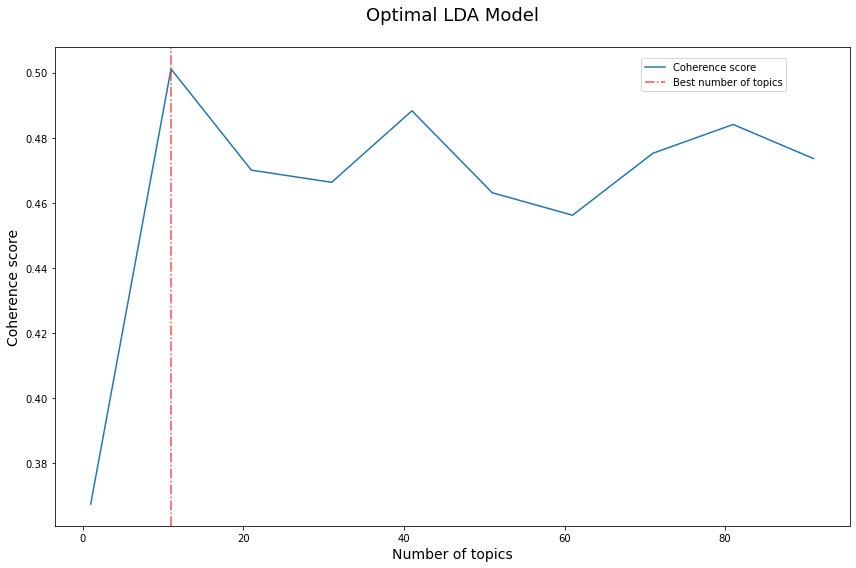

In [68]:
plot_optimal_model(coherence_test, best_nb_topics)

**We can clearly see that the model is optimized around 11 topics, we will  make a loop around 11 topics to give more precision.** 

In [69]:
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

k0 = 5
Kf = 15
step = 1
n_topics = list(np.arange(k0,Kf,step))

coherence_test = []
for i in alpha:
    print("..... alpha = {}".format(i))
    for j in beta:
              print("......... beta = {}".format(j))
              for k in n_topics:
                    print("............. k = {}".format(k))
                    lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                                        id2word=id2word,
                                                                        num_topics=k,
                                                                        random_state=100,
                                                                        chunksize=100,
                                                                        passes=10,
                                                                        alpha=i,
                                                                        eta=j,
                                                                        per_word_topics=True,
                                                                        workers=4)
                    coherence_model_lda = CoherenceModel(model=lda_model,
                                                         texts=texts,
                                                         dictionary=id2word,
                                                         coherence='c_v')
                    coherence_lda = coherence_model_lda.get_coherence()
                    coherence_test.append((k, coherence_lda, i, j))
          

..... alpha = 0.01
......... beta = 0.01
............. k = 5
............. k = 6
............. k = 7
............. k = 8
............. k = 9
............. k = 10
............. k = 11
............. k = 12
............. k = 13
............. k = 14
......... beta = 0.31
............. k = 5
............. k = 6
............. k = 7
............. k = 8
............. k = 9
............. k = 10
............. k = 11
............. k = 12
............. k = 13
............. k = 14
......... beta = 0.61
............. k = 5
............. k = 6
............. k = 7
............. k = 8
............. k = 9
............. k = 10
............. k = 11
............. k = 12
............. k = 13
............. k = 14
......... beta = 0.9099999999999999
............. k = 5
............. k = 6
............. k = 7
............. k = 8
............. k = 9
............. k = 10
............. k = 11
............. k = 12
............. k = 13
............. k = 14
......... beta = symmetric
............. k = 5
............

In [70]:
# Create dataframe of results
coherence_test = pd.DataFrame(coherence_test, columns=["k","coherence", "alpha", "beta"])

# Select best number of topics
best_nb_topics = coherence_test.loc[coherence_test.coherence.argmax(),"k"]

In [71]:
coherence_test.head()

,k,coherence,alpha,beta
0,5,0.518555,0.01,0.01
1,6,0.493875,0.01,0.01
2,7,0.513461,0.01,0.01
3,8,0.495883,0.01,0.01
4,9,0.499556,0.01,0.01


In [72]:
coherence_test[coherence_test["coherence"]==coherence_test.coherence.max()]

,k,coherence,alpha,beta
71,6,0.538534,0.31,0.61


In [73]:
# Final model with alpha and beta parameters (Maxium of coherence) 
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       alpha=0.31,
                                       eta=0.61)

In [74]:
pyLDAvis.enable_notebook()

gensimvis.prepare(lda_model, corpus, id2word)

C:\Users\zahri\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.134752  0.062482       1        1  20.024508
5     -0.118828  0.062027       2        1  18.926991
4     -0.204508  0.007144       3        1  16.087097
3     -0.093449 -0.041434       4        1  15.064702
0      0.119399 -0.259340       5        1  14.953906
2      0.162634  0.169121       6        1  14.942796, topic_info=            Term         Freq        Total Category  logprob  loglift
80          file  3485.000000  3485.000000  Default  30.0000  30.0000
55         class  2386.000000  2386.000000  Default  29.0000  29.0000
32      function  2470.000000  2470.000000  Default  28.0000  28.0000
16        method  2208.000000  2208.000000  Default  27.0000  27.0000
102  application  1460.000000  1460.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
175       system   272.098172   864.650852   Topic6  -4.8589   0.7448
5           code   416.887521  4673.565278   Topic6  -4.4323  -0.5159
101      process   227.098146   555.189773   Topic6  -5.0397   1.0070
23      solution   259.934137  1382.407126   Topic6  -4.9047   0.2298
176         time   231.121497  2264.890715   Topic6  -5.0221  -0.3814

[372 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
534       1  0.194634  activity
534       2  0.004325  activity
534       3  0.004325  activity
534       4  0.004325  activity
534       5  0.791513  activity
...     ...       ...       ...
978       2  0.015546       zip
978       3  0.015546       zip
978       4  0.015546       zip
978       5  0.015546       zip
978       6  0.932787       zip

[1800 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 4, 1, 3])

In [75]:
# Print Perplexity score
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

#Print Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=texts, 
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.504252634055217

Coherence Score:  0.5333119589482892


### 3.2- Supervised Model with TF-IDF

In [76]:
# Create train and test split (30%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_binarized, test_size=0.3, random_state=10)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (7519, 509)
X_test: (3223, 509)
y_train: (7519, 50)
y_test: (3223, 50)


###  3.2.1 Logistic Regression

In [77]:
# Initialize Logistic Regression with OneVsRest
param_logRe = {"estimator__C": [100, 10, 1.0, 0.1],
               "estimator__penalty": ["l1", "l2"],
               "estimator__dual": [False],
               "estimator__solver": ["liblinear"]}

multi_logRe_gcv = GridSearchCV(OneVsRestClassifier(LogisticRegression()),
                              param_grid=param_logRe,
                              n_jobs=-1,
                              cv=5,
                              scoring="f1_weighted",
                              return_train_score = True,
                              refit=True)
multi_logRe_gcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__C': [100, 10, 1.0, 0.1],
                         'estimator__dual': [False],
                         'estimator__penalty': ['l1', 'l2'],
                         'estimator__solver': ['liblinear']},
             return_train_score=True, scoring='f1_weighted')

In [78]:
logRe_gcv_results = pd.DataFrame.from_dict(multi_logRe_gcv.cv_results_)
logRe_best_params = multi_logRe_gcv.best_params_
print("Best params",logRe_best_params)

Best params {'estimator__C': 10, 'estimator__dual': False, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}


In [79]:
logRe_gcv_results[logRe_gcv_results["params"]==logRe_best_params]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__dual,param_estimator__penalty,param_estimator__solver,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,4.824185,0.17207,0.029268,0.007306,10,False,l1,liblinear,"{'estimator__C': 10, 'estimator__dual': False,...",0.465965,...,0.479662,0.009317,1,0.706367,0.697542,0.699088,0.702876,0.702115,0.701598,0.003079


In [80]:
# Predict
y_test_predicted_labels_logistR = multi_logRe_gcv.predict(X_test)

In [81]:
def metrics_score(model, df, y_true, y_pred):
    """Compilation function of metrics specific to multi-label
    classification problems in a Pandas DataFrame.
    This dataFrame will have 1 row per metric
    and 1 column pe
    r model tested. 

    Parameters
    ----------------------------------------
    model : string
        Name of the tested model
    df : DataFrame 
        DataFrame to extend. 
        If None : Create DataFrame.
    y_true : array
        Array of true values to test
    y_pred : array
        Array of predicted values to test
    ----------------------------------------
    """
    if(df is not None):
        temp_df = df
    else:
        temp_df = pd.DataFrame(index=["Accuracy", "F1", "Jaccard", "Recall", "Precision"], columns=[model])
        
    scores = []
    scores.append(metrics.accuracy_score(y_true, y_pred))
    scores.append(metrics.f1_score(y_true,  y_pred, average='weighted'))
    scores.append(metrics.jaccard_score(y_true, y_pred, average='weighted'))
    scores.append(metrics.recall_score(y_true, y_pred, average='weighted'))
    scores.append(metrics.precision_score(y_true, y_pred, average='weighted'))
    temp_df[model] = scores
    
    return temp_df

In [82]:
df_metrics_compare = metrics_score("LogistR", 
                                   df=None, 
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_logistR)
df_metrics_compare

,LogistR
Accuracy,0.247595
F1,0.485486
Jaccard,0.334785
Recall,0.401847
Precision,0.626637


In [83]:
# Inverse transform
y_test_pred_inversed_logist = mlb.inverse_transform(y_test_predicted_labels_logistR)
y_test_inversed = mlb.inverse_transform(y_test)

In [84]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("=" * 41)
print("Predicted:", y_test_pred_inversed_logist[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [(), (), (), (), ('c#',)]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


###  3.2.2 Support Vector Machine

In [85]:
# Initialize RandomForest with OneVsRest
param_svm = {"estimator__C": [0.1, 1, 10, 100, 1000],
             "estimator__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
              "estimator__kernel": ['rbf']}

multi_svm_gcv = GridSearchCV(OneVsRestClassifier(SVC()),
                            param_grid=param_svm,
                            n_jobs=-1,
                            cv=5,
                            scoring="f1_weighted",
                            return_train_score = True,
                            refit=True,
                            verbose=3)
# Fit on Sample data
multi_svm_gcv.fit(X_train[0:5000], y_train[0:5000])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=SVC()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 1, 10, 100, 1000],
                         'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'estimator__kernel': ['rbf']},
             return_train_score=True, scoring='f1_weighted', verbose=3)

In [86]:
svm_cv_results = pd.DataFrame.from_dict(multi_svm_gcv.cv_results_)
svm_best_params_gcv = multi_svm_gcv.best_params_
print("Best params:",svm_best_params_gcv)

Best params: {'estimator__C': 100, 'estimator__gamma': 0.1, 'estimator__kernel': 'rbf'}


In [87]:
svm_best_params = {}
for k, v in svm_best_params_gcv.items():
    svm_best_params[k.replace("estimator__","")] = v

In [88]:
svm_best_params

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [89]:
# Refit SVC best_params with full dataset
svm_final_model = OneVsRestClassifier(SVC(**svm_best_params))
svm_final_model.fit(X_train, y_train)

# Predict
y_test_predicted_labels_svm = svm_final_model.predict(X_test)

In [90]:
df_metrics_compare = metrics_score("SVM", 
                                   df=df_metrics_compare,
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_svm)
df_metrics_compare

C:\Users\zahri\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LogistR,SVM
Accuracy,0.247595,0.255352
F1,0.485486,0.488167
Jaccard,0.334785,0.336806
Recall,0.401847,0.412586
Precision,0.626637,0.609749


In [91]:
# Inverse transform
y_test_pred_inversed_svm = mlb.inverse_transform(y_test_predicted_labels_svm)
y_test_inversed = mlb.inverse_transform(y_test)

In [92]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("="*41)
print("Predicted:", y_test_pred_inversed_svm[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [(), (), (), (), ('database',)]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


### 3.2.3 Random Forest

In [93]:
# Initialize RandomForest with OneVsRest
param_rfc = {"estimator__max_depth": [5, 25, 50],
             "estimator__min_samples_leaf": [1, 5, 10],
             "estimator__class_weight": ["balanced"]}

multi_rfc_gcv = GridSearchCV(OneVsRestClassifier(RandomForestClassifier()),
                            param_grid=param_rfc,
                            n_jobs=-1,
                            cv=5,
                            scoring="f1_weighted",
                            return_train_score = True,
                            refit=True,
                            verbose=3)
# Fit on Sample data
multi_rfc_gcv.fit(X_train[0:5000], y_train[0:5000])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'estimator__class_weight': ['balanced'],
                         'estimator__max_depth': [5, 25, 50],
                         'estimator__min_samples_leaf': [1, 5, 10]},
             return_train_score=True, scoring='f1_weighted', verbose=3)

In [95]:
rfc_cv_results = pd.DataFrame.from_dict(multi_rfc_gcv.cv_results_)
rfc_best_params_gcv = multi_rfc_gcv.best_params_
print("Best params:", rfc_best_params_gcv)

Best params: {'estimator__class_weight': 'balanced', 'estimator__max_depth': 25, 'estimator__min_samples_leaf': 5}


In [96]:
rfc_best_params = {}
for k, v in rfc_best_params_gcv.items():
    rfc_best_params[k.replace("estimator__","")] = v

In [97]:
rfc_best_params

{'class_weight': 'balanced', 'max_depth': 25, 'min_samples_leaf': 5}

In [98]:
# Refit RandomForestClassifier best_params with full dataset
rfc_final_model = OneVsRestClassifier(RandomForestClassifier(**rfc_best_params))
rfc_final_model.fit(X_train, y_train)

# Predict
y_test_predicted_labels_rfc = rfc_final_model.predict(X_test)

In [99]:
df_metrics_compare = metrics_score("RandomForest", 
                                   df=df_metrics_compare,
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_rfc)
df_metrics_compare

C:\Users\zahri\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LogistR,SVM,RandomForest
Accuracy,0.247595,0.255352,0.211914
F1,0.485486,0.488167,0.524504
Jaccard,0.334785,0.336806,0.366835
Recall,0.401847,0.412586,0.587414
Precision,0.626637,0.609749,0.496097


In [100]:
# Inverse transform
y_test_pred_inversed_rfc = mlb.inverse_transform(y_test_predicted_labels_rfc)
y_test_inversed = mlb.inverse_transform(y_test)

In [101]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("="*41)
print("Predicted:", y_test_pred_inversed_rfc[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [(), ('c#',), (), ('c#', 'string'), ('.net',)]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


### 3.3- Supervised Model with Word2Vec

In [102]:
# Create train and test split (30%)
X_train, X_test, y_train, y_test = train_test_split(W2Vec_Data, y_binarized, test_size=0.3, random_state=10)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (7519, 300)
X_test: (3223, 300)
y_train: (7519, 50)
y_test: (3223, 50)


###  3.3.1 Logistic Regression

In [103]:
# Initialize Logistic Regression with OneVsRest
param_logRe = {"estimator__C": [100, 10, 1.0, 0.1],
               "estimator__penalty": ["l1", "l2"],
               "estimator__dual": [False],
               "estimator__solver": ["liblinear"]}

multi_logRe_gcv = GridSearchCV(OneVsRestClassifier(LogisticRegression()),
                              param_grid=param_logRe,
                              n_jobs=-1,
                              cv=5,
                              scoring="f1_weighted",
                              return_train_score = True,
                              refit=True)
multi_logRe_gcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__C': [100, 10, 1.0, 0.1],
                         'estimator__dual': [False],
                         'estimator__penalty': ['l1', 'l2'],
                         'estimator__solver': ['liblinear']},
             return_train_score=True, scoring='f1_weighted')

In [104]:
logRe_gcv_results = pd.DataFrame.from_dict(multi_logRe_gcv.cv_results_)
logRe_best_params = multi_logRe_gcv.best_params_
print("Best params",logRe_best_params)

Best params {'estimator__C': 100, 'estimator__dual': False, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}


In [105]:
logRe_gcv_results[logRe_gcv_results["params"]==logRe_best_params]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__dual,param_estimator__penalty,param_estimator__solver,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,102.643993,2.524881,0.548135,0.08729,100,False,l2,liblinear,"{'estimator__C': 100, 'estimator__dual': False...",0.33777,...,0.36683,0.018929,1,0.556559,0.546723,0.545557,0.546112,0.547432,0.548477,0.004089


In [106]:
# Predict
y_test_predicted_labels_logistR = multi_logRe_gcv.predict(X_test)

In [107]:
df_metrics_compare_w = metrics_score("LogistR", 
                                   df=None, 
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_logistR)
df_metrics_compare_w

,LogistR
Accuracy,0.199814
F1,0.380510
Jaccard,0.249153
Recall,0.306057
Precision,0.532109


In [108]:
# Inverse transform
y_test_pred_inversed_logist = mlb.inverse_transform(y_test_predicted_labels_logistR)
y_test_inversed = mlb.inverse_transform(y_test)

In [109]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("=" * 41)
print("Predicted:", y_test_pred_inversed_logist[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [(), ('r',), (), ('asp.net-mvc', 'c#', 'json'), ()]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


###  3.3.2 Support Vector Machine

In [112]:
# Initialize RandomForest with OneVsRest
param_svm = {"estimator__C": [0.1, 1, 10, 100, 1000],
             "estimator__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
              "estimator__kernel": ['rbf']}

multi_svm_gcv = GridSearchCV(OneVsRestClassifier(SVC()),
                            param_grid=param_svm,
                            n_jobs=-1,
                            cv=5,
                            scoring="f1_weighted",
                            return_train_score = True,
                            refit=True,
                            verbose=3)
# Fit on Sample data
multi_svm_gcv.fit(X_train[0:5000], y_train[0:5000])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=SVC()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 1, 10, 100, 1000],
                         'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'estimator__kernel': ['rbf']},
             return_train_score=True, scoring='f1_weighted', verbose=3)

In [113]:
svm_cv_results = pd.DataFrame.from_dict(multi_svm_gcv.cv_results_)
svm_best_params_gcv = multi_svm_gcv.best_params_
print("Best params:",svm_best_params_gcv)

Best params: {'estimator__C': 1000, 'estimator__gamma': 0.1, 'estimator__kernel': 'rbf'}


In [114]:
svm_best_params = {}
for k, v in svm_best_params_gcv.items():
    svm_best_params[k.replace("estimator__","")] = v

svm_best_params

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [115]:
# Refit SVC best_params with full dataset
svm_final_model = OneVsRestClassifier(SVC(**svm_best_params))
svm_final_model.fit(X_train, y_train)

# Predict
y_test_predicted_labels_svm = svm_final_model.predict(X_test)

In [116]:
df_metrics_compare_w = metrics_score("SVM", 
                                   df=df_metrics_compare_w,
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_svm)
df_metrics_compare_w

,LogistR,SVM
Accuracy,0.199814,0.190506
F1,0.380510,0.422144
Jaccard,0.249153,0.279564
Recall,0.306057,0.397122
Precision,0.532109,0.454948


In [117]:
# Inverse transform
y_test_pred_inversed_svm = mlb.inverse_transform(y_test_predicted_labels_svm)
y_test_inversed = mlb.inverse_transform(y_test)

In [118]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("="*41)
print("Predicted:", y_test_pred_inversed_svm[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [('string',), ('r',), ('algorithm',), (), ('c++11', 'javascript')]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


### 3.3.3 Random Forest

In [119]:
# Initialize RandomForest with OneVsRest
param_rfc = {"estimator__max_depth": [5, 25, 50],
             "estimator__min_samples_leaf": [1, 5, 10],
             "estimator__class_weight": ["balanced"]}

multi_rfc_gcv = GridSearchCV(OneVsRestClassifier(RandomForestClassifier()),
                            param_grid=param_rfc,
                            n_jobs=-1,
                            cv=5,
                            scoring="f1_weighted",
                            return_train_score = True,
                            refit=True,
                            verbose=3)
# Fit on Sample data
multi_rfc_gcv.fit(X_train[0:5000], y_train[0:5000])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'estimator__class_weight': ['balanced'],
                         'estimator__max_depth': [5, 25, 50],
                         'estimator__min_samples_leaf': [1, 5, 10]},
             return_train_score=True, scoring='f1_weighted', verbose=3)

In [120]:
rfc_cv_results = pd.DataFrame.from_dict(multi_rfc_gcv.cv_results_)
rfc_best_params_gcv = multi_rfc_gcv.best_params_
print("Best params:", rfc_best_params_gcv)

Best params: {'estimator__class_weight': 'balanced', 'estimator__max_depth': 5, 'estimator__min_samples_leaf': 5}


In [121]:
rfc_best_params = {}
for k, v in rfc_best_params_gcv.items():
    rfc_best_params[k.replace("estimator__","")] = v

rfc_best_params

{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 5}

In [122]:
# Refit RandomForestClassifier best_params with full dataset
rfc_final_model = OneVsRestClassifier(RandomForestClassifier(**rfc_best_params))
rfc_final_model.fit(X_train, y_train)

# Predict
y_test_predicted_labels_rfc = rfc_final_model.predict(X_test)

In [123]:
df_metrics_compare_w = metrics_score("RandomForest", 
                                   df=df_metrics_compare_w,
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_rfc)
df_metrics_compare_w

C:\Users\zahri\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LogistR,SVM,RandomForest
Accuracy,0.199814,0.190506,0.116661
F1,0.380510,0.422144,0.390170
Jaccard,0.249153,0.279564,0.251322
Recall,0.306057,0.397122,0.439003
Precision,0.532109,0.454948,0.388964


In [124]:
# Inverse transform
y_test_pred_inversed_rfc = mlb.inverse_transform(y_test_predicted_labels_rfc)
y_test_inversed = mlb.inverse_transform(y_test)

In [125]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("="*41)
print("Predicted:", y_test_pred_inversed_rfc[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [('c++',), ('algorithm', 'c#', 'r'), (), ('string',), ('c++',)]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


### 3.4 Supervised Model with BERT

In [126]:
# Create train and test split (30%)
X_train, X_test, y_train, y_test = train_test_split(W2Bert_Data, y_binarized, test_size=0.3, random_state=10)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (7519, 768)
X_test: (3223, 768)
y_train: (7519, 50)
y_test: (3223, 50)


### 3.4.1 Logistic Regression

In [127]:
# Initialize Logistic Regression with OneVsRest
param_logRe = {"estimator__C": [100, 10, 1.0, 0.1],
               "estimator__penalty": ["l1", "l2"],
               "estimator__dual": [False],
               "estimator__solver": ["liblinear"]}

multi_logRe_gcv = GridSearchCV(OneVsRestClassifier(LogisticRegression()),
                              param_grid=param_logRe,
                              n_jobs=-1,
                              cv=5,
                              scoring="f1_weighted",
                              return_train_score = True,
                              refit=True)
multi_logRe_gcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__C': [100, 10, 1.0, 0.1],
                         'estimator__dual': [False],
                         'estimator__penalty': ['l1', 'l2'],
                         'estimator__solver': ['liblinear']},
             return_train_score=True, scoring='f1_weighted')

In [128]:
logRe_gcv_results = pd.DataFrame.from_dict(multi_logRe_gcv.cv_results_)
logRe_best_params = multi_logRe_gcv.best_params_
print("Best params",logRe_best_params)

Best params {'estimator__C': 100, 'estimator__dual': False, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}


In [129]:
logRe_gcv_results[logRe_gcv_results["params"]==logRe_best_params]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__dual,param_estimator__penalty,param_estimator__solver,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,547.094142,19.961138,1.793618,0.107317,100,False,l2,liblinear,"{'estimator__C': 100, 'estimator__dual': False...",0.332519,...,0.352207,0.014445,1,0.700516,0.69465,0.696948,0.695173,0.695251,0.696508,0.002148


In [130]:
# Predict
y_test_predicted_labels_logistR = multi_logRe_gcv.predict(X_test)

In [131]:
df_metrics_compare_w = metrics_score("LogistR", 
                                   df=None, 
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_logistR)
df_metrics_compare_w

,LogistR
Accuracy,0.162271
F1,0.360858
Jaccard,0.229644
Recall,0.292096
Precision,0.491802


In [132]:
# Inverse transform
y_test_pred_inversed_logist = mlb.inverse_transform(y_test_predicted_labels_logistR)
y_test_inversed = mlb.inverse_transform(y_test)

In [133]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("=" * 41)
print("Predicted:", y_test_pred_inversed_logist[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [(), ('r',), ('performance',), ('html',), ('c#',)]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


###  3.4.2 Support Vector Machine

In [134]:
# Initialize RandomForest with OneVsRest
param_svm = {"estimator__C": [0.1, 1, 10, 100, 1000],
             "estimator__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
              "estimator__kernel": ['rbf']}

multi_svm_gcv = GridSearchCV(OneVsRestClassifier(SVC()),
                            param_grid=param_svm,
                            n_jobs=-1,
                            cv=5,
                            scoring="f1_weighted",
                            return_train_score = True,
                            refit=True,
                            verbose=3)
# Fit on Sample data
multi_svm_gcv.fit(X_train[0:5000], y_train[0:5000])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=SVC()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 1, 10, 100, 1000],
                         'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'estimator__kernel': ['rbf']},
             return_train_score=True, scoring='f1_weighted', verbose=3)

In [135]:
svm_cv_results = pd.DataFrame.from_dict(multi_svm_gcv.cv_results_)
svm_best_params_gcv = multi_svm_gcv.best_params_
print("Best params:",svm_best_params_gcv)

Best params: {'estimator__C': 1000, 'estimator__gamma': 0.01, 'estimator__kernel': 'rbf'}


In [136]:
svm_best_params = {}
for k, v in svm_best_params_gcv.items():
    svm_best_params[k.replace("estimator__","")] = v

svm_best_params

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [137]:
# Refit SVC best_params with full dataset
svm_final_model = OneVsRestClassifier(SVC(**svm_best_params))
svm_final_model.fit(X_train, y_train)

# Predict
y_test_predicted_labels_svm = svm_final_model.predict(X_test)

In [138]:
df_metrics_compare_w = metrics_score("SVM", 
                                   df=df_metrics_compare_w,
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_svm)
df_metrics_compare_w

,LogistR,SVM
Accuracy,0.162271,0.147378
F1,0.360858,0.346743
Jaccard,0.229644,0.217878
Recall,0.292096,0.308419
Precision,0.491802,0.404085


In [139]:
# Inverse transform
y_test_pred_inversed_svm = mlb.inverse_transform(y_test_predicted_labels_svm)
y_test_inversed = mlb.inverse_transform(y_test)

In [140]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("="*41)
print("Predicted:", y_test_pred_inversed_svm[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [('java',), ('algorithm', 'r'), ('java',), ('asp.net', 'c#', 'python'), ()]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


### 3.4.3 Random Forest

In [141]:
# Initialize RandomForest with OneVsRest
param_rfc = {"estimator__max_depth": [5, 25, 50],
             "estimator__min_samples_leaf": [1, 5, 10],
             "estimator__class_weight": ["balanced"]}

multi_rfc_gcv = GridSearchCV(OneVsRestClassifier(RandomForestClassifier()),
                            param_grid=param_rfc,
                            n_jobs=-1,
                            cv=5,
                            scoring="f1_weighted",
                            return_train_score = True,
                            refit=True,
                            verbose=3)
# Fit on Sample data
multi_rfc_gcv.fit(X_train[0:5000], y_train[0:5000])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'estimator__class_weight': ['balanced'],
                         'estimator__max_depth': [5, 25, 50],
                         'estimator__min_samples_leaf': [1, 5, 10]},
             return_train_score=True, scoring='f1_weighted', verbose=3)

In [142]:
rfc_cv_results = pd.DataFrame.from_dict(multi_rfc_gcv.cv_results_)
rfc_best_params_gcv = multi_rfc_gcv.best_params_
print("Best params:", rfc_best_params_gcv)

Best params: {'estimator__class_weight': 'balanced', 'estimator__max_depth': 5, 'estimator__min_samples_leaf': 10}


In [143]:
rfc_best_params = {}
for k, v in rfc_best_params_gcv.items():
    rfc_best_params[k.replace("estimator__","")] = v

rfc_best_params

{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 10}

In [144]:
# Refit RandomForestClassifier best_params with full dataset
rfc_final_model = OneVsRestClassifier(RandomForestClassifier(**rfc_best_params))
rfc_final_model.fit(X_train, y_train)

# Predict
y_test_predicted_labels_rfc = rfc_final_model.predict(X_test)

In [145]:
df_metrics_compare_w = metrics_score("RandomForest", 
                                   df=df_metrics_compare_w,
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_rfc)
df_metrics_compare_w

C:\Users\zahri\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LogistR,SVM,RandomForest
Accuracy,0.162271,0.147378,0.024822
F1,0.360858,0.346743,0.236806
Jaccard,0.229644,0.217878,0.137315
Recall,0.292096,0.308419,0.347079
Precision,0.491802,0.404085,0.191853


In [146]:
# Inverse transform
y_test_pred_inversed_rfc = mlb.inverse_transform(y_test_predicted_labels_rfc)
y_test_inversed = mlb.inverse_transform(y_test)

In [147]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("="*41)
print("Predicted:", y_test_pred_inversed_rfc[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [('html', 'python', 'regex', 'string'), ('algorithm', 'css', 'html', 'r'), ('c#', 'ruby-on-rails'), ('javascript', 'python'), ('c', 'c#', 'c++', 'python', 'string')]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


### 3.5 Supervised Model with USE

In [148]:
# Create train and test split (30%)
X_train, X_test, y_train, y_test = train_test_split(W2Use_Data, y_binarized, test_size=0.3, random_state=10)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (7519, 512)
X_test: (3223, 512)
y_train: (7519, 50)
y_test: (3223, 50)


### 3.5.1 Logistic Regression

In [149]:
# Initialize Logistic Regression with OneVsRest
param_logRe = {"estimator__C": [100, 10, 1.0, 0.1],
               "estimator__penalty": ["l1", "l2"],
               "estimator__dual": [False],
               "estimator__solver": ["liblinear"]}

multi_logRe_gcv = GridSearchCV(OneVsRestClassifier(LogisticRegression()),
                              param_grid=param_logRe,
                              n_jobs=-1,
                              cv=5,
                              scoring="f1_weighted",
                              return_train_score = True,
                              refit=True)
multi_logRe_gcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__C': [100, 10, 1.0, 0.1],
                         'estimator__dual': [False],
                         'estimator__penalty': ['l1', 'l2'],
                         'estimator__solver': ['liblinear']},
             return_train_score=True, scoring='f1_weighted')

In [150]:
logRe_gcv_results = pd.DataFrame.from_dict(multi_logRe_gcv.cv_results_)
logRe_best_params = multi_logRe_gcv.best_params_
print("Best params",logRe_best_params)

Best params {'estimator__C': 10, 'estimator__dual': False, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}


In [151]:
logRe_gcv_results[logRe_gcv_results["params"]==logRe_best_params]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__dual,param_estimator__penalty,param_estimator__solver,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,219.562056,6.586629,1.276768,0.059567,10,False,l1,liblinear,"{'estimator__C': 10, 'estimator__dual': False,...",0.508322,...,0.541515,0.017047,1,0.766863,0.757351,0.752947,0.749566,0.75695,0.756735,0.00581


In [152]:
# Predict
y_test_predicted_labels_logistR = multi_logRe_gcv.predict(X_test)

In [153]:
df_metrics_compare_w = metrics_score("LogistR", 
                                   df=None, 
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_logistR)
df_metrics_compare_w

C:\Users\zahri\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LogistR
Accuracy,0.310580
F1,0.536304
Jaccard,0.383832
Recall,0.467569
Precision,0.648838


In [154]:
# Inverse transform
y_test_pred_inversed_logist = mlb.inverse_transform(y_test_predicted_labels_logistR)
y_test_inversed = mlb.inverse_transform(y_test)

In [155]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("=" * 41)
print("Predicted:", y_test_pred_inversed_logist[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [('javascript',), ('r',), (), ('c#', 'java'), ()]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


###  3.5.2 Support Vector Machine

In [156]:
# Initialize RandomForest with OneVsRest
param_svm = {"estimator__C": [0.1, 1, 10, 100, 1000],
             "estimator__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
              "estimator__kernel": ['rbf']}

multi_svm_gcv = GridSearchCV(OneVsRestClassifier(SVC()),
                            param_grid=param_svm,
                            n_jobs=-1,
                            cv=5,
                            scoring="f1_weighted",
                            return_train_score = True,
                            refit=True,
                            verbose=3)
# Fit on Sample data
multi_svm_gcv.fit(X_train[0:5000], y_train[0:5000])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=SVC()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 1, 10, 100, 1000],
                         'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'estimator__kernel': ['rbf']},
             return_train_score=True, scoring='f1_weighted', verbose=3)

In [157]:
svm_cv_results = pd.DataFrame.from_dict(multi_svm_gcv.cv_results_)
svm_best_params_gcv = multi_svm_gcv.best_params_
print("Best params:",svm_best_params_gcv)

Best params: {'estimator__C': 100, 'estimator__gamma': 0.1, 'estimator__kernel': 'rbf'}


In [158]:
svm_best_params = {}
for k, v in svm_best_params_gcv.items():
    svm_best_params[k.replace("estimator__","")] = v

svm_best_params

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [159]:
# Refit SVC best_params with full dataset
svm_final_model = OneVsRestClassifier(SVC(**svm_best_params))
svm_final_model.fit(X_train, y_train)

# Predict
y_test_predicted_labels_svm = svm_final_model.predict(X_test)

In [160]:
df_metrics_compare_w = metrics_score("SVM", 
                                   df=df_metrics_compare_w,
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_svm)
df_metrics_compare_w

,LogistR,SVM
Accuracy,0.310580,0.306547
F1,0.536304,0.542122
Jaccard,0.383832,0.388460
Recall,0.467569,0.487973
Precision,0.648838,0.622513


In [161]:
# Inverse transform
y_test_pred_inversed_svm = mlb.inverse_transform(y_test_predicted_labels_svm)
y_test_inversed = mlb.inverse_transform(y_test)

In [162]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("="*41)
print("Predicted:", y_test_pred_inversed_svm[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [(), ('r',), ('java',), ('c#',), ()]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


### 3.5.3 Random Forest

In [163]:
# Initialize RandomForest with OneVsRest
param_rfc = {"estimator__max_depth": [5, 25, 50],
             "estimator__min_samples_leaf": [1, 5, 10],
             "estimator__class_weight": ["balanced"]}

multi_rfc_gcv = GridSearchCV(OneVsRestClassifier(RandomForestClassifier()),
                            param_grid=param_rfc,
                            n_jobs=-1,
                            cv=5,
                            scoring="f1_weighted",
                            return_train_score = True,
                            refit=True,
                            verbose=3)
# Fit on Sample data
multi_rfc_gcv.fit(X_train[0:5000], y_train[0:5000])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'estimator__class_weight': ['balanced'],
                         'estimator__max_depth': [5, 25, 50],
                         'estimator__min_samples_leaf': [1, 5, 10]},
             return_train_score=True, scoring='f1_weighted', verbose=3)

In [164]:
rfc_cv_results = pd.DataFrame.from_dict(multi_rfc_gcv.cv_results_)
rfc_best_params_gcv = multi_rfc_gcv.best_params_
print("Best params:", rfc_best_params_gcv)

Best params: {'estimator__class_weight': 'balanced', 'estimator__max_depth': 5, 'estimator__min_samples_leaf': 5}


In [165]:
rfc_best_params = {}
for k, v in rfc_best_params_gcv.items():
    rfc_best_params[k.replace("estimator__","")] = v

rfc_best_params

{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 5}

In [166]:
# Refit RandomForestClassifier best_params with full dataset
rfc_final_model = OneVsRestClassifier(RandomForestClassifier(**rfc_best_params))
rfc_final_model.fit(X_train, y_train)

# Predict
y_test_predicted_labels_rfc = rfc_final_model.predict(X_test)

In [167]:
df_metrics_compare_w = metrics_score("RandomForest", 
                                   df=df_metrics_compare_w,
                                   y_true = y_test,
                                   y_pred = y_test_predicted_labels_rfc)
df_metrics_compare_w

,LogistR,SVM,RandomForest
Accuracy,0.310580,0.306547,0.168166
F1,0.536304,0.542122,0.547699
Jaccard,0.383832,0.388460,0.389201
Recall,0.467569,0.487973,0.666022
Precision,0.648838,0.622513,0.496751


In [168]:
# Inverse transform
y_test_pred_inversed_rfc = mlb.inverse_transform(y_test_predicted_labels_rfc)
y_test_inversed = mlb.inverse_transform(y_test)

In [169]:
print("="*41)
print("Print 5 first predicted Tags vs true Tags")
print("="*41)
print("Predicted:", y_test_pred_inversed_rfc[0:5])
print("True:", y_test_inversed[0:5])

Print 5 first predicted Tags vs true Tags
Predicted: [(), ('algorithm', 'r'), (), ('c#', 'string'), ('c++', 'c++11')]
True: [('c',), ('r',), ('asp.net',), ('python',), ('c++', 'c++11')]


### 4. Model Selection

**It is clear from the calculated metrics (best value of F1, Jaccard and Recall metrics) that the best model is the Random Forest.** 

### 5. API

In [176]:
#save model 
import joblib 
joblib.dump(rfc_final_model, 'rfc_final_model.pkl')
joblib.dump(mlb,'multilabel_binarizer.pkl')

['multilabel_binarizer.pkl']